<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparando-e-Lendo-Arquivo" data-toc-modified-id="Preparando-e-Lendo-Arquivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparando e Lendo Arquivo</a></span></li><li><span><a href="#Visualizando-Dados" data-toc-modified-id="Visualizando-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizando Dados</a></span></li><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regressão Logística</a></span></li><li><span><a href="#One-vs-All-Classifier" data-toc-modified-id="One-vs-All-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One vs All Classifier</a></span></li></ul></div>

Este notebook tem por objetivo implementar soluções para o Exercício 3 do curso através das facilidades ofertadas pelo Jupyter.

## Preparando e Lendo Arquivo

In [2]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

Loading and Visualizing Data ...


In [8]:
load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

% Testando
size(X)

ans =

   5000    400



In [9]:
% Escrevendo de outra forma
fprintf('O dataset possui %d linhas e %d colunas.\n', size(X, 1), size(X, 2))

% Printando seu primeiro elemento
fprintf('Primeiro elemento do dataset: %d', X(1))

O dataset possui 5000 linhas e 400 colunas.


In [13]:
% Printando dataset (tempo elevado de processamento)
X

X =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000


   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00077  -0.00716  -0.00779   0.00028   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00104   0.01282   0.11327  -0.00624   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00097  -0.00715  -0.02871  -0.00408
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00029  -0.00110  -0.02039  -0.00841
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00106  -0.00794
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00211   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00869  -0.01064  -0.01791  -0.01120  -0.00407   0.00049   0.00000   0.00000
  -0.02102  -0.00907   0.00038   0.00005   0.00000   0.00000   0.00000   0.00000
  -0.01922  -0.02095  -0.02082  -0.01362  -0.00228   0.00032   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00030  -0.00182  -0.01330  -0.00270
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00023  -0.00116  -0.01389   0.05265
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00082
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00446
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035  -0.01219
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00760   0.05780
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019   0.00053
   0.00000   0.00000   0.00000   0.00000  -0.00011   0.00066   0.00537  -0.00189
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02557  -0.02469  -0.00884   0.00021   0.00004   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00274  -0.02024  -0.03179  -0.02885  -0.00684   0.00044   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00012  -0.00110  -0.00157   0.00017   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01696  -0.01640  -0.00439   0.00031   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00952  -0.00318   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00023
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00087   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00434  -0.00189   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02500  -0.02578   0.00069   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00229   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00699   0.00089   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00040   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02376  -0.00108   0.00031   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00133   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
  -0.01106   0.00048   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01501   0.00053   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00864   0.00097   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
  -0.00629   0.00073   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00896   0.00103   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004   0.00049  -0.00846
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00078
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00315   0.00313  -0.00028   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00004  -0.00041
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00587
   0.00000   0.00006   0.00096  -0.02535   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00100  -0.01134  -0.00761   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010  -0.00095  -0.00290   0.00025   0.00000   0.00000   0.00000  -0.00511
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00014  -0.00129  -0.003

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00234
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00121
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00031
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00639  -0.00710   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01668  -0.00351   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00078   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01391  -0.00132   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00039   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00002  -0.003

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00040  -0.01049  -0.01952  -0.00688  -0.01035  -0.02157
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00002  -0.00013  -0.00136  -0.00329  -0.00461  -0.00235   0.00011
   0.00043  -0.00809   0.02824   0.34924   0.66299   0.82921   0.77438   0.45965
   0.00000   0.00012  -0.00079  -0.01026  -0.03683   0.10066   0.30935   0.26664
   0.00000   0.00000   0.00000   0.00004  -0.00050  -0.00110  -0.00011   0.00001
   0.00020  -0.00042  -0.02255   0.04013   0.07491   0.07478   0.05877   0.00350
   0.00007   0.00055  -0.02048   0.08358   0.33214   0.48555   0.39762   0.08674
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00002   0.00026  -0.00393  -0.01052  -0.00275   0.00019
   0.00000   0.00000   0.000

   0.42037   0.97121   1.02438   1.04846   0.59961   0.00627  -0.00606   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.66396   0.92023   1.02285   0.78983   0.25324  -0.03525   0.00037   0.00000
   0.71072   1.02898   1.03618   0.84493   0.19847  -0.01774  -0.00063   0.00000
   0.52044   0.33292   0.13576  -0.01711  -0.00179   0.00020   0.00000   0.00000
  -0.00665  -0.01064  -0.00969  -0.00380  -0.00088   0.00010   0.00000   0.00000
   0.26826   0.49568   0.69236   0.35301   0.01892  -0.00418   0.00000   0.00000
   0.07484   0.19296   0.27184   0.21232   0.07316  -0.01233   0.00029   0.00000
   0.92368   1.02864   1.02898   0.65921   0.07960  -0.01288   0.00005   0.00000
  -0.00741  -0.02032  -0.02088  -0.01827  -0.00410   0.00053   0.00000   0.00000
  -0.00424  -0.02268   0.00208   0.16986   0.17952   0.02499  -0.00363   0.00000
  -0.01733  -0.00379   0.00016   0.00001   0.00000   0.00000   0.00000   0.00000
   0.30733   0.62461   0.780

  -0.03050  -0.03056  -0.03047  -0.01577  -0.00219   0.00023   0.00001   0.00000
   0.03379  -0.01567  -0.00006   0.00011   0.00000   0.00000   0.00000   0.00000
  -0.02226  -0.01317  -0.00153  -0.00015   0.00002   0.00000   0.00000   0.00000
   0.05480   0.07202   0.02732  -0.02488  -0.00307   0.00044   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03399  -0.04409  -0.04335  -0.02399  -0.00462   0.00062   0.00000   0.00000
   0.24518  -0.00249  -0.00227   0.00015   0.00000   0.00000   0.00000   0.00000
   0.11903  -0.01722  -0.00562   0.00036   0.00001   0.00000   0.00000   0.00000
  -0.02902  -0.03180  -0.02471  -0.00530  -0.00028   0.00007   0.00000   0.00000
   0.79604   0.80386   0.29943  -0.01539  -0.00295   0.00021   0.00000   0.00000
   0.29891   0.43270   0.43456   0.37965   0.08475  -0.01096   0.00000   0.00000
   0.51264   0.40960   0.16484   0.49766   0.22374  -0.01947  -0.00051   0.00000
  -0.02944  -0.02854  -0.017

   0.20921   0.46450   0.68792   0.57979   0.37768   0.02905  -0.00694   0.00000
  -0.02066  -0.01720   0.00353  -0.00638  -0.01600  -0.00053   0.00018   0.00000
   0.16258  -0.01840  -0.00105   0.00023   0.00000   0.00000   0.00000   0.00000
  -0.00217  -0.00520  -0.00521  -0.00483  -0.00179   0.00005   0.00001   0.00000
  -0.00058   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02649   0.09251   0.22724   0.10806  -0.01701   0.00019   0.00007   0.00000
  -0.02093  -0.01741  -0.00734  -0.00287   0.00020   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.41540   0.12173  -0.02290   0.00063   0.00002   0.00000   0.00000   0.00000
   0.39030   0.43257   0.42984   0.42421   0.13071  -0.02256   0.00055   0.00000
  -0.03054  -0.02091  -0.00628  -0.00013   0.00004   0.00000   0.00000   0.00000
   0.11239   0.46023   0.96832   1.05339   1.05684   0.52391  -0.02142   0.00000
  -0.00354  -0.00537  -0.004

  -0.00462  -0.00454  -0.00449  -0.00155   0.00010   0.00000   0.00000   0.00000
  -0.02169  -0.02883   0.00044  -0.02611  -0.00648   0.00064   0.00001   0.00000
  -0.03926  -0.03940  -0.03900  -0.01332  -0.00090  -0.00013   0.00003   0.00000
  -0.00634  -0.02038  -0.02603  -0.01845  -0.00498   0.00039   0.00002   0.00000
  -0.01497  -0.00848  -0.00348  -0.00065  -0.00010   0.00002   0.00000   0.00000
  -0.00226  -0.00628  -0.00728  -0.00577  -0.00122   0.00012   0.00000   0.00000
  -0.03858  -0.03863  -0.03085  -0.00457   0.00000   0.00004   0.00000   0.00000
  -0.03126  -0.01885  -0.00362   0.00037   0.00001   0.00000   0.00000   0.00000
  -0.00084  -0.00017   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00127  -0.00298  -0.00119   0.00001   0.00001   0.00000   0.00000   0.00000
   0.33810   0.81373   0.94929   0.43622   0.04077  -0.00737   0.00003   0.00000
  -0.03097  -0.03147  -0.02449  -0.00340  -0.00039   0.00007   0.00000   0.00000
   0.00000   0.00000   0.000

   1.04996   1.04457   1.02731   0.88286   0.24862  -0.03075   0.00000   0.00000
  -0.00092  -0.00125  -0.00126  -0.00133  -0.00053   0.00006   0.00000   0.00000
   0.68420   0.95828   1.01078   0.90042   0.34561  -0.01720  -0.00193   0.00000
   0.56436   0.69622   0.49297   0.23777  -0.02159   0.00042   0.00002   0.00000
   1.04302   0.66715   0.07165  -0.01617   0.00016   0.00000   0.00000   0.00000
   0.42223   0.43997   0.13552  -0.02994  -0.00516   0.00034   0.00002   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.05021   1.04743   1.02067   0.47999   0.05538  -0.00930   0.00004   0.00000
   0.46528   0.57758   0.33772   0.20270  -0.01302  -0.00053   0.00005   0.00000
   0.13388   0.24744   0.26710   0.08774  -0.01157   0.00036   0.00002   0.00000
   0.19571   0.19582   0.18274  -0.02088  -0.00822   0.00048   0.00003   0.00000
  -0.03134  -0.03311  -0.03208  -0.00923  -0.00074   0.00010   0.00000   0.00000
   0.30811   0.31175   0.159

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00005  -0.00024  -0.00316  -0.00244   0.00009   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00001  -0.00019  -0.00012  -0.00001   0.00000   0.00000
   0.00000   0.00000   0.00006  -0.00050  -0.00079   0.00005   0.00000   0.00000
   0.00000   0.00001   0.00004  -0.00246  -0.00435  -0.00051   0.00008   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02907  -0.00323   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00085  -0.00769  -0.01082  -0.01585  -0.00160   0.00026
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00233  -0.01825
   0.00000   0.00000   0.00081  -0.00939   0.01157   0.18981   0.21199   0.03773
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00139  -0.02674
   0.00000   0.00000   0.00051  -0.00476  -0.00429   0.00028   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00004  -0.01879   0.14602   0.64552   0.43499
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00111  -0.01049  -0.00353
   0.00000   0.00000   0.00000   0.00013  -0.00142  -0.01739   0.01525  -0.00013
   0.00000   0.00000   0.00000   0.00000   0.00066  -0.00669   0.00099   0.03302
   0.00000   0.00000   0.00000   0.00023  -0.00361  -0.01081   0.00384  -0.00684
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00125  -0.01423  -0.00463
   0.00000   0.00000   0.00000   0.00011  -0.00062  -0.04448   0.26447   0.84630
   0.00000   0.00001   0.00092  -0.00902  -0.02652  -0.00452   0.00035   0.00000
   0.00000   0.00000   0.00011  -0.00503   0.01956   0.60961   0.97603   0.27807
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00055  -0.00963  -0.00940   0.00339  -0.00842
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00019  -0.01421   0.08534   0.55708   0.12102  -0.00855   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00014  -0.00019  -0.01485   0.00362   0.01538  -0.00083   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00236
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00026  -0.01659   0.06463   0.22209   0.17284   0.00990  -0.00206
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00006   0.00020  -0.01653   0.09154   0.58782   0.68564   0.07448
   0.00000   0.00002  -0.003

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00028  -0.00231  -0.01457  -0.00129   0.00012   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00777   0.06858   0.92797   0.96690   0.19245
   0.00000   0.00060  -0.00412  -0.02961  -0.02334  -0.00206   0.00022   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00050  -0.01112  -0.00282
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00012  -0.00180  -0.00574  -0.00184   0.00022
   0.00000   0.00000   0.00000   0.00044  -0.00840  -0.00040   0.01131  -0.00114
   0.00000   0.00000   0.00000  -0.01179   0.14392   0.92436   0.71216   0.03559
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00004  -0.00631   0.03522   0.20924   0.04129
   0.00000   0.00000   0.00000   0.00007   0.00035  -0.02152   0.03415   0.08055
   0.00000   0.00000  -0.00840   0.04457   0.61249   1.02853   0.67458   0.04586
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00118  -0.01405  -0.00326
   0.00000   0.00000   0.00000   0.00000   0.00073  -0.00556  -0.01875  -0.01046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.01737   0.13501   0.63169   0.21565  -0.01405   0.00052
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00055  -0.01144
   0.00000   0.00000   0.00000  -0.00306   0.00060   0.61782   0.95743   0.17295
   0.00000   0.00000   0.00000  -0.01723   0.23933   0.98399   0.99213   1.00504
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00032  -0.00522  -0.00849  -0.00462  -0.00000
   0.00000   0.00000   0.00000   0.00034  -0.00576  -0.02665   0.15898   0.41120
   0.00000   0.00000   0.00053  -0.01363   0.11303   0.56716   0.26934  -0.00136
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00005  -0.01075   0.05369   0.55493   0.27889
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00043
   0.00000   0.00000   0.00007   0.00067  -0.02186  -0.03341  -0.01018   0.00123
   0.00000   0.00021  -0.00723   0.03089   0.26082   0.04135  -0.00315   0.00000
   0.00000   0.00000   0.00000   0.00080  -0.01370  -0.01745   0.00006   0.00010
   0.00000   0.00000   0.00000   0.00004  -0.00051  -0.00451   0.00025   0.00000
   0.00000   0.00000   0.00000   0.00050  -0.00729  -0.02278  -0.01681   0.00088
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00109  -0.00791  -0.03344  -0.00497
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00004  -0.01306   0.09754   0.60384   0.68991   0.15191  -0.01957
   0.00000   0.00000   0.00000   0.00044  -0.00702  -0.01617  -0.00075   0.00017
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00170   0.00274   0.36504   0.39158   0.33065
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00004   0.00060  -0.01167  -0.02915  -0.02588
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00330   0.03088   0.02678  -0.00401   0.00007   0.00000
   0.00000   0.00000   0.00019  -0.00501   0.01248   0.48110   0.88495   0.86543
   0.00000   0.00000  -0.00071   0.00519   0.03217   0.00257  -0.00025   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00206  -0.00516   0.41975   0.65518   0.14435  -0.01852
   0.00000  -0.01752   0.64647   0.77749   0.22124  -0.01487  -0.00061   0.00000
   0.00000   0.00000   0.00001   0.00021  -0.00618  -0.00483   0.00028   0.00000
   0.00000   0.00026  -0.004

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00070  -0.01066   0.01903
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00000  -0.00433  -0.00120
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00261  -0.00610   0.57245   1.03368   0.20957
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.01024   0.14105   0.61636   0.40844   0.01716
   0.00000   0.00000  -0.05124   0.45483   0.86211   0.02054  -0.00479   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00009  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00047  -0.00319  -0.03008   0.19584
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00513   0.02430   0.84930   1.04507   1.02440
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00033
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009   0.00030
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00022
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00089  -0.01101   0.00173   0.46553
   0.00000   0.00021  -0.02257   0.21993   0.91887   0.56062   0.56261   0.74301
  -0.00272   0.00117   0.54915   0.87970   0.81545   0.96032   0.81382   0.23384
   0.00000   0.00000   0.00000  -0.00100  -0.02407   0.18705   0.62183   0.27071
  -0.00017   0.00002   0.00000  -0.00752   0.01715   0.59227   0.99780   0.84096
   0.00000   0.00000   0.00042  -0.00427  -0.01713  -0.02811  -0.01158   0.00067
   0.00000   0.00000   0.00000   0.00031  -0.00699  -0.00757   0.00389   0.00195
   0.00000   0.00000   0.00013  -0.00189  -0.01613   0.02467   0.02928  -0.00198
   0.00000   0.00028  -0.00113  -0.02004  -0.00453   0.08745   0.09041   0.01914
  -0.01214   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00009  -0.00112  -0.00969   0.00883  -0.01206  -0.00219   0.00017   0.00000
   0.00007  -0.00112  -0.03875   0.35157   0.85966   1.03112   0.83703   0.16586
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00011  -0.00015
   0.00000   0.00000   0.00000   0.00008   0.00064  -0.01447  -0.01729   0.00715
  -0.01785   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00055  -0.00871  -0.01703
  -0.00358   0.01835   0.53353   0.80667   0.75333   1.03728   0.41824  -0.01875
   0.00000   0.00000   0.00048  -0.01066   0.02205   0.44652   0.80606   0.67912
   0.00032   0.00000   0.00000   0.00000   0.00000   0.00042  -0.00924  -0.00515
   0.00000   0.00000   0.00000  -0.00068  -0.01988   0.08844   0.63188   0.99949
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00022  -0.00472  -0.01414  -0.02206  -0.00137   0.01496  -0.01146
   0.00000  -0.00756   0.013

  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00926   0.00069  -0.01804  -0.02517  -0.00069   0.00026  -0.00004   0.00414
   0.00000   0.00000   0.00000   0.00000   0.00046  -0.02076   0.22354   0.94613
  -0.00477   0.00000   0.00000  -0.00179  -0.02278   0.38505   0.87984   1.01153
   0.00015  -0.00016   0.00000   0.00000   0.00000  -0.01631   0.24087   0.63578
  -0.00842   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00039   0.00000   0.00000   0.00000   0.00000  -0.03120   0.49035   1.05106
   0.00034   0.00000  -0.00000  -0.00494   0.19800   0.25182   0.66013   0.88175
   0.00000   0.00000   0.00000   0.00000  -0.02843   0.22511   0.90285   1.02508
  -0.00482  -0.00526   0.00019   0.00002   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.02471   0.18901   0.91387   0.87861
   0.00000   0.00000  -0.03561   0.38525   1.02249   0.97736   1.01618   0.99654
  -0.03252   0.00103   0.000

   0.01055   0.27940   0.48581   0.10232  -0.01502  -0.00069   0.00006   0.00000
  -0.01728  -0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.85098   0.15899  -0.02370   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.03346   0.36005   1.01230   1.03498   1.00679   1.06298
  -0.00045  -0.00875  -0.00174  -0.00015  -0.00847   0.08035   0.58164   0.81937
   0.00000   0.00000  -0.00000  -0.01835   0.35397   0.89902   0.96053   0.48507
   0.00004   0.00000  -0.00000  -0.02056   0.34171   0.96474   0.86660   0.53902
   0.21948   0.02338  -0.00342  -0.00004   0.00000   0.00002   0.00093  -0.01252
  -0.00241   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00353   0.01963   0.79959   1.01105   0.94346   0.59992
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00266  -0.00702   0.36006   0.96997   1.02052   0.95954   0.45787
   0.00000   0.00000   0.000

  -0.00605   0.00077  -0.00265   0.00015   0.00000   0.00000   0.00080  -0.00545
   0.00000   0.00000   0.00000   0.00000  -0.01732   0.11756   0.87235   1.07585
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00035   0.00006   0.07428
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016  -0.00252  -0.00651
   0.00008   0.00000   0.00000   0.00000   0.00000  -0.00019   0.00336   0.00103
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00069   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00144  -0.00428
   0.00000   0.00000  -0.00174   0.01450   0.33699   0.28541   0.53318   0.93537
  -0.00236  -0.00337  -0.00009  -0.01527   0.11661   0.89593   0.90868   0.12767
   0.00000  -0.00180   0.00405   0.15148   0.17451   0.49895   0.91815   1.01014
   0.00000   0.00000   0.00000   0.00088  -0.01643  -0.05666   0.30332   0.96816
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.01194  -0.00458
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00026   0.00010   0.00000   0.00000   0.00000  -0.00004  -0.01342   0.09344
  -0.02735   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00055   0.00022   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00310   0.35021   0.08826
   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00025  -0.00279
  -0.00726  -0.00194   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02158   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00080
   0.07443  -0.01600   0.00032   0.00000   0.00000   0.00012  -0.00081  -0.00676
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01366  -0.00661   0.00043   0.00000   0.00000   0.00006  -0.01028   0.04671
  -0.00800   0.00000   0.000

   0.78580   0.44630  -0.01606   0.00000   0.00000   0.00000   0.00000   0.00056
  -0.02141  -0.00102   0.00018   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00135   0.00000   0.00000   0.00000   0.00000  -0.00320   0.05384   0.11987
   0.78201   0.08195  -0.01375   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00641  -0.00061   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.40737   0.40455  -0.00930   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00596
   0.28247   0.02079  -0.00413   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00893   0.00095   0.00000   0.00000   0.00000  -0.00362  -0.01719   0.53823
   0.00027   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00063
   0.01997   0.00171  -0.00032   0.00000   0.00000   0.00000   0.00000  -0.00051
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01543  -0.00637   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01011   0.04419   0.72988
  -0.00985   0.00090   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.61965   0.04946  -0.00967   0.00000   0.00000   0.00000   0.00000   0.00000
   1.01151   0.13267  -0.01963   0.00000   0.00000   0.00000   0.00000   0.00009
   0.21120  -0.01769  -0.00059   0.00000   0.00000   0.00000   0.00000   0.00028
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00786   0.02348   0.65379
   0.00160  -0.00439   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.72382   0.49172  -0.01611   0.00000   0.00000   0.00000   0.00024  -0.00703
  -0.00654  -0.00112   0.00000   0.00000   0.00000   0.00000   0.00009   0.00087
   0.09450  -0.01458   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01106   0.00132   0.00000   0.00000   0.00000  -0.00840   0.02781   0.66878
  -0.00714   0.00082   0.000

   0.72834   0.79691  -0.01696   0.00000   0.00000   0.00000   0.00002  -0.02383
   0.00047  -0.00592  -0.01336   0.00117   0.00000   0.00000   0.00000   0.00074
  -0.00357   0.00045   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017
   1.03814   0.30034  -0.02103   0.00000   0.00000   0.00000   0.00000   0.00039
   0.78351   0.06767  -0.01263   0.00000   0.00000   0.00000   0.00000   0.00037
   0.09330   0.73854  -0.00327   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00162  -0.02462
   1.02342   0.14229  -0.02069   0.00000   0.00000   0.00012   0.00048  -0.01882
   0.00000   0.67184   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00022
  -0.00611  -0.00619   0.00040   0.00000   0.00000  -0.00873   0.03025   0.69519
  -0.00813   0.00085   0.00001   0.00000   0.00000   0.00000   0.00007   0.00001
  -0.00102   0.00946   0.02906  -0.00255   0.00000   0.00000   0.00000   0.00000
   0.01509  -0.00598   0.000

  -0.01644   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.36009   0.60011  -0.01140   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.01107  -0.00325   0.00010   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.01225   0.00011   0.00009   0.00000   0.00000   0.00000   0.00000   0.00015
   0.01464  -0.00530   0.00006   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02341   0.17746
  -0.00504  -0.00793   0.00046   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
  -0.01706   0.00024   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00682   0.00086   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.71740   0.04412  -0.01011   0.00000   0.00000   0.00000   0.00000   0.00011
  -0.00004  -0.00004   0.00116  -0.00010   0.00000   0.00000   0.00000  -0.00896
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01253   0.07937
   0.08438   0.00159  -0.00164   0.00000   0.00000   0.00000   0.00045  -0.00833
   0.89748   0.10528  -0.01646   0.00000   0.00000  -0.00752   0.01918   0.66535
   0.07873  -0.01087   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.50740  -0.01572  -0.00437   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01412  -0.00021   0.00015   0.00000   0.00000   0.00000   0.00044  -0.00715
   0.99222   0.31285  -0.02040   0.00000   0.00000   0.00000   0.00000   0.00010
   0.82180   0.56424  -0.02097   0.00000   0.00000   0.00000   0.00000  -0.00104
   0.51364  -0.01897  -0.00370   0.00000   0.00000   0.00000   0.00000   0.00012
   0.87976   0.14478  -0.01559   0.00000   0.00000   0.00000  -0.00221   0.01703
   0.00000   0.00000   0.000

   0.42073   0.00566  -0.00444   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.05145   0.00139   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03043  -0.00202   0.00015   0.00000   0.00000   0.00009   0.00104  -0.01952
   0.02063  -0.00652   0.00001   0.00000   0.00000   0.00000   0.00058  -0.01112
  -0.01719   0.00070   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.01116   0.00045   0.00000   0.00000   0.00000   0.00000   0.00166  -0.01618
  -0.01580  -0.00199   0.00024   0.00000   0.00000   0.00033  -0.00609   0.00329
  -0.00356  -0.00323   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
   0.15394  -0.02157   0.00025   0.00000   0.00000   0.00000   0.00022  -0.00212
  -0.00116   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01410   0.00057   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00053  -0.00639   0.00029   0.00000   0.00000   0.00000   0.00000   0.00000
   0.47065  -0.02858  -0.002

  -0.01065   0.00071   0.00004   0.00000   0.00000   0.00000   0.00008   0.00041
   0.00102  -0.00126   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.03324  -0.00843   0.00015   0.00000   0.00000  -0.00253   0.00996   0.18940
   0.76397   0.12595  -0.01270   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03874  -0.00951   0.00019   0.00000   0.00000   0.00000   0.00076  -0.00598
   0.65131   0.02762  -0.00823   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24853   0.12910  -0.00689   0.00000   0.00000   0.00000   0.00007   0.00046
   0.44880   0.00928  -0.00555   0.00000   0.00000   0.00000   0.00005  -0.00157
   0.72640   0.07338  -0.01141   0.00000   0.00000   0.00000   0.00000   0.00020
  -0.01059   0.00100   0.00000   0.00000   0.00000   0.00000   0.00000   0.00101
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040  -0.01172
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00034
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00049   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02291   0.17744
  -0.00055   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00102
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00077
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00289
   0.00000   0.00000   0.000

  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02416  -0.01934   0.00114   0.00000   0.00000   0.00049  -0.03235   0.29244
   0.00000   0.00000   0.00010  -0.00545   0.00895   0.51239   1.01358   1.01325
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00056  -0.01411
  -0.02680  -0.00994   0.00065   0.00000   0.00000   0.00000   0.00000   0.00000
   0.47695   0.91720   0.27556  -0.03340   0.00000   0.00000   0.00000   0.00033
  -0.00477   0.64142   0.93707   0.19627  -0.01676  -0.00510   0.01671   0.36821
   0.08304   0.19228  -0.02349   0.00130   0.00000   0.00000   0.00000  -0.00065
   0.08490   0.33017   0.17091  -0.00976  -0.00074  -0.00084  -0.01869   0.16169
   0.85501   0.46479  -0.02142  -0.00699   0.00047  -0.00210  -0.01190   0.26592
   0.98112   0.43381   0.06756  -0.00971   0.00000   0.00017  -0.00187  -0.01244
  -0.01954   0.17769   0.80713   0.68243   0.03079  -0.00443   0.00000   0.00032
  -0.00000  -0.00000  -0.000

   0.70336   1.04529   0.54338  -0.00298  -0.00481   0.00000  -0.00017  -0.01522
   0.03751   0.58808   0.90369   0.10471  -0.01645  -0.00000  -0.00000   0.00054
   0.05165  -0.01154   0.00000   0.00000  -0.04392   0.74910   0.86782   0.10080
   0.45262   0.50254   0.12086  -0.01200  -0.00027   0.00033  -0.03865   0.38247
  -0.01597  -0.00463   0.00031   0.00000   0.00002   0.00030  -0.01272   0.05022
  -0.03555  -0.03581  -0.00072   0.00029   0.00000   0.00000  -0.00081  -0.01149
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00747
  -0.01068  -0.00072   0.00008   0.00000   0.00000   0.00000   0.00050  -0.00570
   0.00047  -0.00325  -0.01558  -0.01669  -0.00620   0.00057   0.00000   0.00000
   0.07173  -0.00664  -0.00006   0.00000   0.00000   0.00000   0.00013  -0.00253
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02524   0.17041   0.89796
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00127
  -0.00774   0.00000   0.000

   0.16994   0.00355  -0.00087   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01365   0.06808   0.74891
   0.18512   0.83534   0.50220   0.14518  -0.00604   0.00000   0.00000   0.00000
  -0.00000  -0.00000   0.00000   0.00000   0.00000  -0.01739   0.10106   0.79687
   0.00040  -0.00272  -0.01410  -0.00971   0.00032   0.00000   0.00036  -0.01147
  -0.00000  -0.00000   0.00000   0.00000  -0.00525   0.03733   0.67963   1.02150
   0.68122   0.00692  -0.00358   0.00000   0.00000   0.00000   0.00000   0.00043
  -0.00852  -0.02107  -0.02655  -0.00923   0.00046  -0.00000   0.00055  -0.01418
   0.00036  -0.00920  -0.01632  -0.00139   0.00026   0.00025  -0.02675   0.25797
   0.01219  -0.00228   0.00000  -0.03594   0.29540   0.97709   0.86408   0.47008
  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000  -0.00000  -0.02120
  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00003
  -0.00000  -0.00000  -0.000

  -0.01000  -0.03839  -0.03257  -0.03022  -0.00283   0.00030   0.00054  -0.02698
   0.31029   0.66343   0.71860   0.07083  -0.01216  -0.00008  -0.02336   0.25390
   0.65340   0.54988   0.45637   0.36377   0.01164  -0.00185   0.00000   0.00022
  -0.01145   0.50835   1.02290   0.97999   0.35768  -0.03534   0.00022   0.00000
  -0.00089  -0.01834  -0.02265  -0.01435   0.00053   0.00000  -0.00907   0.08171
  -0.00761  -0.00169   0.00011   0.00000   0.00000   0.00000  -0.00577   0.04484
   0.00000   0.00000   0.00000   0.00000  -0.00094  -0.01297   0.28909   0.80720
   0.78307   0.02039  -0.00458   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00264  -0.00800   0.15827   0.19159  -0.00485   0.00000  -0.02981   0.32159
  -0.00409  -0.02418   0.07326   0.13859   0.13628   0.05617  -0.00273  -0.00018
   0.97624   0.16425  -0.013

   0.10968   0.13516   0.01399  -0.00197  -0.00150  -0.01593  -0.00968   0.00058
   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00300   0.02224  -0.02262
  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00018  -0.00083  -0.01328  -0.00724   0.00043  -0.00897
   0.00000   0.00000   0.00000  -0.01031   0.07637   0.42594   0.43934   0.00342
   0.00000   0.00000   0.00000   0.00094  -0.01325   0.07384   0.01125  -0.00076
   0.71796   0.37690  -0.01090  -0.00124   0.00000   0.00000   0.00000  -0.00919
   0.35999   1.00153   0.41539  -0.03216  -0.01301   0.08729   0.59537   0.66909
  -0.01287  -0.01176   0.00068   0.00007   0.00036  -0.01877  -0.01108   0.00066
  -0.00014  -0.03278  -0.05412  -0.02376   0.00108   0.00000   0.00000   0.00009
  -0.01592   0.04951   0.27857   0.02814   0.00124   0.59462   1.01278   0.50044
  -0.00796   0.01313   0.00433  -0.00372  -0.00521   0.01939   0.10838   0.01028
  -0.02221   0.14468   0.853

  -0.03383   0.25552   0.97771   1.02691   0.91771   0.22688   0.08887   0.05107
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000  -0.00082  -0.00110
  -0.00630  -0.00343   0.32202   0.17209  -0.00938   0.00000   0.00000   0.00000
   0.18114   0.23648   0.05246   0.00011  -0.00507  -0.00083   0.00012  -0.00083
   0.00000   0.00000   0.00074  -0.01772  -0.02920  -0.00375   0.00064   0.00000
  -0.00000  -0.00000   0.00003   0.00116  -0.01255  -0.03219  -0.02592  -0.00375
  -0.01491   0.07623   0.76126   0.98753   0.30196  -0.04361  -0.04327  -0.03103
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00037  -0.00573
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00628
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00049
  -0.00081  -0.02370  -0.01268   0.00143  -0.00000  -0.00000  -0.00000  -0.00000
  -0.00000  -0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.02137
   0.00000   0.00000  -0.000

   0.10498   0.02913  -0.00950   0.00076   0.00088  -0.01367  -0.03924  -0.00390
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00783
   1.06139   0.50043  -0.03164  -0.01478   0.10524   0.67992   0.64169   0.19567
   0.76405   0.17798  -0.01252  -0.00545  -0.00885  -0.00978  -0.00309   0.00019
   0.06001  -0.01079   0.00030  -0.03099   0.26828   0.63969   0.12005  -0.01616
   0.79054   0.97944   0.30549  -0.02376  -0.00108  -0.00000  -0.00000   0.00000
  -0.01197   0.39470   0.89412   0.21327  -0.01830   0.00029  -0.00217  -0.00826
  -0.00161  -0.00870   0.00017   0.00075  -0.02011   0.03527   0.01788  -0.00105
   0.11009   0.67332   0.46237  -0.01600  -0.00287   0.00000  -0.00000  -0.00000
   0.77109   0.39080  -0.02395   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06636   0.09496   0.00670  -0.00616  -0.00900  -0.00020  -0.02957  -0.00498
   0.80884   0.01753  -0.00451   0.00017  -0.00029  -0.02448  -0.02270   0.00132
   0.00000   0.00000   0.000

  -0.00765   0.25513   0.34042   0.01935  -0.00456   0.00000   0.00000   0.00000
   0.02099   0.68788   0.42661  -0.00865  -0.00318   0.00000   0.00000   0.00000
  -0.01616  -0.01211  -0.00128   0.00020  -0.00195   0.02316   0.19147   0.03847
   0.38384   0.99707   0.69310   0.04144  -0.00965  -0.00018  -0.00455  -0.00408
   0.00000  -0.00000  -0.00000  -0.00000   0.00003  -0.00031  -0.00355  -0.00728
   0.86232   0.02364  -0.00474  -0.01168  -0.00679   0.00060   0.00000  -0.01205
   0.00000   0.00000   0.00000   0.00000  -0.00653   0.10850   0.18012   0.01512
  -0.00000  -0.00000  -0.00000   0.00053  -0.00444  -0.01259  -0.01215   0.00128
   0.00000   0.00000   0.00000  -0.00000  -0.00081  -0.01155   0.27886   0.26845
  -0.02357   0.00011   0.00032  -0.00793   0.05005   0.04663  -0.00377   0.00010
   0.09195   0.14078  -0.01012   0.00018  -0.02190   0.06258   0.00499  -0.00258
  -0.00000  -0.00000   0.00006   0.00070  -0.01324  -0.01332   0.00036  -0.00015
  -0.00128  -0.00691   0.000

   0.83534   0.95016   0.23806  -0.02993   0.00159  -0.02645  -0.04041  -0.00640
   1.05470   0.53083  -0.01867  -0.00149  -0.00565   0.09195   0.17566   0.03480
   0.51757   0.03092  -0.00423   0.00000  -0.01499   0.22858   0.73019   0.09812
  -0.00000  -0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.06364   0.09669  -0.00710   0.00026   0.00021  -0.01889  -0.01950  -0.00977
   0.14230   0.91580   0.73281   0.07078  -0.00770   0.00013  -0.00004   0.00000
  -0.00852   0.06176   0.05008   0.00425  -0.00156  -0.01766  -0.01759  -0.00567
  -0.02544   0.03840   0.02997  -0.00295  -0.00003   0.00000   0.00000   0.00015
  -0.00000   0.00000   0.00000   0.00011   0.00061  -0.02744  -0.05277  -0.02024
   0.27133   0.04528  -0.00359   0.00000   0.00000   0.00000   0.00000  -0.00248
  -0.00000   0.00044  -0.00497  -0.00162   0.00017   0.00000  -0.00000  -0.01016
  -0.02739  -0.00360   0.00029   0.00000   0.00089  -0.01515  -0.01553  -0.00858
   0.00000   0.00000   0.000

   0.00118  -0.00876  -0.04228   0.02293   0.58640   0.99044   1.05214   0.69806
  -0.01055   0.13218   0.37628   0.41547   0.51583   0.11792   0.29555   1.05617
   0.00000   0.00000   0.00012   0.00062  -0.02389   0.02262   0.38143   0.78431
   0.00000  -0.00004  -0.01499   0.29590   0.86731   1.04698   0.71163  -0.04935
   0.00000   0.00024  -0.02049   0.33824   0.93749   1.02227   0.58343  -0.01005
   0.00059  -0.00697   0.00716   0.10243   0.38677   0.81056   1.00806   1.03613
  -0.02663   0.01892   0.08436   0.25965   0.64995   0.95253   0.99640   1.00232
  -0.00081  -0.02038  -0.02132  -0.02552  -0.04028  -0.04790  -0.01790   0.06743
   0.00064  -0.00515  -0.02901   0.36545   0.56831   0.56154   0.53092   0.27592
   0.00000   0.00000   0.00039  -0.00195  -0.03300   0.06016   0.49570   1.00649
   0.09405   0.54486   0.93299   1.02581   1.00707   1.02550   0.99980   0.92801
  -0.00722   0.00436   0.17033   0.50909   0.86282   1.03896   1.03952   1.00864
  -0.00664   0.03153   0.215

  -0.00287   0.03337   0.14731   0.12548  -0.00495   0.00013   0.00000   0.00000
  -0.02853   0.34661   1.04892   0.51054  -0.02082   0.00000   0.00000   0.00000
   0.73811   1.07651   0.80997   0.14177  -0.01347   0.00000   0.00000   0.00000
   0.00000  -0.00000  -0.00000   0.00107  -0.00877  -0.03434   0.01261   0.11183
  -0.00044  -0.02711   0.34321   0.97247   0.44109  -0.02504  -0.00148   0.00000
   0.00071  -0.03968   0.35059   0.97089   0.97333   0.30191  -0.02202  -0.00073
   0.73672   0.89723   0.17712  -0.02368   0.00003   0.00000   0.00000   0.00000
  -0.00513  -0.00638   0.63238   1.07795   0.71829   0.04139  -0.01069   0.00000
   0.00022  -0.00442   0.01587   0.41761   0.29628  -0.00270  -0.00235   0.00000
   0.55983   1.00081   1.00567   0.83077   0.11590  -0.01197   0.00000   0.00000
   0.00000   0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00055  -0.00994   0.06383   0.10791  -0.00615  -0.00033  -0.00000
   0.00000  -0.00627   0.050

   0.00000   0.00034  -0.00377  -0.02553  -0.00497  -0.00764  -0.00051   0.00006
   0.00000   0.00000   0.00035  -0.00224  -0.01965  -0.01005   0.00032   0.00004
   0.00006  -0.00008  -0.00577  -0.03112   0.02842   0.02397  -0.00281   0.00001
   0.00146  -0.01879   0.00338   0.29034   0.36359   0.06131  -0.00939   0.00000
   0.00000   0.00000   0.00026  -0.00157  -0.01463  -0.01661  -0.00331   0.00025
  -0.00120  -0.03557   0.04641   0.13040  -0.01169  -0.03895  -0.00594   0.00049
   0.00005   0.00054  -0.01686   0.01918   0.44110   0.59770   0.02572  -0.00392
  -0.03028   0.21659   0.96063   0.51615  -0.02981   0.00083   0.00000   0.00000
   0.00295   0.64121   1.03975   0.35123  -0.02080   0.00000  -0.00116   0.00946
   0.04575   0.98609   0.37510  -0.04381   0.00000   0.00000   0.00000   0.00000
  -0.00153  -0.03227   0.52220   1.05513   0.47093  -0.04291   0.00000   0.00000
   0.00029  -0.01303   0.09685   0.86828   0.52841  -0.04869   0.00020   0.00000
   0.00030  -0.00093  -0.026

  -0.00093  -0.02351  -0.00999   0.00115   0.00000   0.00000   0.00000   0.00000
   0.04836   0.92764   0.40565  -0.02117  -0.00290   0.00000   0.00000   0.00000
  -0.03308   0.23935   0.99633   1.04325   1.01107   0.89684   0.57415   0.29038
   0.02388   0.70563   0.56833   0.14882  -0.01558   0.00066   0.00000   0.00000
  -0.00318  -0.02358   0.62707   0.83411   0.04072  -0.00539   0.00000   0.00000
   0.01255   0.37455   0.20913  -0.01102  -0.00116   0.00000   0.00000   0.00000
   0.00010   0.00014  -0.01289  -0.01444   0.00041   0.00000   0.00000   0.00000
  -0.00326   0.02392   0.03241  -0.00990   0.00017   0.00000   0.00000   0.00000
  -0.00000  -0.00000   0.00000   0.00000  -0.00028  -0.00088   0.06627   0.07055
   0.00007  -0.04305   0.47538   0.93792   0.20892  -0.01957  -0.00020  -0.02551
  -0.00113   0.23866   0.21682  -0.00474  -0.00154   0.00000   0.00000   0.00000
   0.00000  -0.00153   0.01573   0.29574   0.04921  -0.00437   0.00000   0.00000
  -0.00361  -0.01098   0.530

   0.00000   0.00052  -0.00572  -0.02292  -0.00610   0.00055   0.00000   0.00000
  -0.01041   0.04268   0.41599   0.53924   0.52539   0.32142   0.20800   0.06599
   0.00760   0.20558   0.08480  -0.01413   0.00020   0.00000   0.00000   0.00000
   0.00000   0.00044  -0.00595  -0.03754   0.13869   0.72325   0.93666   0.26174
  -0.01384   0.07181   0.74593   0.84151   0.07539  -0.00838   0.00000   0.00000
  -0.00089   0.00122   0.08695   0.02951  -0.00697   0.00038   0.00000   0.00000
   0.00000   0.00000   0.00094  -0.00724  -0.05438   0.17276   0.84514   0.75444
   0.47964   0.49593  -0.01617  -0.00126   0.00000   0.00000   0.00000   0.00000
  -0.01953   0.31134   0.94795   1.02585   0.88012   0.16445  -0.02451   0.00000
   0.00000   0.00000  -0.00051  -0.03112   0.16565   0.82372   1.00029   0.46181
   0.00000   0.00000   0.00074  -0.01528   0.00979   0.33341   0.95540   0.54813
   0.43044   0.92171   0.23786  -0.02956   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00053  -0.00924
   0.00000   0.00002   0.00011  -0.00693  -0.01157  -0.00028   0.00037  -0.00672
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00040  -0.01908
  -0.01173  -0.01908  -0.01911  -0.00839   0.00039  -0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00000   0.00002   0.00057  -0.02852   0.18928
  -0.00665   0.01102   0.04194  -0.00998  -0.00027   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00010  -0.00198  -0.00482  -0.00456  -0.00041  -0.00178
   0.00000   0.00000   0.00039  -0.00567  -0.02913  -0.03453  -0.01603  -0.02074
   0.00000   0.00000   0.00020  -0.00178  -0.00688  -0.00023   0.00008   0.00041
   0.00000   0.00031  -0.00322  -0.02609  -0.03162  -0.04061  -0.00476   0.00116
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00087  -0.03001
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00048
  -0.00866   0.51384   1.041

   0.00021  -0.00633   0.02432   0.61635   0.99372   0.88278   0.48159   0.00598
  -0.00000   0.00079  -0.02496   0.22445   0.75826   0.29071  -0.03956   0.14212
   0.00081  -0.00594  -0.02426  -0.01734   0.00049  -0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00067
   0.00000   0.00045  -0.00509  -0.00166   0.00018  -0.00000   0.00043  -0.00499
  -0.00064  -0.02692   0.08659   0.19990   0.19645   0.04432  -0.01022  -0.00983
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00009  -0.00037
  -0.02127   0.31880   0.97592   1.02800   0.38340  -0.03623   0.00007   0.00026
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00049
   0.00070  -0.00353  -0.03765  -0.05330  -0.04073  -0.00437  -0.00814  -0.06349
   0.00000   0.00060  -0.00853  -0.01789   0.11637   0.22829   0.07282  -0.00710
   0.00107  -0.01203  -0.02322   0.00894  -0.03007  -0.00196   0.00067  -0.01383
  -0.00000   0.00004  -0.000

  -0.00005  -0.00796  -0.01101  -0.00122   0.00020   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008   0.00065  -0.02784
  -0.01630   0.10271   0.03855  -0.01620   0.00078   0.00000  -0.00000  -0.00231
  -0.03540   0.00373   0.06051   0.06161   0.01962  -0.03389  -0.00204   0.00093
  -0.00392   0.13554   0.14610   0.04170  -0.01283  -0.00514  -0.00358   0.00054
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00019
  -0.00728   0.03309   0.27814   0.36017   0.29659   0.07055  -0.00729  -0.00009
   0.00208   0.19652   0.22944   0.22026   0.05710  -0.02614   0.00060   0.00006
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.00020  -0.01820   0.07044   0.52684   0.85159   0.83327   0.41470   0.04400
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00044  -0.01154   0.00632   0.05525   0.03154  -0.02133  -0.00199   0.00017
   0.00000   0.00000   0.000

  -0.03135   0.42205   1.03368   0.38807  -0.05356   0.35625   1.02022   0.38897
   0.00000   0.00000   0.00026  -0.00494  -0.00826   0.00004   0.00007  -0.00000
   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000  -0.00166
   0.00629   0.08145   0.18724   0.22132   0.13421  -0.00320  -0.00452   0.00016
  -0.01790  -0.03446  -0.01939  -0.01396  -0.00319   0.00031  -0.00000   0.00050
   0.00000  -0.00000  -0.00000  -0.00000  -0.00009  -0.02905   0.22470   0.96145
   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00007
   0.00000  -0.00000  -0.00439   0.07272   0.12961  -0.00787  -0.00029  -0.01164
   0.00150   0.21895   0.28480   0.28753   0.14824  -0.03296  -0.00876   0.00053
   0.00000   0.00006  -0.01023   0.09400   0.30931   0.18398   0.06366   0.02000
   0.00022  -0.00105  -0.01262  -0.02003  -0.02770  -0.00621   0.00118  -0.00397
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00031  -0.00915
   0.00000   0.00000   0.000

   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00019
  -0.01457   0.14958   0.63206   0.74925   0.74263   0.36733  -0.01566  -0.00320
   0.00000  -0.00000   0.00040  -0.00535  -0.01152   0.00158  -0.01024   0.03325
   0.00015  -0.00103  -0.00929   0.06831   0.32204   0.27065   0.02416  -0.00683
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00018
   1.00989   0.90625   0.73223   0.25102  -0.02827  -0.00752   0.00087  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00833
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00304   0.02061
   0.00000   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000  -0.00217
   0.00003   0.00029  -0.00660  -0.02453  -0.01010  -0.01429  -0.00942   0.00057
   0.00000   0.00019  -0.00214  -0.00861  -0.00366  -0.00157   0.00019   0.00072
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00022   0.00343   0.01043   0.00037
   0.00040  -0.00834   0.046

   0.00000   0.00000   0.00000   0.00139  -0.01531  -0.03035  -0.01594   0.00145
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00003   0.00139  -0.02452   0.03952   0.23004   0.25381   0.06717
   0.00000   0.00000   0.00057  -0.00444  -0.02231   0.18553   0.37123   0.08392
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00032  -0.00052  -0.02955  -0.04741  -0.03433  -0.00398
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00018  -0.00222  -0.00079
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.14769   0.13903  -0.01216   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00047  -0.00247  -0.00039
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00015  -0.00286  -0.00173
  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00036  -0.00337  -0.00237
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00003  -0.00024  -0.00164  -0.00039
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000
  -0.00000   0.00000   0.000

  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00080  -0.01147   0.06577   0.06811  -0.00595
  -0.00848   0.05591   0.48464   0.20912  -0.01506   0.00020   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00069  -0.00785  -0.04602   0.08769   0.06224
   0.00000   0.00000   0.00097  -0.02366   0.15402   0.38163   0.15010  -0.01370
  -0.03044  -0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00462  -0.00945   0.00045   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00055  -0.00690  -0.03804   0.14336   0.08734
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00013  -0.00436  -0.01765   0.34597   0.77706   0.36295  -0.03283
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00552   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03452  -0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26336   0.08657  -0.007

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.23915  -0.00408  -0.00044   0.00030  -0.00332  -0.00648  -0.00206   0.00019
   0.12017   0.06782  -0.00670   0.00008   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00002  -0.00718  -0.00405   0.00038   0.00000   0.00000   0.00000   0.00000
  -0.00191   0.21515   0.60219   0.67422   0.64492   0.18263  -0.01200   0.00000
   0.38497   0.90947   0.98221   0.93604   1.03697   0.79350  -0.02117   0.00000
  -0.00969   0.00587   0.14707   0.21014   0.09023  -0.00073  -0.00080   0.00000
   0.00013  -0.00995  -0.02460  -0.02706  -0.01431   0.00012   0.00012   0.00000
   0.00127  -0.01503   0.01252   0.37041   0.66148   0.61395   0.17459  -0.01651
  -0.02222   0.08422   0.24156   0.60380   0.89639   0.36758  -0.01826   0.00000
   0.00054  -0.00407  -0.03238   0.09602   0.22962   0.05245  -0.00453   0.00000
  -0.00990  -0.00651   0.273

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00181  -0.01243   0.05674   0.32075   0.58253   0.07975  -0.01158   0.00000
  -0.01462  -0.03616   0.08023   0.13658  -0.02828  -0.02806   0.00090   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.11241   0.51966   0.81118   0.96547   0.69818   0.04900  -0.01138   0.00000
   0.00807   0.08690   0.08011   0.01413  -0.00931   0.00084   0.00000   0.00000
   0.63777   0.93502   0.99105   1.03691   0.97424   0.21170  -0.01878   0.00000
   0.77506   0.86575   0.73558   0.40959   0.43395   0.02248  -0.00687   0.00000
   0.02126   0.45837   0.96966   0.90346   0.95211   0.85697  -0.02130   0.00000
   1.01602   1.01577   0.84318   0.14560  -0.00315  -0.00087   0.00000   0.00000
  -0.02539  -0.03969  -0.03980  -0.03991  -0.01726   0.00091   0.00009   0.00000
   0.02648   0.16019   0.25717   0.12753   0.00065  -0.00177   0.00007   0.00000
  -0.01592  -0.00055   0.071

   0.00023  -0.00139  -0.01540  -0.02007  -0.00145   0.00026   0.00000   0.00000
  -0.00023  -0.01938  -0.01225  -0.01295  -0.01919   0.00017   0.00015   0.00000
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.14799   0.12366  -0.01924  -0.00304   0.00017   0.00000   0.00000   0.00000
  -0.00068  -0.00861  -0.01078  -0.00254   0.00019   0.00000   0.00000   0.00000
   0.24592   0.84242   0.90322   1.03602   0.56984  -0.00113  -0.00519   0.00000
  -0.01257   0.03886   0.35333   0.93324   1.01368   0.56098  -0.02052   0.00000
   0.28152   0.50982   0.60549   0.88574   0.18193  -0.02374   0.00000   0.00000
  -0.00910  -0.00396   0.19117   0.14587  -0.00433  -0.00277   0.00019   0.00000
   0.02913   0.50893   1.00691   0.79198   0.85039   0.60231  -0.02067   0.00000
   0.45682   0.95542   0.68371   1.02433   0.50313  -0.02846  -0.00238   0.00000
   0.00000   0.00015  -0.00079  -0.02745  -0.00457  -0.01438  -0.00030   0.00000
  -0.02444   0.03341   0.139

   0.31581   0.19636   0.65662   0.51067   0.01683  -0.00512   0.00003   0.00000
   0.48495   0.97816   0.89479   0.57922   0.10934  -0.01333  -0.00012   0.00000
  -0.01723  -0.01028   0.03269  -0.04285  -0.02365  -0.00088   0.00029   0.00000
   0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
  -0.04502   0.01428   0.24647   0.19385   0.05676  -0.01337  -0.00030   0.00000
   0.00000   0.00002  -0.00003  -0.00446  -0.00285   0.00032   0.00000   0.00000
  -0.01022   0.02316   0.12763   0.04773  -0.01707   0.00143   0.00000   0.00000
   0.00019  -0.00158  -0.00557  -0.00254   0.00016  -0.00000   0.00000   0.00000
  -0.01570  -0.04062   0.01931   0.07072  -0.01145  -0.02024   0.00088   0.00000
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000
   0.10420   0.38296   0.37676   0.38063   0.17128  -0.00810  -0.00096   0.00000
  -0.00000  -0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.06252   0.24989   0.225

  -0.01357   0.44652   0.92156   0.90463   0.94738   0.49052  -0.02038   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01264   0.44727   0.94591   0.87596   0.97306   0.62720  -0.02111   0.00000
  -0.02209   0.35872   0.89346   0.82070   0.90245   0.72143  -0.02057   0.00000
  -0.01821   0.11698   0.82329   0.90339   0.92507   0.68632  -0.02133   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02430   0.25940   0.79998   0.95014   0.79009   0.07152  -0.01296   0.00000
  -0.00262   0.35247   0.89802   0.91949   0.94399   0.48169  -0.01982   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02512  -0.04077  -0.04321  -0.01416  -0.00222   0.00012   0.00002   0.00000
  -0.00679  -0.01920   0.11764   0.28829   0.18508  -0.01175  -0.00238   0.00000
  -0.00823  -0.01727  -0.013

   0.01572  -0.00404   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.00000
   0.00000   0.00000  -0.00000  -0.00000  -0.00000   0.00000   0.00000   0.00000
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00207   0.00000   0.00000   0.00000   0.00065  -0.01644  -0.03317  -0.00866
   0.10984   0.08010   0.01718  -0.01429   0.00064   0.00000   0.00000   0.00000
  -0.01396  -0.00061   0.00000   0.00009  -0.00156  -0.02275   0.13636   0.08252
   0.11965  -0.00800   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01260  -0.00092   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00067  -0.01951   0.06081   0.05793
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00110   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00020   0.00001   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00166  -0.03684   0.60264   0.92802
   0.00000   0.00000   0.00000   0.00000  -0.00759   0.01935   0.61789   1.04800
   0.00000   0.00000   0.00000  -0.03751   0.61852   0.97572   0.29963  -0.03267
   0.00000   0.00000   0.00000   0.00004  -0.02210   0.13380   0.85139   1.00938
   0.00000   0.00000   0.00000   0.00001  -0.00205  -0.01836   0.39392   0.99236
   0.00000   0.00000   0.00000  -0.00697   0.05510   0.92038   1.01139   0.90047
   0.00000   0.00000   0.00000   0.00000   0.00007   0.00029  -0.01095  -0.01526
   0.00000   0.00000   0.00000   0.00000   0.00030  -0.00785   0.03729   0.64688
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.02480   0.25314   0.97544
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01445   0.14380   0.95337
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00036  -0.01611   0.18684
   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00483   0.02138   0.58307
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00002   0.00041  -0.00757  -0.02340  -0.00284
   0.00000   0.00000   0.00000  -0.00203   0.01311   0.30429   0.38756   0.78308
   0.00000   0.00000   0.00000   0.00000  -0.00006  -0.00920   0.09229   0.61572
   0.00000   0.00000   0.00000   0.00000  -0.01018   0.03789   0.71760   0.91203
   0.00000   0.00000   0.00000  -0.00148  -0.01901   0.43824   1.04768   0.34032
   0.00000   0.00000   0.00000  -0.00519   0.03086   0.85907   0.38431  -0.04449
   0.00000   0.00000   0.00000   0.00000   0.00020  -0.02771   0.27333   0.97746
   0.00000   0.00000   0.00000   0.00000  -0.00297  -0.00710   0.40503   0.94532
   0.00000   0.00000   0.00000   0.00003  -0.00305  -0.00148   0.25444   0.81140
   0.00000   0.00000   0.00000   0.00000  -0.01337   0.06623   0.75930   0.51146
   0.00000   0.00000   0.00000  -0.01818   0.25595   1.00595   0.86799   0.09238
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.02072   0.37521
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00357  -0.02035   0.63333   0.88196
   0.00000   0.00000   0.00000  -0.00397   0.01048   0.73570   0.88948   0.10619
   0.00000   0.00000   0.00000   0.00002  -0.00060  -0.00925   0.12527   0.15553
   0.00000   0.00000   0.00000  -0.00018  -0.01064   0.10547   0.47048   0.12607
   0.00000   0.00000   0.00078  -0.00653  -0.01976  -0.00458   0.00033   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00013  -0.04333   0.47763   0.87252
   0.00000   0.00000   0.00000  -0.00415   0.01259   0.76205   0.80774   0.05804
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.01837   0.19323   0.90063
   0.00000   0.00000   0.00000   0.00000  -0.01963   0.11985   0.84158   0.89741
   0.00000   0.00000   0.00000  -0.00202  -0.01214   0.49558   1.04322   0.37309
   0.00000   0.00000   0.00000   0.00063  -0.01941   0.01277   0.65828   1.04710
   0.00000   0.00000   0.00000   0.00000  -0.01316   0.06419   0.73819   1.05775
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00255  -0.02302   0.54243   0.96106
   0.00000   0.00000   0.00000   0.00000  -0.01354   0.07664   0.65708   0.64033
   0.00000   0.00000   0.00000   0.00000   0.00047  -0.00315  -0.02815   0.04693
   0.00000   0.00000   0.00000  -0.03328   0.54781   0.92728   0.18987  -0.02868
   0.00000   0.00000   0.00000  -0.00327   0.00236   0.64059   1.03231   1.00996
   0.00000   0.00000   0.00000   0.00000   0.00037  -0.00228  -0.02860   0.22335
   0.00000   0.00000   0.00000   0.00001   0.00021  -0.00219  -0.02185   0.05130
   0.00000   0.00000   0.00000  -0.01595   0.22378   0.96367   0.32064  -0.04174
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00061  -0.01093  -0.01750
   0.00000   0.00000   0.00000   0.00000  -0.00726   0.01363   0.66664   0.71156
   0.00000   0.00000   0.00000   0.00000   0.00036  -0.00227  -0.02670   0.10180
   0.00000   0.00000   0.00000  -0.00092  -0.02485   0.37050   1.02277   0.28793
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00025  -0.00160  -0.00980  -0.01616
   0.00000   0.00000   0.00000  -0.00401   0.02614   0.55804   0.74007   0.17641
   0.00000   0.00000   0.00000   0.00001   0.00050  -0.00525  -0.02061   0.00165
   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00024  -0.01629   0.04383
   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00339  -0.02016  -0.00082
   0.00000   0.00000   0.00000   0.00007  -0.00011  -0.01718   0.00525   0.37048
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00438   0.01636   0.76491   0.98366   0.35327
   0.00000   0.00000   0.00000   0.00003   0.00007  -0.01883   0.11704   0.42174
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00117  -0.01637
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00026  -0.00392  -0.02491   0.03727  -0.00187
   0.00000   0.00000   0.00004  -0.00086  -0.01724   0.25025   0.74679   0.94724
   0.00000   0.00000   0.00000   0.00000   0.00005   0.00030  -0.00853  -0.02036
   0.00000   0.00000   0.00051  -0.01548   0.12344   0.88124   0.76263   0.81300
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00027  -0.01138   0.02009   0.40849   0.58698
   0.00000   0.00000   0.00000   0.00002   0.00048  -0.01430   0.04001   0.38326
   0.00000   0.00000   0.00000   0.00005  -0.01480   0.09381   0.51553   0.64276
   0.00000   0.00004   0.00048  -0.00817  -0.02040  -0.02130  -0.01514   0.00434
   0.00000   0.00000   0.00000   0.00011  -0.00288  -0.02457   0.30812   0.93505
   0.00000   0.00000   0.00001  -0.00032  -0.02227   0.22124   0.77406   1.02882
   0.00000   0.00000   0.00000  -0.00096  -0.01130   0.29660   0.77406   1.02630
   0.00000   0.00000   0.000

   0.00000   0.00015  -0.00305  -0.01354   0.39631   0.86648   0.88125   0.62715
   0.00000   0.00000   0.00000   0.00017  -0.00158  -0.01876  -0.02082  -0.02067
   0.00000   0.00000   0.00002  -0.00138  -0.02147   0.42004   1.00978   1.07144
   0.00000   0.00000  -0.00221  -0.00404   0.39699   0.93426   0.98347   0.97722
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00128  -0.01407  -0.02129
   0.00000   0.00000   0.00000  -0.00007  -0.01901   0.15038   0.72833   1.01711
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00072  -0.00171
   0.00000   0.00000   0.00000   0.00000  -0.00941   0.05933   0.47830   0.75179
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00018  -0.00203  -0.01436  -0.02058  -0.02065
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00077  -0.00333
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000  -0.00036  -0.00794   0.18268   0.38333   0.20916   0.14033
   0.00000   0.00000   0.00000   0.00006   0.00002  -0.01259  -0.01971  -0.00235
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00038
   0.00000   0.00000   0.00002   0.00011  -0.00533  -0.00449  -0.00137   0.04656
   0.00000   0.00000   0.00000  -0.01287   0.16040   0.95054   1.02932   1.04389
   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00052  -0.02502   0.40681
   0.00000   0.00000   0.00000   0.00056  -0.01138  -0.00802   0.13156   0.22592
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00046  -0.00169  -0.00096
   0.00000   0.00000  -0.01720   0.12952   0.65674   0.77564   0.33830  -0.02105
   0.00000   0.00000   0.00000   0.00000   0.00003   0.00052  -0.01821   0.05376
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00057  -0.01183   0.30486
   0.00000   0.00011  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00291  -0.01718  -0.02119
   0.00000  -0.01613   0.10021   0.88323   1.00615   1.00308   1.03771   0.90107
   0.00000   0.00000   0.00000   0.00003   0.00016  -0.00717  -0.01319  -0.01280
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00038  -0.01103
   0.00000   0.00000   0.00000   0.00013  -0.00144  -0.00984  -0.02062  -0.02071
   0.00000   0.00000   0.00000   0.00022  -0.00285  -0.02162   0.04302   0.40625
   0.00000   0.00000   0.00000   0.00003   0.00033  -0.01122   0.00352   0.07752
   0.00000   0.00000   0.00060  -0.00475  -0.01888  -0.02099  -0.02067  -0.02137
   0.00000   0.00000   0.00000   0.00010  -0.00878   0.01636   0.53625   0.84057
   0.00000   0.00000   0.00000   0.00000   0.00009  -0.02079   0.21611   0.77868
   0.00000   0.00000   0.00000   0.00007  -0.00015  -0.01295  -0.01825   0.04988
   0.00000   0.00000   0.00000   0.00049  -0.00733  -0.02062  -0.02078  -0.02088
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00163  -0.01814
   0.00000   0.00000   0.00000  -0.00435   0.01348   0.79786   1.02668   0.98530
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010  -0.00204  -0.01883
   0.00000   0.00000   0.00000   0.00001   0.00043  -0.00419  -0.01803  -0.02058
   0.00000   0.00000   0.00000   0.00001  -0.00243  -0.01529   0.41582   1.01342
   0.00000   0.00000   0.00000   0.00000   0.00009   0.00002  -0.01186  -0.01785
   0.00000   0.00000   0.00000   0.00007  -0.00055  -0.02488   0.15480   0.67649
   0.00000   0.00000   0.00000   0.00001   0.00053  -0.01684   0.07905   0.60180
   0.00000   0.00000   0.00000  -0.00003  -0.00751   0.03921   0.47800   0.83185
   0.00000   0.00000   0.00000   0.00002   0.00049  -0.02003   0.10854   0.75363
   0.00000   0.00000   0.00000   0.00010  -0.00120  -0.02867   0.19100   0.60844
   0.00000   0.00000   0.00007  -0.00021  -0.01869   0.05392   0.56084   1.02904
   0.00000   0.00000   0.000

   0.79433   0.86595   0.51198   0.74189   0.85435   0.19135  -0.01836   0.00000
   0.63536   0.82392   0.80886   0.37564  -0.01072  -0.00403   0.00003   0.00000
   0.59828   0.77706   0.45128  -0.00766  -0.00206   0.00004  -0.00032  -0.00405
   0.39106   0.30385   0.29303   0.53126   0.80451   0.13425  -0.01301   0.00000
   0.85953   0.78478   0.86332   0.32375  -0.01934  -0.00155   0.00000   0.00000
   0.16548   0.54862   0.41495   0.05904  -0.01029   0.00014   0.00000   0.00000
   0.71436   0.51001   0.60200   0.88921   0.77428   0.19263  -0.01526  -0.00064
   0.71978   0.96210   1.03540   0.88730   0.23186  -0.01604   0.00000   0.00000
   0.94511   0.47299   0.23195   0.66337   0.83887   0.08920  -0.00949   0.00000
   0.84649   0.69275   0.46824   0.90256   0.48422  -0.02130   0.00008   0.00000
   0.96024   0.45062   0.10441   0.69668   0.83271  -0.02518   0.00040   0.00000
   1.04403   0.99248   0.94905   1.01416   0.96360   0.38208   0.00392  -0.00396
   0.99521   0.94956   0.940

   1.03165   1.00871   1.05904   0.62913   0.01559  -0.00708   0.00000   0.00000
   0.51427   0.95901   0.51566  -0.01577  -0.00166   0.00000   0.00000   0.00000
   1.03023   1.02104   0.97461   0.33891  -0.02641  -0.00115   0.00000   0.00000
   0.78197   0.97434   0.73995   0.17657  -0.01625  -0.01304  -0.03041   0.18821
  -0.02321  -0.00797  -0.00071  -0.00390  -0.03169   0.50809   0.89124   0.02733
   0.64442   0.75196   0.56659   0.23624  -0.00200  -0.00251   0.00002  -0.01486
  -0.02118  -0.01448  -0.00020   0.00008   0.00000   0.00012  -0.00253  -0.03681
   0.69533   0.70060   0.32529  -0.00722  -0.00184   0.00005   0.00022  -0.00370
  -0.02102  -0.02108  -0.01029   0.00065   0.00000   0.00001   0.00034  -0.00513
   0.76899   0.79913   0.34850   0.02965  -0.00557  -0.00427  -0.02765   0.05573
   1.00019   0.80359   0.24669   0.00820   0.29578   1.01381   0.31155  -0.03148
   0.64830   0.69882   0.59072   0.18534  -0.01716  -0.00045   0.00000   0.00000
   1.03159   1.04536   0.890

   0.81025   0.82541   0.83327   0.74097   0.05183  -0.01088   0.00000   0.00000
   0.27244   0.19659  -0.01144  -0.00264   0.00024   0.00000   0.00000   0.00000
   0.17257   0.17594   0.14159   0.00472  -0.00651   0.00042   0.00000   0.00000
   0.97310   0.74805   0.03051  -0.00537   0.00003   0.00000   0.00000   0.00006
   0.56798   0.78033   1.00686   0.43137  -0.02533  -0.00202   0.00000   0.00000
  -0.01106  -0.00421  -0.01977   0.43447   0.80058   0.05175  -0.00579   0.00000
   0.16739   0.08879  -0.01153   0.00017   0.00000   0.00000   0.00000   0.00014
   0.17451   0.02611  -0.01877   0.00008   0.00007   0.00000   0.00004   0.00044
   0.95158   0.84367   0.21514  -0.01914   0.00038   0.00000   0.00016  -0.00064
   0.99571   1.02339   0.48420  -0.02712  -0.00037   0.00000   0.00000   0.00000
   0.93124   1.03273   0.76382   0.02892  -0.00765   0.00000   0.00000   0.00026
   0.90421   0.97000   0.97727   0.30800  -0.03730   0.00004   0.00025  -0.01296
   1.01567   1.02078   0.916

   0.09200   0.09159   0.73815   0.98756   0.18964  -0.01903   0.00000   0.00000
   0.11215  -0.06006   0.32950   0.97981   0.72759  -0.00406  -0.00147   0.00000
   0.43464   0.42586   0.30142   0.06942  -0.02196   0.00043   0.00000   0.00000
   0.92760   0.85722   0.84997   0.13038  -0.01842   0.00000   0.00000   0.00000
   0.71501   0.72806   0.58742   0.25014  -0.00909  -0.00369   0.00009   0.00000
   0.95993   0.57587   0.29446   0.49943   0.97078   0.66894   0.02085  -0.00812
   0.05585   0.06771  -0.01847  -0.00893   0.00084   0.00001   0.00000   0.00022
   1.04594   1.04349   1.02578   1.03770   0.75721   0.00117  -0.00197   0.00000
   0.89462   1.05057   0.87595   0.96849   0.84177   0.01589  -0.00392  -0.02567
   0.18261  -0.00624  -0.00594   0.00023   0.00000  -0.00498   0.03085   0.74809
   0.58662   0.84975   0.87151   0.64028   0.06620  -0.01164   0.00000   0.00000
   0.87396   0.61524   0.52061   0.94972   0.48966  -0.02186   0.00007   0.00000
   0.81679   0.96184   0.736

   0.71188   0.04253  -0.00992   0.00000   0.00000   0.00000   0.00000   0.00006
   0.97954   0.13099  -0.01946   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74830   0.17560  -0.02072   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01688   0.00062   0.00000   0.00000   0.00000  -0.00901   0.03296   0.69026
   0.43792  -0.03114  -0.00159   0.00000   0.00000   0.00000   0.00000   0.00000
   0.74475   0.04924  -0.01075   0.00000   0.00000   0.00000   0.00000   0.00000
   0.96523   0.12481  -0.01880   0.00000   0.00000   0.00000   0.00000   0.00000
   0.24458  -0.03043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.99178   0.13208  -0.01961   0.00000   0.00000   0.00000   0.00000   0.00017
  -0.01443  -0.01043   0.00041   0.00000   0.00000   0.00000   0.00000  -0.00245
   0.15906   0.05943  -0.00621   0.00000   0.00000   0.00000   0.00000   0.00000
   0.80899   0.17115  -0.02087   0.00000   0.00000   0.00000   0.00000   0.00000
   1.05632   0.14717  -0.021

  -0.01865   0.32790   0.69898   0.87736   0.84318   0.41433   0.02732  -0.01392
   0.12997   0.82879   0.98389   1.01396   0.99530   0.90000   0.66654   0.23132
  -0.00357  -0.01815   0.23313   0.79290   0.90168   0.98442   1.05589   1.05224
   0.48832   1.00244   1.01008   0.89640   0.39970   0.05141  -0.03276  -0.01158
   0.02212   0.43812   0.83331   0.75714   0.50540   0.22469   0.08559   0.05349
  -0.01426   0.04684   0.60484   1.03338   0.93310   0.40614   0.05256   0.04170
   0.33386   0.96013   1.03460   1.03026   0.72539   0.20357  -0.00785  -0.02638
   0.70531   1.00266   1.05912   0.84183   0.38351   0.14398  -0.01427  -0.04108
  -0.00040   0.19796   0.74707   1.01418   1.00401   0.82077   0.16814  -0.03888
   0.09315   0.37709   0.85937   1.04346   1.03450   1.03386   1.03685   1.02877
   0.33056   0.99110   0.98379   0.49563   0.05570  -0.01861  -0.02871  -0.02542
   0.75423   0.74361   0.79302   0.84779   0.82766   0.64831   0.56651   0.53092
  -0.02620   0.05668   0.495

   0.00000   0.00054  -0.00686  -0.03403   0.14166   0.74144   0.97742   1.01415
  -0.01234   0.00900   0.27296   0.84766   1.03799   1.02783   0.83912   0.51582
   0.00000   0.00227  -0.03537   0.06813   0.65810   1.01468   1.06267   0.79895
   0.93879   1.01617   1.00326   0.90187   0.66314   0.61523   0.40338   0.65359
   0.00095  -0.01240  -0.03568   0.16898   0.49150   0.92096   1.05726   0.89696
  -0.00363  -0.03138   0.35131   0.90020   1.02407   0.80076   0.20306   0.01501
  -0.00376  -0.00393   0.13245   0.68360   0.97601   1.01887   1.01248   0.57927
   0.13492   0.90640   1.04253   0.75093   0.14986  -0.01021  -0.03764  -0.01880
   0.00074  -0.00520  -0.03406   0.16375   0.69243   1.05095   1.03654   0.92895
   0.00000   0.00000   0.00034  -0.00445  -0.01333   0.23766   0.68144   1.00542
   0.00000   0.00141  -0.02153   0.01108   0.38968   0.87065   1.02670   0.73279
   0.89653   1.01221   0.78324   0.16515  -0.00867  -0.03605  -0.00006   0.00042
  -0.01917   0.08437   0.711

   0.99445   1.02362   1.02647   0.92863   0.63769   0.36353   0.10419   0.07259
   0.07501   0.76277   1.01773   0.87505   0.05860  -0.02072   0.00119   0.00026
   0.00000   0.00046  -0.00677  -0.03475   0.34034   0.95453   0.98379   0.42930
   0.00000   0.00084  -0.01326  -0.00215   0.44929   0.98289   0.87627   0.37347
   0.00017  -0.00014  -0.01862  -0.02165   0.10338   0.54457   0.92118   0.99755
   0.00023  -0.00187  -0.01761   0.17387   0.79650   1.00845   0.67202   0.19787
   0.98486   0.88564   0.64662   0.40515  -0.03859  -0.00345  -0.00224  -0.00096
   0.00037  -0.02169   0.04078   0.49304   0.99620   1.03367   0.87450   0.46488
   0.22512   0.86828   1.02609   1.00502   1.00699   0.92209   0.75340   0.29225
  -0.03691   0.16474   0.67800   0.99677   0.96792   0.83681   0.63081   0.42413
   0.00087  -0.01613   0.03881   0.63290   1.02390   0.64565   0.16007  -0.01758
   0.00000   0.00100  -0.02472   0.20612   0.83238   0.98131   0.34184  -0.00068
   0.40221   0.91720   1.015

   0.00000   0.00000   0.00000   0.00006  -0.00008  -0.00735  -0.03000   0.01924
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00030  -0.00131  -0.02208
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00142
   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00046  -0.01595  -0.01409
  -0.02483  -0.02483  -0.02508  -0.02500  -0.02558  -0.01334   0.00021   0.00006
   0.00000   0.00000   0.00000   0.00126  -0.01059  -0.03221  -0.03029   0.25806
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.00000   0.00000   0.00006   0.00023  -0.00814  -0.01593  -0.02342   0.06168
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00158  -0.00592
   0.00000   0.00000   0.00000   0.00142  -0.01240  -0.02530  -0.02088  -0.02319
   0.82701   1.01796   1.00783   0.94280   0.62744   0.12499  -0.02889   0.00062
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006   0.00034  -0.00986
   0.00000   0.00000   0.000

   0.34272   0.04266  -0.03478  -0.04367  -0.03675  -0.01597  -0.00058   0.00012
  -0.01723   0.04807   0.25949   0.10545  -0.00736   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00063  -0.00568  -0.02993
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00177  -0.02937   0.02826
   0.00000   0.00000   0.00000   0.00014  -0.00108  -0.00402  -0.00566  -0.02635
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.00219  -0.03708
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00060
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00058  -0.00577
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00084  -0.00595  -0.03477
  -0.00244   0.00029   0.00000   0.00000   0.00034  -0.00548  -0.00873  -0.02153
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00017  -0.00190
  -0.03444  -0.01035  -0.00543  -0.00402   0.00012   0.00017  -0.00120  -0.00527
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00065  -0.00782
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00012   0.00026  -0.01571
   0.00000   0.00000   0.00000   0.00042  -0.00317  -0.01456  -0.03373  -0.03712
   0.07572   0.01930  -0.04029  -0.01868  -0.00635  -0.03138  -0.03869  -0.01633
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00053  -0.02112  -0.02617  -0.02562  -0.02570  -0.02845
   0.00000   0.00000   0.00000   0.00056  -0.00452  -0.01925  -0.00078   0.18343
   0.59685   0.73728   0.44439   0.12463   0.10692  -0.01051  -0.02390  -0.00399
   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00571  -0.00205   0.11307
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00089  -0.00528  -0.02775
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00092  -0.00834  -0.01903   0.07086   0.25699
   0.00000   0.00000   0.00000   0.00046  -0.00474  -0.02534   0.26463   0.84351
  -0.01968   0.02526   0.15107   0.05193  -0.00357   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00002   0.00000  -0.00321  -0.00506
   0.00000   0.00000   0.00042  -0.01618   0.06721   0.70342   0.68215   0.03412
   0.00011  -0.00003  -0.01270  -0.02175   0.03964  -0.01035  -0.03430  -0.03108
   0.00000   0.00000   0.00000   0.00000   0.00007   0.00074  -0.01997  -0.04555
   0.00000   0.00000   0.00000   0.00022  -0.00136  -0.01618   0.01027   0.01325
   0.00000   0.00000   0.00000   0.00000   0.00104  -0.01651  -0.03341  -0.03304
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00086  -0.00570  -0.03719
   0.50173   0.20781   0.03224  -0.01597  -0.01222  -0.00099   0.00003   0.00001
  -0.00021  -0.02033  -0.014

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00010   0.00020  -0.01272
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00101  -0.01256
   0.06155   0.05107  -0.02553  -0.02983  -0.01522  -0.00160  -0.00274  -0.00276
  -0.01141  -0.01136  -0.00781  -0.01587  -0.01549  -0.01559  -0.01510  -0.00494
   0.00019  -0.00012  -0.02029  -0.03306   0.00065   0.00084  -0.01195  -0.02838
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033  -0.00414   0.00546
   0.00000   0.00000   0.00018  -0.00878  -0.00481  -0.00426  -0.01119  -0.01118
   0.00000   0.00000   0.00000   0.00000   0.00006   0.00014  -0.01829   0.01025
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00049
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011   0.00045  -0.02132
   0.00000   0.00000   0.00000   0.00000   0.00002   0.00027  -0.00456  -0.02105
   0.00000   0.00000   0.000

   0.66198   0.00483  -0.00345   0.00000   0.00000   0.00019  -0.00491   0.01332
  -0.02148  -0.01010   0.00062   0.00000  -0.00214  -0.01083   0.51789   0.96337
   1.03367   0.39579  -0.04925   0.00035   0.00036  -0.00196  -0.03206   0.09000
   0.83468   0.47821  -0.02906   0.00000  -0.01434   0.19114   0.94586   0.49275
   0.00000  -0.00000  -0.01280   0.15705   0.77900   0.91019   0.16664  -0.04626
  -0.03072   0.28279   1.02642   0.49678  -0.02548   0.00040   0.00079  -0.01522
   1.00355   0.46005  -0.01546  -0.00139  -0.00304   0.00286   0.61405   0.57934
   0.82077   0.41535  -0.02579   0.00000  -0.00239  -0.00860   0.54388   1.03531
   0.08531   0.00189  -0.00044   0.00000  -0.00560   0.03516   0.89184   0.58446
  -0.02435   0.14908   0.86938   0.38970  -0.02048  -0.00129  -0.03063   0.07829
   0.09016   0.02896  -0.00160  -0.00003  -0.00023  -0.03500   0.30667   1.04356
   0.17368   0.14279  -0.01504   0.00068  -0.00316   0.00447   0.63450   0.55670
  -0.00449  -0.00304   0.000

   0.01881   0.72655   1.03990   0.84064   0.16308   0.18183   0.94553   1.02675
   0.89558   0.77028   0.40009  -0.00941  -0.00297   0.00000  -0.04006   0.44571
   0.69723   0.66089   0.03308  -0.00731   0.00000   0.00002   0.00098  -0.01285
  -0.00049  -0.01222  -0.00516   0.00060  -0.01414   0.18312   0.97726   0.99597
   0.53037   1.02047   0.99290   1.00864   0.50837  -0.00797  -0.00438  -0.02149
  -0.00359   0.00008   0.00000   0.00000  -0.00792   0.08341   0.74763   0.95457
   1.08021   0.72054  -0.03228  -0.00117   0.00000   0.00000   0.00195  -0.02417
  -0.00675  -0.03148  -0.03214  -0.00220   0.59950   0.91891   0.46806   0.76996
   0.02776   0.79060   0.77130   0.05511  -0.02658   0.07326   0.57530   0.88607
   0.08900   0.39876   0.27488  -0.00383  -0.00747   0.02144   0.75326   1.03467
   0.01196   0.74603   0.46821  -0.03718  -0.00121   0.00019  -0.00059  -0.01750
  -0.03038  -0.02734  -0.00299   0.00047  -0.01671   0.22991   0.97751   0.99826
   0.85239   0.98881   0.994

   0.20774   0.94312   1.05336   0.87070   0.13029  -0.01783   0.00045   0.00000
   0.00000   0.00000   0.00079  -0.01810   0.00854   0.09666  -0.00668  -0.00287
   0.00000   0.00013  -0.00122  -0.01054   0.00275   0.29431   0.91126   0.96929
   0.00000   0.00000  -0.00009  -0.02779   0.15791   0.79177   1.04597   0.53701
   0.84498   0.26518   0.09925   0.63630   1.03764   0.69284   0.03735  -0.00558
   0.98393   0.68173   0.18320   0.06686   0.73274   0.59364  -0.00887  -0.00244
  -0.01657  -0.03902  -0.03457   0.02120   0.08379   0.11859   0.18605   0.07970
   0.00000   0.00116  -0.01647   0.01101   0.28401   0.49232   0.09169  -0.01079
   0.00000   0.00000  -0.00158  -0.02024   0.33538   0.87520   0.78035   0.83684
   0.72338   1.03879   0.85035   0.77010   1.01245   0.78022   0.03046  -0.01938
   0.00021  -0.00044  -0.02114  -0.04473   0.31455   0.90193   1.02284   0.32159
  -0.00165  -0.01582   0.23668   0.72316   0.99868   1.01465   0.95793   0.27534
   0.00000   0.00013  -0.000

   0.00000  -0.00026  -0.01491   0.40866   0.94837   0.90237   1.00186   0.80508
   0.00000   0.00130  -0.03474   0.12680   1.01134   1.01584   1.02940   0.68150
   0.00000   0.00130  -0.01409  -0.02744  -0.04298  -0.05055  -0.04990  -0.05091
   0.00000  -0.00247   0.00982   0.60902   0.95735   1.03404   0.85661   0.14440
   0.00000   0.00130  -0.03573   0.37048   1.00458   1.02914   0.97489   0.27364
   1.04316   0.97387   0.67727   0.57960   0.45363   0.27301   0.27413   0.12187
  -0.02325  -0.00916   0.08191   0.14579   0.29893   0.16694   0.03283  -0.02664
   0.00000   0.00117  -0.03178   0.26552   0.96034   1.05812   0.75843  -0.01126
  -0.00018  -0.00303   0.03900   0.41822   0.91355   0.73422   0.26777   0.67100
   0.40060   0.53317  -0.00890   0.59892   0.39509   0.05323   0.76112   0.43138
  -0.00653   0.01806   0.34844   0.93843   0.94962   0.97078   0.51478  -0.03143
   0.00085  -0.00668  -0.03842   0.27609   0.90340   0.99188   0.70224   0.00095
  -0.00610   0.04338   0.376

  -0.01849   0.05024   0.66219   0.38727   0.66563   0.95477   0.67552   0.00458
   1.02052   0.95755   0.95210   1.05704   1.04888   0.92727   0.76941   0.73139
   0.85279   1.02052   0.97545   0.89565   0.89693   0.95899   1.03011   1.06276
   0.21251   1.01482   0.64946   0.37849   0.68352   0.95106   1.03133   0.98983
  -0.00049  -0.02782  -0.03611  -0.01607   0.00067   0.00000   0.00000  -0.00014
   0.00003   0.00045  -0.00900  -0.05103   0.17156   0.80981   0.98795   0.30094
   0.00003  -0.00477   0.03415   0.42739   0.87633   0.72408   0.21059  -0.01625
   0.00000   0.00000   0.00000   0.00062  -0.01084   0.03749   0.59869   0.51662
   0.70817   1.04784   0.59371  -0.01562   0.36719   1.03650   0.59699  -0.03862
   0.00000   0.00069  -0.00777  -0.02933  -0.03181   0.21697   0.86873   0.35399
  -0.00520   0.06162   0.07055   0.15398   0.35981   0.56276   0.88697   0.92395
   0.43813   0.94606   0.31567   0.01817   0.54105   0.98910   0.26489  -0.02460
   0.00000   0.00000   0.000

   0.23192   0.95573   0.94957   0.68557   0.25681   0.05882   0.01022   0.01306
   0.00000   0.00000   0.00000   0.00030  -0.00737   0.07041   0.10820   0.32329
  -0.00160  -0.02376   0.03321   0.36306   0.91938   1.05711   0.81865   0.45742
   0.00000   0.00000   0.00049  -0.00349  -0.02807   0.03652   0.45315   0.91727
   0.02905   0.59605   0.93827   1.01960   1.02158   0.99758   0.99395   1.00520
   0.24841   0.71579   0.88406   1.01229   0.83335   0.84997   0.58576   0.34774
   0.00023  -0.00074  -0.02026   0.01072   0.33342   0.84918   1.03864   1.01401
  -0.00973   0.02182   0.25464   0.81487   1.00159   0.94185   0.55687   0.08127
   0.07229   0.48309   1.01052   1.00744   0.79384   0.40135   0.04473   0.02707
  -0.00401  -0.02110   0.05017   0.36248   0.87366   1.00891   0.97354   0.88301
  -0.04690   0.14038   0.62700   0.95372   1.06670   0.83537   0.46770   0.16853
   0.00000   0.00021  -0.00173  -0.01467  -0.03094  -0.00657   0.04794   0.05087
  -0.00106  -0.03176   0.076

   0.00046  -0.01022  -0.03536  -0.04151  -0.00890   0.03072   0.23290   0.41448
   0.00024  -0.00009  -0.03693   0.18452   0.70357   1.02999   1.00233   0.98428
   0.88413   0.45638   0.05043  -0.01755  -0.04385  -0.03977   0.01445   0.21835
   0.00049  -0.01598  -0.01915   0.09408   0.56796   0.93047   1.02734   1.01989
  -0.00393  -0.03252   0.06877   0.55807   0.97240   1.00225   1.01758   1.00764
   0.00035  -0.00181  -0.02935   0.07213   0.64400   0.95763   0.99490   1.02976
   0.71503   1.04417   0.85637   0.49515   0.16623   0.05606   0.00512  -0.00677
   0.00000   0.00110  -0.01321   0.00429   0.03186   0.37174   0.92726   1.05235
  -0.01961  -0.01844   0.06933   0.35880   0.79978   0.95900   1.03434   0.96430
   0.96375   0.83370   0.43669   0.13006   0.09887   0.05822   0.05663   0.05319
   0.00000   0.00000   0.00037  -0.01835   0.06420   0.59194   0.98562   0.87623
  -0.01310  -0.01582   0.26666   0.81096   0.98510   1.06241   1.03777   0.99350
   1.01939   1.00609   0.932

   0.00051  -0.00607  -0.00283   0.37710   0.73019   0.94546   0.96800   0.68996
   0.42838   0.79672   0.99325   0.91045   0.61573   0.49012   0.65060   0.99457
  -0.03302  -0.01632   0.04832   0.18596   0.25351   0.43643   0.41543   0.20963
  -0.03079   0.14430   0.69786   0.98484   0.97734   0.74822   0.55205   0.55384
  -0.03142   0.02664   0.18118   0.58922   0.88796   0.97698   0.97279   1.01594
  -0.02856   0.06585   0.44898   0.86057   0.98083   0.93195   0.82260   0.85280
  -0.01162  -0.01465   0.00638   0.25322   0.38639   0.34593   0.35829   0.70041
  -0.02384   0.00030   0.10317   0.38549   0.78741   0.91403   0.91889   0.92755
  -0.03099   0.16647   0.60368   0.91397   1.00119   1.03994   1.03486   1.03112
   0.00114  -0.01518   0.02455   0.47436   0.95507   1.02075   0.83657   0.60363
   0.65647   0.12047  -0.03493  -0.01086  -0.00324   0.00056  -0.00158  -0.01018
   0.00061  -0.00474  -0.04257   0.23102   0.79920   1.00469   0.99557   0.80716
   0.00027  -0.00023  -0.030

   0.00000   0.00000   0.00035  -0.00132  -0.02821  -0.01745   0.04647   0.18107
  -0.01120   0.01890   0.41123   0.87739   1.04398   1.02952   1.01200   0.87485
  -0.00431   0.08673   0.24534   0.36213   0.63031   0.74337   0.91999   0.97843
   0.00000   0.00000   0.00000   0.00080  -0.00835  -0.01043   0.17449   0.57143
   0.00118  -0.01552  -0.01263   0.28616   0.79506   1.01984   0.97659   0.81920
   0.00000   0.00000   0.00052  -0.01107   0.00075   0.05788   0.17579   0.58392
   0.99353   0.99440   0.66910   0.12529  -0.00605   0.00256   0.00125   0.15026
   0.00000   0.00072  -0.01020  -0.01763   0.18086   0.62558   1.01490   1.03976
   0.00000   0.00000   0.00035  -0.00154  -0.03077   0.04253   0.43794   0.85274
   0.00000   0.00000   0.00019  -0.00259  -0.01953  -0.03989   0.01241   0.10535
   0.00000   0.00033  -0.00383  -0.02900   0.05040   0.24973   0.86098   1.02410
  -0.00046  -0.00134  -0.03376   0.02730   0.17118   0.17369   0.50840   0.81388
  -0.00296  -0.01611   0.372

   0.00027  -0.02276  -0.01791   0.03161   0.26873   0.56461   0.29329   0.17535
  -0.00349  -0.01829   0.32195   0.94153   0.93798   0.29776  -0.03299  -0.06419
  -0.00243  -0.01767   0.00226   0.21166   0.46817   0.75455   0.94381   0.94345
  -0.02468   0.09828   0.59691   0.92530   0.61112   0.05186  -0.02895  -0.00413
  -0.00614  -0.02292   0.24736   0.81674   1.03566   0.64067   0.22535   0.01449
   0.02000  -0.05359  -0.02105   0.00103   0.00011   0.00000  -0.00000  -0.02056
  -0.04515   0.06017   0.28733   0.76762   0.98515   0.75197   0.59326   0.32168
   0.00000   0.00055  -0.01448   0.04737   0.60562   0.99672   0.88944   0.68849
   0.00084  -0.00819  -0.01960   0.39715   0.93899   1.06640   0.94289   0.58176
   0.00000   0.00023  -0.00344  -0.02626   0.06464   0.49453   0.85707   1.02360
   0.00000   0.00000   0.00000   0.00040  -0.00240  -0.03215   0.02777   0.19152
   0.00000   0.00144  -0.01847  -0.02097   0.20910   0.63048   0.91999   0.94348
   0.00000   0.00059  -0.005

   0.03524   0.93337   1.04378   0.51930   0.14985   0.02741  -0.01736   0.00078
  -0.00006  -0.03853   0.01969   0.33356   0.81422   0.97775   0.79297   0.49395
   0.01670   0.58992   0.52971   0.08141  -0.03585  -0.01175   0.00143   0.00000
   0.15355   0.77074   0.94610   0.93708   0.37689  -0.03480   0.00000   0.00004
   0.04774   0.91820   0.85861   0.30030  -0.01530   0.00000   0.00000   0.00012
   0.04176   0.98608   0.95487   0.83027   0.79112   0.39073  -0.00562  -0.00190
   0.03897   0.96507   1.03906   1.03736   0.88776   0.56481   0.03041  -0.00426
   0.00000  -0.01084   0.11033   0.87030   0.37206  -0.05012   0.10171   0.77710
   0.03405   0.92988   0.99937   0.62400   0.08883   0.00261  -0.00122   0.00002
  -0.00302   0.01922   0.35850   0.96067   0.50872  -0.00318  -0.00406  -0.00199
  -0.03738   0.29957   0.81850   0.06396  -0.01225   0.00000   0.00000   0.00000
   0.00000  -0.03082   0.33077   0.96072   1.00718   0.86330   0.02942  -0.00539
   0.00025  -0.00249  -0.017

   0.00000   0.00015  -0.02085   0.19977   1.00443   0.52777  -0.01416  -0.00140
  -0.00471   0.57779   0.85330   0.08216  -0.01417   0.00055  -0.05373   0.54841
   0.02672   0.89327   0.42786  -0.05187   0.00026   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.01479   0.07415   0.87306   0.79862   0.01825  -0.00456
  -0.02837   0.37394   0.85399   0.07745  -0.01369   0.00000   0.00000   0.00000
   0.00000  -0.01531   0.15508   0.94512   0.54942  -0.04873   0.00000   0.00000
   0.00735   0.67631   1.02301   1.01440   0.87411   0.16167  -0.02418   0.00006
  -0.01619   0.34500   0.97508   1.04696   0.97542   0.25772  -0.02738  -0.00760
  -0.01638   0.37622   0.97786   0.96247   0.31479  -0.02943   0.00000   0.00000
  -0.02467   0.38931   1.05030   0.33072  -0.01930  -0.05323  -0.01115   0.00082
   0.00029  -0.00293  -0.04580   0.46906   0.77047   0.04599  -0.01045   0.00000
   0.11303  -0.04961   0.40098   1.04700   0.63091   0.00993  -0.00659   0.00000
   0.39063  -0.02106  -0.017

   0.14776  -0.01810  -0.03222   0.21079   0.98169   0.85301  -0.02078   0.00000
   0.09674  -0.01374  -0.00980   0.12988   0.77323   0.59142  -0.02054   0.00000
   0.00000  -0.00016  -0.03037   0.25912   0.91662   0.11897  -0.01793   0.00000
   0.00035  -0.03319   0.48255   0.91622   0.23245  -0.02899   0.00000   0.00000
  -0.00514  -0.00421   0.01525   0.78781   0.42569  -0.04785   0.00000   0.00000
  -0.04345  -0.01214   0.14241   0.97443   0.95226   0.12014  -0.01830   0.00000
   0.05121   0.49976   0.82990   0.98020   0.86061   0.21918  -0.01601   0.00000
   0.00808  -0.03873   0.53870   1.01172   0.38828  -0.03067  -0.00121   0.00000
  -0.02120   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00028  -0.01510   0.20245   0.99434   0.54693  -0.00471  -0.00466   0.00000
   0.04046   0.62856   0.94286   0.08136  -0.00839   0.00000   0.00000   0.00000
   0.41728  -0.02050  -0.00069  -0.04192   0.53981   0.31755  -0.01867   0.00000
   0.14191  -0.03708   0.258

  -0.01900  -0.00037  -0.00081  -0.02833   0.26574   0.97018   0.46897  -0.04200
   0.41646   0.90175   0.16875  -0.02500   0.00000   0.00000   0.00000   0.00000
  -0.04031  -0.03684  -0.04138   0.41090   0.87909   0.37007  -0.01656   0.00000
   0.12617   0.98333   0.28128  -0.02827  -0.00038   0.00000   0.00000   0.00000
   0.07998   0.86878   0.27210  -0.03377  -0.00006   0.00000   0.00000   0.00000
  -0.02528   0.44131   1.01894   0.47958  -0.03092   0.00007   0.00000   0.00000
  -0.03391  -0.00064   0.00198   0.12649   0.69271   0.44757   0.00417  -0.00199
   0.18722  -0.01722   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01237  -0.03276   0.45438   1.03234   0.71565   0.04137  -0.01003   0.00000
  -0.03763   0.31301   0.98359   0.59261  -0.01695  -0.00196   0.00000   0.00000
   0.00000  -0.00598   0.07879   0.55895  -0.03081   0.00000   0.00000   0.00000
   0.02685  -0.01363   0.02924   0.82771   1.03682   0.14485  -0.02097   0.00000
   0.00079  -0.03633   0.445

   0.99694   0.99158   0.95014   0.03940  -0.00619   0.00000   0.00000   0.00000
   0.11630  -0.03039   0.06701   1.01863   0.43747  -0.05036   0.00000   0.00000
   0.97700   0.99121   0.96973   0.85074   0.69265   0.05541  -0.01078   0.00000
   0.10429   0.07201  -0.01314  -0.01913   0.00092   0.00001   0.00000   0.00000
   0.66816   0.75429   0.96265   0.98450   0.32173  -0.03873   0.00000   0.00000
   0.34703   1.05326   0.28216  -0.05291   0.00087   0.00000   0.00000   0.00000
   0.65461   0.65623   0.45696   0.10817  -0.01457   0.00067   0.00000   0.00000
   0.97115   1.00919   0.72508   0.95711   0.36203  -0.04264   0.00000   0.00000
   1.03452   1.05697   1.04746   0.68024   0.03163  -0.00748   0.00000   0.00000
   0.00398   0.37156   1.01928   0.74006  -0.04439   0.00000   0.00000   0.00000
  -0.07534   0.28738   0.97803   0.72819  -0.04349   0.00000   0.00000   0.00000
   0.13692   0.47816   1.03046   0.73358  -0.04416   0.00000   0.00000   0.00000
   0.09320   0.70561   1.057

   0.87962   1.02024   0.95306   0.25238  -0.01789   0.00000   0.00000   0.00000
   0.02484  -0.03267   0.22323   1.02803   0.43490  -0.05020   0.00000   0.00000
   0.85576   0.91576   0.58624   0.03718  -0.00488   0.00000   0.00000   0.00000
   0.76529   0.46227   0.06097  -0.01327   0.00012   0.00000   0.00000   0.00000
   0.63704   0.64476   0.42556   0.05581  -0.00096  -0.00042   0.00000   0.00000
   0.61512   0.91816   0.62053   0.76730   0.30581  -0.03581   0.00000   0.00000
   0.30041   0.12602   0.03898  -0.00890   0.00026   0.00000   0.00000   0.00000
   0.86268   0.84449   0.68655   0.06829  -0.00927   0.00025   0.00000   0.00000
   0.62819   0.84485   0.75968   0.06162  -0.00677   0.00000   0.00000   0.00000
   1.00454   0.93737   0.43884  -0.01114  -0.00177   0.00000   0.00000   0.00000
   0.86873   0.98152   1.03312   0.68333   0.03788  -0.00812   0.00000   0.00000
   0.24618   0.74890   0.92692   0.11251  -0.01007   0.00000   0.00000   0.00000
   0.99006   0.94136   0.719

   0.49441   0.94667   1.03236   0.69235  -0.04215   0.00000   0.00000   0.00000
   0.23382   0.96056   0.95758   0.13857  -0.01163   0.00000   0.00000   0.00000
   0.34054   0.70765   1.05408   0.72943  -0.04418   0.00000   0.00000   0.00000
   0.08426   0.11750   0.04700  -0.02741  -0.00243   0.00037   0.00000   0.00000
   0.98442   1.03824   0.52349   0.01165  -0.00465   0.00013   0.00000   0.00000
   0.98696   1.02947   1.04444   0.58924  -0.03660   0.00000   0.00000   0.00000
   0.07209   0.75544   0.25257  -0.03209   0.00000   0.00000   0.00000   0.00000
   0.88464   0.88540   0.53554   0.01479  -0.00341   0.00000   0.00000   0.00000
   0.23488   0.21100   0.02667  -0.00835   0.00017   0.00000   0.00000   0.00000
   0.56563   0.86319   1.00693   0.33555  -0.02255   0.00000   0.00000   0.00000
   1.02059   0.67853   0.07699  -0.01496   0.00005   0.00000   0.00000   0.00000
   1.00109   1.01962   1.03971   0.83900   0.16057  -0.02152   0.00000   0.00000
   0.37135   0.70889   1.052

   0.80644   1.03419   0.88900   0.09524  -0.00910   0.00000   0.00000   0.00000
   0.92402   0.85759   0.13657  -0.02220   0.00004   0.00000   0.00000   0.00000
   0.14972   0.96359   0.89327   0.07456  -0.00794   0.00000   0.00000   0.00000
   0.23446   1.02162   0.89200   0.43207  -0.02751   0.00000   0.00000   0.00000
   0.03515   0.56679   1.00940   0.77059   0.10105  -0.01503   0.00000   0.00000
   0.39394   0.04495  -0.02139  -0.00074   0.00010   0.00000   0.00000   0.00000
   1.03759   1.04169   0.87566   0.34739  -0.01401  -0.00090   0.00000   0.00000
   0.02770   0.56625   1.03807   0.42634   0.00295  -0.00311   0.00000   0.00000
   1.01189   0.99562   1.02734   0.85812   0.14764  -0.02030   0.00000   0.00000
   0.66595   0.18874  -0.02499  -0.00439   0.00023   0.00000   0.00000   0.00000
   0.42255   0.95330   0.21811  -0.03037   0.00000   0.00000   0.00000   0.00000
   0.98112   0.96241   0.49630   0.00785  -0.00301   0.00000   0.00000   0.00000
   0.31850   0.12177   0.016

   0.39304   0.99007   0.99572   0.36591  -0.02419   0.00000   0.00000   0.00000
   0.93413   0.73145   0.22602  -0.02087  -0.00200   0.00019   0.00000   0.00000
   0.65048   0.78670   0.73919   0.20231  -0.01431   0.00000   0.00000   0.00000
   1.01878   1.02165   0.97706   0.66372   0.15222  -0.01967   0.00000   0.00000
   0.97360   1.01308   0.95300   0.13195  -0.01130   0.00000   0.00000   0.00000
   0.58650   0.85785   0.91547   0.83229   0.21118  -0.01634  -0.00084   0.00000
   0.92807   1.05040   0.99520   0.49943  -0.02612  -0.00056   0.00000   0.00000
   0.91227   1.00656   1.01635   0.80613   0.09977  -0.01512   0.00000   0.00000
   0.89750   1.02119   0.80753   0.02117  -0.00479   0.00000   0.00000   0.00000
   0.68852   1.00770   0.95030   0.18295  -0.01406   0.00000   0.00000   0.00000
   0.84437   0.87539   0.72508   0.29244   0.00185  -0.00215   0.00000   0.00000
   1.00391   1.01902   0.81799   0.13405  -0.01100   0.00000   0.00000   0.00000
  -0.01192   0.01489  -0.008

   0.09422   0.62014   0.99447   0.74383   0.18047   0.03752   0.01181  -0.00116
  -0.01069  -0.03392   0.35448   0.96095   0.95037   0.32639   0.15456   0.03801
   0.00094  -0.01246  -0.02546   0.05724   0.09498   0.02746  -0.00189   0.00000
   0.00000   0.00000   0.00000   0.00040  -0.00403  -0.01751   0.00784   0.12049
   0.00008   0.00009  -0.01304  -0.03385  -0.03648  -0.03650  -0.01653   0.00152
   0.00000   0.00039  -0.00412  -0.03766  -0.00704   0.16269   0.25185   0.03544
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06134   0.15387   0.28693   0.41638   0.46958   0.79700   0.71937   0.13154
  -0.00815   0.00438   0.40745   0.96315   0.91607   0.41429   0.01133  -0.00619
   0.00000   0.00003   0.00076  -0.01001  -0.04193  -0.05155  -0.04200  -0.00701
  -0.00031  -0.04112   0.16766   0.73864   1.03560   1.00426   0.48643   0.00504
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00060  -0.00601  -0.029

  -0.00224  -0.01397   0.01968   0.35790   0.66333   0.84315   0.49756   0.03117
   0.00049  -0.00404  -0.03576   0.17589   0.77794   0.97811   0.31314  -0.02917
  -0.00791  -0.03437   0.02430   0.05314   0.05083   0.04300  -0.00005  -0.00009
   0.15747  -0.01232   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00073  -0.00609  -0.02937   0.09052   0.22481   0.22645   0.22636   0.23939
   0.00044  -0.00263  -0.03450   0.03676   0.10807   0.12900   0.06938  -0.00631
   0.00098  -0.01453   0.03594   0.61627   1.01551   1.01229   0.78173   0.15391
  -0.00213  -0.03789   0.27141   0.93304   0.98931   0.49170   0.07427  -0.02072
  -0.00254  -0.01789   0.18344   0.79648   1.01117   1.04582   0.57188  -0.05199
  -0.00047  -0.02153  -0.03891   0.15285   0.62514   0.87814   0.59694   0.08167
   0.32765   0.01687   0.13224   0.58255   0.99565   0.97100   0.64737   0.10170
   0.00032  -0.01227   0.019

   0.00000   0.00000   0.00008  -0.00822   0.06743   0.83799   1.05489   0.77371
   0.00000   0.00000   0.00008  -0.03777   0.59965   1.01266   1.01028   0.59165
   0.00000   0.00000   0.00000  -0.00474   0.02283   0.75798   1.04113   0.59305
   0.00000   0.00008  -0.00119  -0.00583  -0.03518   0.17724   0.85465   0.57213
   0.00000   0.00000  -0.03726   0.30771   0.98017   0.93299   0.75740   0.99200
   0.00000   0.00000   0.00000   0.00040  -0.01124  -0.00536   0.38135   0.95961
   0.00000   0.00000   0.00000  -0.00347   0.00580   0.67924   0.77456   0.06338
   0.00000   0.00000   0.00000   0.00013  -0.02361   0.12982   0.87270   0.83181
   0.00000   0.00000   0.00000   0.00004   0.00032  -0.01037  -0.03248   0.29257
   0.00000   0.00000   0.00038  -0.03775   0.54498   1.01067   0.99370   0.99990
   0.00000   0.00021  -0.01101   0.06466   0.29188   0.52485   0.84010   1.00922
   0.00000   0.00000   0.00000  -0.01093   0.13635   0.77544   1.01797   0.84474
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00109  -0.02113   0.37963   0.95434   0.33017
   0.00000  -0.00542  -0.00061   0.59795   0.95686   0.60085   0.58298   0.75510
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.01950   0.15886
   0.00000   0.00000  -0.00687   0.02803   0.64504   1.02084   0.34958  -0.07123
   0.00000   0.00000   0.00000  -0.00057  -0.01014   0.18308   0.67104   0.97362
   0.00000   0.00000   0.00000   0.00000  -0.00065  -0.02042   0.28367   0.97170
   0.00000   0.00000   0.00000  -0.03856   0.68124   0.34906   0.13378   0.03947
   0.00000   0.00000   0.00000   0.00065  -0.01847   0.01230   0.45358   0.65580
   0.00000   0.00000   0.00027  -0.00216  -0.02736   0.14856   0.60247   0.99438
   0.00000   0.00000   0.00000   0.00008  -0.00148  -0.02839   0.24665   0.74378
   0.00000   0.00000   0.00000  -0.00003  -0.00873   0.03511   0.65154   1.04602
   0.00000   0.00000   0.00000  -0.00617   0.05650   0.62888   1.01109   0.99057
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00059  -0.02319   0.07721   0.58688   0.73412
   0.00000   0.00000  -0.00007  -0.03319   0.54242   1.01759   0.95754   0.99694
   0.00000   0.00000  -0.00209  -0.01307   0.53638   1.03574   0.73608   0.06278
   0.00000  -0.00760   0.02017   0.65087   1.03376   0.33610  -0.05075   0.00176
   0.00000   0.00000   0.00000  -0.00385   0.00971   0.70217   1.02889   0.97202
   0.00000   0.00000   0.00005  -0.00021  -0.00247  -0.03773   0.14199   0.70415
   0.00000   0.00000  -0.00692   0.02838   0.64357   0.97461   1.05809   0.95221
   0.00000   0.00000   0.00000   0.00000   0.00041  -0.01296   0.07597   0.60439
   0.00000  -0.00230   0.00545   0.18678   0.57138   0.58385   0.67213   0.67431
   0.00000   0.00000  -0.02056   0.15169   0.86047   0.67700   0.55562   0.63268
   0.00000   0.00000   0.00000   0.00000   0.00029  -0.01608   0.13228   0.81169
   0.00000   0.00000   0.00000  -0.00157  -0.01748   0.44247   1.04655   1.04071
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00001   0.00020  -0.02579   0.15387   0.71489   1.04136
   0.00000   0.00000   0.00000   0.00014  -0.00190  -0.02799   0.19420   0.92819
   0.00076  -0.02173   0.12502   0.73829   0.79743   0.48246   0.29270   0.11448
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00010  -0.00278  -0.01963   0.27040   0.92803
   0.00000   0.00000   0.00000   0.00004  -0.00013  -0.01757   0.10590   0.51528
   0.00000  -0.00502   0.04498   0.40660   0.70763   0.92293   1.02320   0.97219
   0.00150  -0.02643   0.31760   0.45592   0.68034   0.99272   1.03571   1.05440
   0.00000   0.00004   0.00044  -0.01002  -0.01271   0.40340   0.77014   1.00399
   0.00000   0.00000   0.00000   0.00014  -0.00292  -0.01807   0.19151   0.74312
   0.00000   0.00000   0.00022  -0.00208  -0.03276   0.22721   0.82454   1.03617
   0.00000   0.00020  -0.01380   0.06678   0.72447   1.04893   1.03114   0.67449
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00002   0.00020  -0.01027   0.01490   0.31312
   0.00000  -0.01743   0.43343   0.92786   1.01383   1.00261   0.86331   0.49580
   0.00000   0.00000   0.00000   0.00002   0.00021  -0.00613  -0.02147   0.32678
   0.00000   0.00001   0.00011  -0.00164  -0.02123   0.15229   0.67631   0.97120
  -0.01646   0.17360   0.77733   0.64548   0.29009   0.01906  -0.02437  -0.01878
   0.00000   0.00000   0.00000   0.00014  -0.01769   0.07844   0.74250   1.01775
   0.00022  -0.00213  -0.01447  -0.00715   0.17800   0.61410   0.71371   0.96153
   0.00000   0.00000   0.00000   0.00001   0.00039  -0.00550  -0.02702   0.34881
   0.03515   0.15366   0.33945   0.67482   0.86742   0.94387   0.81104   0.71815
   0.00000   0.00010  -0.00009  -0.02689   0.20103   0.80812   0.96721   0.75168
   0.00000   0.00000   0.00000   0.00000   0.00003   0.00002  -0.00675  -0.01312
   0.00000   0.00000   0.00012  -0.00266  -0.02147   0.38393   0.95618   0.83518
   0.00081  -0.01642   0.031

   0.00000   0.00000   0.00004   0.00009  -0.01735   0.05936   0.39874   0.86455
   0.00000   0.00005  -0.00033  -0.00343  -0.02788   0.00034   0.20709   0.37586
   0.00000  -0.00204  -0.01378   0.18683   0.39932   0.71486   0.95581   1.03486
   0.00000  -0.00011  -0.01233   0.09124   0.54294   1.03559   0.96228   0.36625
   0.00000   0.00000   0.00004  -0.00117   0.00133   0.11584   0.46800   0.98533
   0.00000  -0.00854   0.08528   0.63712   0.87290   0.31969  -0.00117  -0.02282
   0.00000   0.00021  -0.00126  -0.02001  -0.03758   0.03934   0.32272   0.77121
   0.00075  -0.00848  -0.01262  -0.00971  -0.03806   0.05883   0.47464   0.91167
  -0.01110   0.10598   0.58339   1.02157   0.99193   0.56647   0.05988  -0.03917
   0.00000   0.00000   0.00000   0.00018  -0.00154  -0.02113  -0.01051   0.31940
   0.00000   0.00013  -0.00175  -0.02000   0.25864   0.78864   1.04821   0.89669
   0.00000   0.00015   0.00018  -0.04052   0.31144   1.00878   0.95178   0.20144
   0.00000   0.00038  -0.007

   0.00000   0.00000  -0.00467   0.01494   0.49464   0.94679   0.60289   0.02610
   0.00049  -0.01286   0.06755   0.43528   0.67214   0.65503   0.38818   0.20611
   0.00000  -0.00056  -0.02466   0.23872   0.94106   0.78619   0.02454  -0.01884
   0.00000  -0.00559   0.00378   0.56909   1.05033   0.85272   0.43583   0.34539
   0.00000   0.00007  -0.00026  -0.00733  -0.02867   0.10870   0.45528   0.81046
   0.00000  -0.00194  -0.01298   0.28162   0.93308   1.01847   0.58728   0.02423
   0.00025  -0.00300  -0.02040   0.01877   0.43466   0.96966   0.99893   0.48631
   0.00000  -0.00076  -0.03696   0.20712   0.74258   1.02022   0.88400   0.48485
   0.00000   0.00011  -0.00242  -0.01156  -0.02904   0.21300   0.48771   0.50047
   0.00000  -0.00386   0.01323   0.36370   0.91669   0.92833   0.65331   0.16306
   0.00001   0.00019  -0.00465  -0.01501  -0.02498   0.12307   0.23460   0.49583
   0.00032  -0.00465  -0.03144   0.13445   0.51815   1.00006   0.92878   0.63209
   0.00000   0.00019  -0.003

   0.00000   0.00000   0.00003   0.00002  -0.00540  -0.02867   0.11765   0.42835
   0.00000   0.00029  -0.00170  -0.03545   0.26085   0.63765   0.67391   0.67118
   0.20398   0.96320   1.03497   1.01402   1.01408   1.01881   1.03953   0.84585
   0.00000   0.00078  -0.02190   0.01240   0.52584   0.93262   1.01444   1.00776
   0.00000   0.00034  -0.01057   0.02516   0.44375   0.85318   0.86820   0.59370
   0.00000   0.00048  -0.00462  -0.03006  -0.03932   0.18985   0.59406   0.91806
  -0.01626   0.17042   0.58825   0.75695   0.73695   0.71215   0.69038   0.38691
   0.00000   0.00000   0.00003  -0.00010  -0.00300  -0.01152  -0.03203   0.06646
  -0.01607   0.16843   0.47341   0.75080   0.94819   0.99524   0.86142   0.86443
   0.00000   0.00000   0.00000   0.00013  -0.00176  -0.01456  -0.03950   0.17333
  -0.00483  -0.03042   0.29881   0.48086   0.47224   0.47088   0.47574   0.44525
   0.00000  -0.00180  -0.00698   0.12780   0.41468   0.52596   0.29796   0.14656
  -0.01063   0.02645   0.153

   0.00000   0.00000   0.00000  -0.00502   0.02451   0.82477   1.03032   0.64315
   0.00000   0.00000   0.00000  -0.00739   0.06634   0.91185   0.49890  -0.02182
   0.00000   0.00000   0.00000  -0.00218  -0.01083   0.52285   1.02755   0.21569
   0.00000   0.00000   0.00000   0.00000  -0.02092   0.13319   0.85082   0.47780
   0.00000   0.00000   0.00000  -0.00033  -0.02744   0.26117   0.97370   0.97329
   0.00000   0.00000   0.00000  -0.00571   0.03325   0.92128   0.78126   0.04680
   0.00000   0.00000   0.00000   0.00009  -0.02467   0.14689   0.87763   0.33760
   0.00000   0.00000   0.00000  -0.03679   0.59378   1.03923   0.95827   0.46921
   0.00000   0.00000   0.00000  -0.00629   0.04037   0.99157   0.68808   0.03339
   0.00000   0.00000   0.00000  -0.02769   0.42872   1.01300   1.01575   0.68355
   0.00000   0.00000   0.00000  -0.03604   0.58742   0.99614   0.56177   0.01600
   0.00000   0.00000   0.00000  -0.00250  -0.00649   0.58140   0.69845   0.02852
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000  -0.00508   0.01044   0.44034   0.98108
   0.00000   0.00000   0.00000   0.00000  -0.01210   0.05372   0.75883   0.58816
   0.00000   0.00000   0.00000  -0.00417   0.01429   0.73700   0.96242   0.17174
   0.00000   0.00000   0.00000  -0.00790   0.07198   0.93466   0.85657   0.08474
   0.00000   0.00000   0.00000  -0.01082   0.12645   0.90545   0.99616   0.99022
   0.00000   0.00000   0.00000  -0.00103  -0.01570   0.35185   0.87230   0.96089
   0.00000   0.00000   0.00000   0.00000  -0.00680   0.00877   0.66399   0.95194
   0.00000   0.00000   0.00000  -0.04434   0.73304   1.01993   0.97935   0.98705
   0.00000   0.00000   0.00000  -0.00066  -0.02010   0.26969   0.94308   0.77947
   0.00000   0.00000   0.00000  -0.00524   0.02741   0.84848   1.02509   0.30962
   0.00000   0.00000   0.00000  -0.00043  -0.02682   0.27806   0.98929   0.29494
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02561   0.27128   0.94356
   0.00000   0.00000   0.000

   0.04292  -0.02809   0.49058   1.04417   0.14146  -0.02837   0.06772   1.01123
   0.78104   0.24483   0.81123   0.97253   0.12588  -0.03258   0.16914   0.96512
  -0.05998   0.28871   0.89416   0.23119  -0.02868   0.00000  -0.01815   0.10825
   1.06585   0.64638   0.00087  -0.00324   0.00012  -0.00049  -0.03173   0.14224
   0.92412   0.74247   0.99662   0.47316  -0.03607   0.05629   0.79379   0.60399
   0.35032   0.95847   0.82780   0.09984  -0.01518  -0.00053  -0.02164   0.25389
   0.78600   0.50400   0.94361   0.96724   0.30708  -0.06474   0.25692   1.00903
   0.89161   0.65368   1.00002   0.77172   0.06064  -0.03389   0.32266   1.01406
   0.00364  -0.02755  -0.00324   0.68449   0.33998  -0.02080   0.00000  -0.00347
   0.64231   0.64220   0.64324   0.61315   0.21090  -0.03674   0.36724   1.01711
   0.80294   0.81911   0.80642   0.08151  -0.01316  -0.00233  -0.00968   0.55914
   1.02924   1.03367   0.85807   0.15482  -0.02430  -0.00713   0.02371   0.91961
   0.63019   0.13102   0.822

   1.02532   0.53084  -0.00886  -0.00231   0.00000  -0.02306   0.34556   1.01014
   0.84380   0.48016  -0.02454  -0.00126   0.00028  -0.01156   0.09645   0.84295
   0.41163   0.14342  -0.00066   0.00442   0.36764   0.62440   0.06227  -0.01183
   0.51361  -0.02651  -0.00212   0.00012  -0.00140  -0.00444  -0.02083   0.08849
   0.25995   0.95500   0.90005   0.19788  -0.02709  -0.00011  -0.03418   0.30131
   0.65635   0.65867  -0.01634  -0.00271   0.00005  -0.00375   0.00814   0.73696
   0.90363   1.01766   0.84881   0.13989  -0.02441  -0.02588   0.37050   1.02021
   1.03469   1.01951   0.41966  -0.02717  -0.00300  -0.02522   0.75563   0.87969
   0.97236   0.74574   0.01434  -0.01128  -0.00953  -0.00374  -0.02893   0.18530
   1.02036   1.03874   0.79906   0.03488   0.16591   0.73780   1.04027   0.59857
   0.67331   0.69557   0.51222   0.13972  -0.01755   0.00001  -0.02148   0.14566
   0.86855   1.01694   0.41719  -0.02701   0.00000   0.00000  -0.00901   0.02776
   0.93767   1.01572   0.912

   1.05077   0.70433   0.05567  -0.06176   0.28989   0.96128   1.02794   0.64251
   1.02736   1.03103   0.77840   0.16077   0.14794   0.76146   1.00900   1.04790
   0.87570   0.50971   0.08701   0.00979   0.59962   0.94731   1.01591   0.51880
   1.04568   0.88992   0.25825  -0.05885   0.05545   0.68015   0.97394   0.09428
   0.04642   0.11512   0.43855   0.53863   0.70813   0.90768   0.27056  -0.01300
   0.00000   0.00000   0.00000  -0.00021  -0.04410   0.43460   0.41399  -0.02231
   1.02544   0.58634   0.09912  -0.00733   0.62830   1.01459   1.03515   0.73043
   1.02176   1.00034   0.77176   0.95586   0.95839   0.88104   1.04154   0.71438
   0.85106   0.56360   0.27628   0.26366   0.25981   0.56201   0.98799   0.80644
   1.05650   1.02349   1.00579   1.01171   1.02461   0.97058   0.47039  -0.01416
   1.06221   0.89708   0.54216   0.45092   0.43849   0.56327   0.95287   0.91083
   1.03752   0.95702   0.47310   0.31252   0.72992   0.99966   0.99777   1.01549
   1.05038   0.90549   0.398

   0.91582   1.03051   1.04886   0.84114   0.90169   1.01614   1.03800   0.79115
   0.35145   0.65931   1.02316   1.04299   1.04548   1.04020   1.02511   1.08156
   0.89536   0.57206   0.09854   0.12435   0.32893   0.58756   0.87646   0.13906
   0.16501   0.01462  -0.00116   0.25392   0.01834   0.02630   0.58319   0.99180
   0.81955   0.80997   0.49892   0.18278   0.28056   0.72635   1.00290   0.23051
   0.61036   0.08393  -0.04596   0.24515   0.65841   0.68606   0.92461   0.04616
  -0.01220  -0.00579  -0.01069  -0.03315  -0.07043   0.12880   0.80052   0.38582
   0.99528   0.99714   0.93368   0.88104   0.50982  -0.02671   0.47611   1.02253
   1.04850   1.03697   1.01750   0.97592   0.92407   0.72199   0.31788  -0.01520
   0.94826   0.81621   0.76682   1.01821   0.97726   0.88608   1.04168   0.56521
   0.45840   0.22898   0.08792   0.20297   0.55498   0.92994   0.68879   0.00561
   0.45813   0.20643   0.00014   0.12284   0.28121   0.71849   1.00793   0.60447
   0.30413   0.82218   0.810

   0.93281   0.51832   0.05813   0.15212   0.66385   0.96139   1.04393   0.68766
   0.83659   1.04077   1.03238   0.80581   0.10371   0.14038   0.90286   0.75506
   0.91251   0.73400   0.51386   0.70493   0.99539   0.88051   1.00266   0.52032
   0.52732   0.81032   1.03379   0.91705   0.64304   0.78643   0.98179   0.40506
   1.02552   1.03004   1.01724   1.01068   1.02690   0.99613   0.56077   0.12414
  -0.02517  -0.02977  -0.01951   0.42839   0.92914   1.03237   1.02785   0.58604
   1.00864   0.95424   1.00715   0.76319   0.48258   0.94173   1.02514   0.95855
  -0.01548  -0.01674  -0.02458  -0.05350   0.65217   1.04375   0.56636  -0.01712
   1.00087   1.02365   0.94589   0.61443   0.49598   0.54768   0.79125   0.75815
   1.04196   0.74605   0.28266   0.00633   0.21736   0.71475   1.04331   0.73944
   0.11749   0.73884   0.95424   0.45000   0.51479   1.02856   0.87455   0.07258
   0.79031   1.01889   1.02224   1.03885   1.06087   0.77335   0.36208   1.00919
   0.28834   0.65948   1.021

   0.40942   0.84638  -0.01341   0.00000   0.00000   0.00000  -0.03680   0.30842
   0.98662   0.12324  -0.01867   0.00000   0.00000   0.00000   0.00000  -0.00191
   0.54667   0.76140  -0.01917   0.00000   0.00000   0.00000   0.00000  -0.00700
   0.75015   0.05235  -0.01099   0.00000   0.00000  -0.00234  -0.01877   0.40874
   1.02151   0.24351  -0.02030   0.00000   0.00000   0.00000   0.00000  -0.00071
   0.82434   0.08594  -0.01414   0.00000   0.00000   0.00005  -0.03348   0.28554
   1.00098   0.21237  -0.01946   0.00000   0.00000   0.00000   0.00000   0.00002
   0.38183   0.87710   0.10397  -0.01031   0.00000   0.00000   0.00000  -0.04355
   1.02407   0.25397  -0.01995   0.00000   0.00000   0.00000   0.00000   0.00005
   1.03393   0.76342  -0.02093   0.00000   0.00000   0.00000   0.00000   0.00001
   0.89470   0.25376  -0.01704   0.00000   0.00000   0.00000   0.00000  -0.00185
   1.05480   0.14881  -0.02139   0.00000   0.00000   0.00000   0.00000  -0.00166
   0.76858   0.05382  -0.011

   1.02536   0.13749  -0.02018   0.00000   0.00000   0.00000   0.00000  -0.00151
   0.55554   0.01092  -0.00570   0.00000   0.00000   0.00034  -0.00409  -0.02437
   1.01666   0.85762  -0.02051   0.00000   0.00000   0.00000  -0.00829   0.03520
   0.88710   0.15918  -0.01594   0.00000   0.00000   0.00000  -0.05092   0.43726
   0.46112   0.95016   0.82834   0.11844   0.00000   0.00000   0.00000  -0.00082
   0.41266  -0.04833   0.00000   0.00000   0.00000   0.00000  -0.02259   0.16974
   0.89412   0.11214  -0.01619   0.00000   0.00000   0.00000   0.00000  -0.00353
   1.02292   0.14419  -0.02087   0.00000   0.00000  -0.01354   0.07361   0.83152
   0.25840   0.86738   0.21482  -0.01970   0.00000   0.00000   0.00000  -0.00149
  -0.03932   0.00071   0.00000   0.00000   0.00000  -0.02113   0.35815   0.82374
   0.72412   0.05017  -0.01068   0.00000   0.00000   0.00008  -0.02240   0.15849
  -0.00000  -0.00072  -0.00000   0.00000   0.00000   0.00000   0.00020  -0.02227
  -0.00042  -0.00337   0.000

   0.81220   0.10252  -0.01533   0.00000   0.00000  -0.00232  -0.01606   0.38595
   0.75059   0.05426  -0.01152   0.00000   0.00000   0.00000   0.00000  -0.00015
   0.30093  -0.03501  -0.00010   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33109  -0.00609  -0.00290   0.00000   0.00000   0.00000  -0.03258   0.26454
   0.23556  -0.02878   0.00000   0.00000   0.00000   0.00000   0.00026  -0.00358
   0.93186   0.10368  -0.01693   0.00000   0.00000   0.00000   0.00000  -0.00030
   0.58247   0.00237  -0.00557   0.00000   0.00000   0.00000   0.00000  -0.00005
   0.91623   0.51516  -0.02079   0.00000   0.00000   0.00000   0.00000  -0.00916
  -0.01620  -0.01005   0.00057   0.00000   0.00000   0.00000   0.00000   0.00000
   0.59523  -0.00196  -0.00524   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03284   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04408   0.00000   0.00000   0.00000   0.00000  -0.00175  -0.02735   0.27937
   0.28058  -0.03293   0.000

  -0.01772   0.00000   0.00000   0.00000  -0.01380   0.14069   0.84203   0.73566
  -0.01952   0.00084   0.00000   0.00000   0.00000  -0.00044  -0.02786   0.15490
  -0.04069   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.01690  -0.00481   0.00000   0.00000   0.00000   0.00024  -0.00225  -0.01952
  -0.00620   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026
   0.19809  -0.01625  -0.00066   0.00000   0.00000   0.00000   0.00000   0.00031
  -0.03428   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00034  -0.01400
   0.43239  -0.05049   0.00000   0.00000   0.00000  -0.01489   0.40412   0.72917
   0.02454  -0.00431   0.00000   0.00000   0.00000   0.00022  -0.00147  -0.02174
  -0.01897   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00055
  -0.03527   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.06641  -0.01437   0.00038   0.00000   0.00000   0.00033  -0.00426  -0.00997
  -0.00625   0.00000   0.000

   0.02722  -0.00712   0.00000   0.00000   0.00000   0.00000   0.00000   0.00041
  -0.03375   0.00000   0.00000   0.00000   0.00066  -0.00711  -0.02274  -0.01276
  -0.01641   0.00000   0.00000   0.00000   0.00100  -0.02191   0.14355   0.57433
   0.15714  -0.02134   0.00000   0.00000   0.00000  -0.01482   0.18817   0.84520
  -0.01063   0.00000   0.00000   0.00000   0.00000  -0.00046  -0.02070   0.06824
   0.35142  -0.04191   0.00000   0.00000   0.00000   0.00050  -0.00523  -0.01978
  -0.00350   0.00000   0.00000   0.00000   0.00096  -0.01832   0.06629   0.45866
   0.14682  -0.02024   0.00000   0.00000   0.00000  -0.00139  -0.01346   0.28566
  -0.01244   0.00000   0.00000   0.00000  -0.02637   0.28298   0.71931   0.88254
  -0.00403  -0.00371   0.00000   0.00000   0.00000   0.00059  -0.00549  -0.02852
  -0.00510   0.00000   0.00000   0.00000   0.20867   0.84567   0.95369   0.98650
   0.26632   0.00283  -0.00277   0.00000   0.00000   0.00031  -0.00207  -0.01621
  -0.02431   0.00000   0.000

  -0.02631   0.00000   0.00000   0.00000   0.00000   0.00068  -0.01123  -0.01168
   0.08218  -0.01301   0.00000   0.00000   0.00000   0.00004  -0.02737   0.09716
  -0.04452   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026
   0.30553  -0.03686   0.00000   0.00000   0.00000   0.00000   0.00092  -0.00951
   0.43690  -0.05069   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00129
  -0.01148   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035
  -0.04190   0.00000   0.00000   0.00000   0.00000   0.00000   0.00036  -0.00225
   0.23703  -0.02940   0.00000   0.00000   0.00000   0.00015  -0.00018  -0.01581
   0.13224  -0.01636   0.00000   0.00000   0.00000   0.00003   0.00088  -0.01491
  -0.01232  -0.00268   0.00000   0.00000   0.00000  -0.00501   0.00477   0.38844
  -0.02328   0.00000   0.00000   0.00000  -0.00587   0.04653   0.55964   1.02697
   0.04941  -0.00972   0.00000   0.00000   0.00000   0.00009  -0.00080  -0.02108
  -0.03101   0.00000   0.000

   0.01064  -0.00548   0.00000   0.00000   0.00000  -0.00105  -0.02089   0.27184
   0.34513  -0.04122   0.00000   0.00000   0.00000  -0.00410  -0.00207   0.36766
   0.37999  -0.04483   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.03433  -0.00757   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013
  -0.00227   0.00000   0.00000   0.00000   0.00031  -0.00628  -0.01705   0.29970
   0.00019   0.00000   0.00000   0.00000   0.00000   0.00015  -0.02305   0.06138
  -0.01229   0.00000   0.00000   0.00000   0.00109  -0.01932   0.05015   0.48081
  -0.00645   0.00000   0.00000   0.00000   0.00000   0.00006  -0.03228   0.21845
  -0.02113   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00320  -0.02594
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00020  -0.04574   0.39282
  -0.02179   0.00000   0.00000   0.00000  -0.00750   0.08335   0.06555   0.16428
  -0.00400   0.00000   0.00000   0.00000  -0.01576   0.16014   0.66651   0.97303
  -0.03585   0.00000   0.000

   0.32377  -0.03895   0.00000   0.00000   0.00000   0.00011   0.00041  -0.01850
   0.87040   0.40467   0.01598  -0.01048   0.00000   0.00000   0.00000   0.00011
  -0.01900   0.00052   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00309
  -0.03660  -0.00825   0.20031   0.06007   0.00000   0.00000   0.00000   0.00004
   0.13573   0.41765   0.44561   0.11834   0.00000   0.00000   0.00000  -0.00259
   0.31540  -0.02708  -0.01055  -0.00031   0.00000   0.00000   0.00000   0.00000
   0.26886  -0.05262  -0.00383  -0.00008   0.00000   0.00000   0.00000   0.00000
  -0.02605   0.04394   0.03845   0.00296   0.00000   0.00000   0.00000  -0.00383
   0.79020   0.09163  -0.02058   0.00075   0.00000   0.00000   0.00000   0.00000
   0.28619   0.48107   0.44081   0.08761   0.00000   0.00000   0.00000  -0.00011
   0.37833   0.72814   0.41470  -0.03181   0.00000   0.00000   0.00000   0.00000
   0.90775   0.82532   0.652

   0.59799   0.57715   0.18801  -0.01759   0.00000   0.00000   0.00000  -0.01996
   0.99840   0.87908   0.82921   0.12111   0.00000   0.00000   0.00000  -0.00120
   0.63263   0.01403  -0.00689   0.00000   0.00000   0.00000   0.00000   0.00000
   1.06213   1.03976   0.48432  -0.04441   0.00000   0.00000   0.00000  -0.03569
  -0.01667  -0.00930  -0.00104   0.00012   0.00000   0.00000   0.00000  -0.00180
   1.03241   0.71284   0.07624  -0.03105   0.00000   0.00000   0.00000   0.00000
   0.71575   0.52367   0.24631  -0.02267   0.00000   0.00000   0.00000  -0.01701
   1.03312   0.70871   0.07197  -0.00816   0.00000   0.00000   0.00000  -0.01036
   1.03276   0.78533   0.19011  -0.02374   0.00000   0.00000   0.00000  -0.00110
   0.30285   0.44181   0.53652   0.43163   0.00000   0.00000   0.00000   0.00000
  -0.02068  -0.02419  -0.00884   0.00082   0.00000   0.00000   0.00000  -0.01393
   1.02706   0.77978   0.15323  -0.01527   0.00000   0.00000   0.00000  -0.00593
   0.05370  -0.00942   0.000

   0.95317   0.56265   0.05294  -0.01402   0.00000   0.00000   0.00000  -0.00232
   0.58920   0.10040  -0.02116   0.00104   0.00000   0.00000   0.00000  -0.04200
   0.36759   0.94807   0.80970   0.18335   0.00000   0.00000   0.00000   0.00000
   0.38707   0.39162   0.35967   0.07797   0.00000   0.00000   0.00000  -0.00346
   1.02366   0.58995   0.14366  -0.01512   0.00000   0.00000   0.00000  -0.00040
   0.72910   0.29030   0.01389  -0.00231   0.00000   0.00000   0.00000  -0.03321
   0.61486   0.81856   0.81601   0.19294   0.00000   0.00000   0.00000  -0.00314
  -0.00369  -0.00433  -0.00302  -0.00024   0.00000   0.00000   0.00000  -0.00057
  -0.00042  -0.00328  -0.00804  -0.00503   0.00000   0.00000   0.00000   0.00000
  -0.01219   0.29562   0.64320   0.49076   0.00000   0.00000   0.00000   0.00000
   1.04438   1.00837   0.73423   0.14848   0.00000   0.00000   0.00000  -0.00279
   0.37703   0.38446   0.16286  -0.01498   0.00000   0.00000   0.00000  -0.00157
   1.02498   1.01767   1.034

   0.58570   0.94591   0.23664   0.05856   0.88032   0.61998  -0.00027  -0.00301
   0.65875   1.01517   1.00042   0.67453   1.00342   1.00064   0.48296  -0.02002
   0.93623   0.41334  -0.02977  -0.01746   0.12570   0.86217   0.63339  -0.03120
   0.67026   0.85745   0.15684  -0.01992   0.05215   0.70139   0.38500  -0.03248
   0.66405  -0.01570  -0.02399  -0.00770  -0.00587   0.04655   0.85369   0.87050
   0.00000  -0.00248   0.01050   0.87888   0.49956  -0.05989   0.53437   0.46429
   0.00904   0.54018   1.03459   0.47174   0.22683   0.91855   1.02367   0.62489
  -0.03223   0.22922   0.98883   0.50588   0.47154   0.97324   0.17278  -0.01331
   0.01119   0.73201   0.81846   0.05130  -0.05314   0.59419   0.78663   0.03066
   0.52372   1.00842   1.02328   0.60171   0.47039   0.98179   0.67968   0.00821
  -0.02841   0.20982   0.94206   0.56605  -0.02081  -0.03469   0.30011   0.48582
   0.92454   0.10097  -0.05300   0.78847   0.56206  -0.06375   0.00116   0.00001
   0.00000   0.00011  -0.010

  -0.01008   0.58123   0.96640   0.47411   0.65429   0.90180   0.05444  -0.00679
   0.09741   0.71352   0.98123   0.73922   0.95101   0.38624  -0.02459  -0.00098
   0.84571   1.00630   0.42176   0.11625   0.90521   0.95461   0.06321  -0.00749
   0.00000  -0.00858   0.07707   0.88511   0.89609   0.18692   0.73205   0.83467
   0.37432   1.01502   0.44115  -0.08229   0.38670   1.01798   0.87015   0.16415
  -0.01183   0.09525   0.56365   0.86519   1.00000   1.02691   0.64156   0.05304
   0.00112   0.64044   0.95827   0.24944   0.50313   1.00524   0.14129  -0.01181
   0.06298   0.70125   0.98907   0.43444   0.38512   0.99005   0.74955  -0.01273
   0.18470   0.89673   0.34076  -0.05611   0.51387   1.00065   0.11010  -0.01008
   0.00000  -0.00000  -0.01576   0.09601   0.90456   0.76688   0.01288  -0.02331
   0.51489   1.01437   1.02545   0.43187  -0.04860   0.63720   1.02357   0.97827
   0.19277   0.92466   0.99894   0.25525  -0.05570  -0.04544   0.47642   1.06223
   1.00214   0.29119  -0.049

   0.87007   0.70408  -0.01660  -0.05215   0.19046   0.92659   0.82505   0.08825
  -0.00196  -0.03437   0.30785   0.98353   1.00778   0.32477  -0.04781  -0.02717
   0.00000  -0.00133  -0.00279   0.42322   0.93476   1.00344   0.27067  -0.02871
   0.00041  -0.00224  -0.02858   0.03230   0.63343   1.02212   0.47295  -0.04257
   0.00000   0.00034  -0.00630   0.05678   0.02954   0.37496   0.61801  -0.06369
   0.00002   0.00052  -0.02846   0.53681   0.70403   0.02776  -0.01233  -0.00078
   0.41532   1.03540   0.42270  -0.05000  -0.01547   0.04230   0.75275   1.00962
   0.00024  -0.00415   0.00197   0.42741   0.94909   0.85141   0.94202   0.39936
   0.97836   0.59459   0.34100   0.26911   0.16159   0.15553   0.15739   0.74305
   0.64293   1.02589   0.47604  -0.02398   0.67987   1.05329   0.54523  -0.04310
  -0.00622   0.55911   1.05977   0.94894   0.36891   0.70552   0.94493   0.25529
   1.02398   0.77687   0.51911   0.76217   1.03271   0.56469  -0.00483  -0.00263
   0.04593   0.67728   0.996

   0.13277   0.66299   0.95616   0.95254   0.52387   0.08898  -0.04027   0.35358
  -0.01089   0.00054  -0.01060  -0.01062   0.08131   0.35272   0.56621   0.71145
  -0.00142   0.10953   0.84076   0.63479  -0.02058   0.00000   0.00000   0.00000
   0.30212   0.81874   0.85036   0.60630   0.25956   0.08830   0.39120   0.99757
   0.95177   0.66547   0.01126  -0.00526   0.00038  -0.00613  -0.02717   0.10345
  -0.00888  -0.04082  -0.04007  -0.05275   0.03008   0.58660   0.84077   0.29285
   0.79246   0.40558   0.09511  -0.02757  -0.03518  -0.00742  -0.01053  -0.00997
   0.04055   0.57644   0.94158   0.97900   0.49544   0.08730   0.23010   0.93059
   0.03765   0.59490   1.04564   0.69317   0.12033   0.24023   0.91166   1.01787
   0.77015   1.00781   1.01769   0.79577   0.20216  -0.02146  -0.05593   0.51838
  -0.01957  -0.00441   0.00003   0.00007   0.00040  -0.01561   0.00207   0.00851
  -0.02914   0.08616   0.52102   0.92137   1.05703   0.93300   0.59719   0.88040
   0.24540   0.68161   0.995

   0.19644   0.69046   0.89520   0.98826   0.99758   0.99539   0.66429   0.58713
  -0.00014  -0.01945   0.04922   0.67048   1.02300   0.58370   0.06490  -0.04601
   0.78645   0.58909   0.42052   0.17798   0.05636   0.09369   0.71597   1.00782
   0.84012   0.28257   0.02117  -0.03604  -0.00267   0.00047  -0.00104  -0.02100
   0.61427   0.06198  -0.01336  -0.02232   0.29043   0.95345   1.03929   0.69146
   0.95983   0.69738   0.31488   0.04939   0.00218   0.00674  -0.00112   0.05494
  -0.02113   0.00452   0.30362   0.82793   0.87736   0.38624   0.18879  -0.00542
   0.00094  -0.00812  -0.02749   0.17184   0.82886   0.54108   0.03688   0.65987
   0.68632   0.31314   0.00042  -0.03077  -0.02801   0.34842   0.75915   0.23420
  -0.02089   0.16290   0.79515   0.94689   0.29273  -0.04036   0.40233   1.02680
   0.99744   0.54682   0.07168  -0.01156  -0.01976  -0.00920  -0.02904   0.17226
   0.13183   0.47263   0.86039   0.95603   0.60557   0.15368   0.04006  -0.03966
   0.29813   0.73800   0.963

   1.01733   0.92312   0.68296   0.59250   0.25000   0.19753   0.97585   1.02735
   0.12491   0.79829   1.03767   0.85793   0.30695   0.10753   0.79310   0.92087
  -0.02679   0.06299   0.62599   0.99472   1.03237   0.89179   0.28563   0.52378
   0.77153   0.83500   0.80496   0.66092   0.49263   0.91456   1.02474   0.71876
   0.06483   0.72031   1.04497   0.80446   0.49325   0.80175   0.90358   0.19665
   0.37851   0.84146   0.99414   0.97592   0.73116   0.28622   0.00149   0.34010
  -0.00037   0.00025  -0.00354  -0.01039   0.41533   0.92795   0.27121  -0.07457
  -0.02660  -0.01756  -0.02721  -0.05154   0.21295   0.70306   1.01332   0.97711
   0.54134   0.09861  -0.04556  -0.02216  -0.00077  -0.00009  -0.01930  -0.02326
  -0.01826   0.47593   0.98316   0.93090   0.86363   1.02146   0.81667   0.09672
  -0.01974   0.00813   0.59058   0.90164   0.31505  -0.01971  -0.02979   0.47862
   0.49764   0.82130   1.02784   0.97286   0.52208   0.12233  -0.02785  -0.02220
   0.43916   0.97510   1.030

   0.77096   1.01594   0.63619   0.64058   0.86825   0.35206   0.19396   0.09652
  -0.00710  -0.01568   0.29277   0.89341   0.98155   0.47599   0.12357   0.71416
   0.13995   0.56176   0.90258   1.05085   0.83163   0.38677   0.49970   0.98797
   0.92414   0.92026   0.77758   0.57228   0.45076   0.56863   0.91112   0.58167
   0.79644   1.02707   0.87154   0.23291  -0.03700  -0.00473   0.21774   0.35179
   0.63919   0.32971   0.18617   0.05636  -0.00401   0.00789   0.58165   0.51018
  -0.00075  -0.03195   0.26736   0.96110   0.78140   0.20823  -0.02891   0.00391
   0.00067   0.65786   0.89191   0.14386  -0.01959   0.00077  -0.01306   0.08108
   0.37955   0.97425   1.03742   0.70337   0.14798  -0.03028  -0.04536   0.20749
   0.00105   0.00000  -0.00715   0.01527   0.58101   0.88236   0.62027   0.75703
   1.04110   0.67934  -0.00896  -0.00398  -0.01852   0.22214   0.91007   0.94941
  -0.02415   0.08271   0.49217   0.86909   1.02760   1.01991   1.00124   1.00156
   0.77378   0.12998  -0.021

   0.93714   0.33667  -0.01626  -0.00379   0.00036  -0.00267   0.00257   0.01611
   1.02933   0.75993   0.36438   0.00054  -0.01902  -0.01481   0.36966   0.88384
   0.88288   0.63197   0.70384   0.46607   0.24582   0.15666   0.31632   0.87489
   0.45244   0.86124   1.05149   0.83922   0.30889   0.15660   0.50511   0.76926
   1.03980   0.79837   0.27796  -0.01505  -0.02277  -0.01546   0.13825   0.63200
   1.03751   0.98914   0.64806   0.10921  -0.05380  -0.02368  -0.02133   0.48045
   0.28579   0.71590   0.98695   0.97103   0.57991   0.36686   0.20080   0.35855
   0.85028   0.32571   0.05842  -0.02527  -0.01224  -0.01931   0.09280   0.59719
   0.09478   0.61400   1.02025   0.89881   0.77778   0.96940   0.51821  -0.06295
   0.04238   0.54369   0.91311   0.68890   0.27517   0.02006  -0.02758  -0.02258
   0.63675   0.05189  -0.02254   0.00050   0.00028  -0.00382  -0.00724   0.04083
   1.02779   0.91503   0.39972   0.01521  -0.01447  -0.01392   0.13375   0.54546
  -0.01733  -0.02441  -0.004

   0.46153   0.79983   0.25477  -0.02748  -0.00014  -0.00211  -0.04028   0.36000
  -0.01190   0.05382   0.72524   0.96706   0.23323  -0.02214   0.00025  -0.01945
  -0.02053   0.12003   0.84044   0.70268  -0.02715  -0.03534   0.27260   0.89761
  -0.01606   0.09021   0.79077   0.57091  -0.02830   0.06731   0.78914   0.72417
   0.02389   0.82808   1.01438   1.00223   0.94122   0.25596  -0.02401  -0.01078
   0.04009   0.96013   0.98446   0.33483  -0.01954   0.00026  -0.00050  -0.02529
   0.63597   0.50185  -0.02921  -0.00034  -0.01229  -0.02950  -0.00842   0.11429
  -0.02192   0.14198   0.86436   0.74992  -0.02067   0.00000   0.00000   0.00000
   0.01005   0.70142   0.96603   0.10154  -0.01829   0.00047  -0.00372  -0.02566
   0.40964   0.60561  -0.03725   0.00030   0.00000   0.00047  -0.00313  -0.03270
  -0.00403   0.57706   0.99074   0.20320  -0.01877  -0.00150  -0.02489   0.13413
  -0.00720   0.56087   0.79772   0.06366  -0.01217   0.00000   0.00000   0.00000
   0.08245   0.90277   0.702

  -0.03723   0.27737   1.05437   0.29110  -0.02059   0.00000   0.00000   0.00012
  -0.00213   0.58546   1.03655   0.54097  -0.02062   0.00000   0.00000   0.00000
  -0.03196   0.23078   0.98882   0.69104  -0.02054  -0.00015  -0.01431  -0.02234
   0.00976   0.68983   1.02428   0.86725   0.11668  -0.04875  -0.01990  -0.00184
  -0.02527   0.17154   0.90637   0.53764  -0.02066   0.00040  -0.00447  -0.03139
   0.12558   0.96593   0.98089   0.17302  -0.02178  -0.02256  -0.02745   0.31906
  -0.02951   0.34276   1.04906   0.46047  -0.04420  -0.06857   0.26771   1.04966
   0.43406   1.04562   0.78099   0.04948  -0.03436  -0.04372   0.48697   1.05931
  -0.02578   0.20063   0.90909   1.01566   0.94095   0.25074  -0.02459  -0.02153
   0.28376   0.98682   1.00863   0.87818   0.07654  -0.02166  -0.02684   0.10015
   0.03661   0.93417   1.01828   0.95168   0.27189  -0.03425  -0.04325   0.10292
   0.00027  -0.01213   0.09312   0.78152   0.43105  -0.04941  -0.02610  -0.02036
   0.00393   0.63802   1.016

  -0.08962   0.38136   0.99471   1.01099   0.80887   0.07449  -0.01339   0.00000
   0.00009  -0.03050   0.46475   1.02069   0.74402   0.05482  -0.01122   0.00000
   0.00000  -0.00247  -0.00882   0.58346   1.01535   0.13336  -0.01973   0.00000
   0.00000   0.00014  -0.03106   0.19186   0.95802   0.86956  -0.02067   0.00000
   0.00000  -0.01409   0.18346   0.96323   0.89672   0.10263  -0.01639   0.00000
   0.00000  -0.01452   0.19048   0.96922   1.02646   0.14520  -0.02098   0.00000
   0.00000  -0.00723   0.06390   0.84782   1.02498   0.14242  -0.02068   0.00000
   0.26240   0.74354   1.01206   1.02941   0.75883   0.06644  -0.01232   0.00000
  -0.00312  -0.00137   0.50734   1.00472   0.91767   0.11030  -0.01723   0.00000
   0.00000   0.00004  -0.04086   0.37018   0.72666   0.04453  -0.00992   0.00000
   0.00000   0.00000  -0.03191   0.23038   0.98728   0.50963  -0.02059   0.00000
   0.00002  -0.00367  -0.00243   0.80111   1.03013   0.14320  -0.02076   0.00000
  -0.03461   0.28510   0.956

  -0.00117  -0.01764   0.13226   0.95909   0.99765   0.13680  -0.02004   0.00000
  -0.02414   0.14668   0.85018   1.00467   1.00906   0.14264  -0.02066   0.00000
   0.00037  -0.01527   0.02250   0.84246   0.77894   0.06222  -0.01203   0.00000
  -0.00011  -0.02992   0.29602   1.00925   0.75966   0.05687  -0.01151   0.00000
  -0.01911   0.11180   0.80533   1.02357   0.91726   0.11026  -0.01724   0.00000
   0.00000  -0.00516   0.02957   0.80088   0.81840   0.07888  -0.01330   0.00000
  -0.00042  -0.00640   0.04810   0.95440   1.01301   0.14039  -0.02046   0.00000
   0.03865  -0.01651  -0.00382   0.61738   0.92321   0.10289  -0.01647   0.00000
  -0.00054  -0.02763   0.20470   0.95442   0.98570   0.13190  -0.01954   0.00000
   0.00000   0.00008  -0.03847   0.27062   1.06505   0.86539  -0.02083   0.00000
   0.00068  -0.02185   0.20432   0.95853   0.80756   0.07072  -0.01302   0.00000
   0.00000  -0.00563   0.03063   0.96606   0.45757  -0.04393  -0.00067   0.00000
  -0.00272  -0.00465  -0.008

   0.00091  -0.02448   0.26936   0.95321   0.31240  -0.03688  -0.00003   0.00000
  -0.03221   0.47195   1.02508   0.45542  -0.02279  -0.00063   0.00000   0.00000
   0.07901  -0.02588   0.24243   0.90421   0.87503   0.19584  -0.01507   0.00000
   0.00030  -0.01675   0.18241   0.90645   0.63792   0.01391  -0.00691   0.00000
  -0.00021  -0.02839   0.48584   0.99563   0.38090  -0.03165  -0.00106   0.00000
   0.00064  -0.01683   0.12046   0.96619   0.53654  -0.01112  -0.00403   0.00000
  -0.03106   0.25062   0.90627   1.01599   0.91834   0.11067  -0.01728   0.00000
   0.00009  -0.01808   0.08692   0.82559   1.00440   0.23345  -0.01945   0.00000
  -0.00033  -0.02748   0.46466   0.87658   0.17360  -0.02514   0.00020   0.00000
   0.00045  -0.02289   0.26254   1.00974   0.57079  -0.00326  -0.00499   0.00000
   0.07903  -0.00897   0.35792   1.00994   0.78984   0.06869  -0.01274   0.00000
  -0.01635   0.06749   0.81310   0.69865   0.00840  -0.00571   0.00006   0.00000
   0.05893  -0.02638   0.169

   0.73104   0.94227   0.49210   0.21437  -0.03190  -0.00073   0.00021   0.00000
   0.76395   0.87303   0.86073   0.75164   0.55808   0.04385  -0.00866   0.00000
   0.23215   0.21216   0.09982  -0.02195  -0.02301  -0.00117   0.00029   0.00000
   1.00369   0.97963   0.90097   0.82970   0.35257  -0.00121  -0.00327   0.00000
   0.46534   0.70867   0.51738   0.44394   0.47672   0.06688  -0.00971   0.00000
   1.02139   0.74304   0.23812   0.02042  -0.00788   0.00055   0.00000   0.00000
   0.75308   0.74613   0.88044   0.85233   0.48846   0.21454  -0.00753   0.00000
   0.92697   0.98281   0.92050   0.90604   0.85759   0.10881  -0.01657   0.00000
  -0.02235  -0.01485  -0.00123   0.00025   0.00000   0.00000   0.00000   0.00000
   1.00027   1.03027   0.99533   1.02898   0.91943   0.10501  -0.01684   0.00000
   0.64276   0.84755   0.97841   0.97896   0.69727   0.11718  -0.01144   0.00000
   1.00192   1.02230   1.01149   0.76748   0.55307   0.22143  -0.00986   0.00000
   0.59347   0.59652   0.515

   0.72696   0.22599  -0.00967  -0.00996   0.00042   0.00000   0.00000   0.00000
   0.02207   0.00709   0.00830   0.03459   0.05292   0.00801  -0.00112   0.00000
   0.35098   0.01522  -0.02025   0.00113   0.00003   0.00000   0.00000   0.00000
   1.02936   0.97044   1.00925   1.01212   0.95808   0.54944  -0.01854   0.00000
   0.70084   0.19352  -0.01818  -0.01322   0.00027   0.00004   0.00000   0.00000
   0.85550   0.88163   0.35125   0.00982  -0.01834   0.00094   0.00006   0.00000
   0.95064   1.01908   1.01067   1.04478   1.02189   0.69375  -0.02026   0.00000
   1.00113   0.74145   0.24609  -0.00968  -0.01299   0.00030   0.00008   0.00000
   1.04141   1.05950   1.00685   0.84379   0.57873   0.05154  -0.00951   0.00000
   0.45098   0.59292   0.83717   0.90477   1.02130   0.14803  -0.02116   0.00000
   0.94499   0.62231   0.20586   0.14965   0.08640   0.00074  -0.00086   0.00000
   0.68804   0.19348  -0.02316  -0.00488   0.00025   0.00000   0.00000   0.00000
   0.37966   0.79260   0.359

   0.81273   0.92838   0.99404   1.00166   1.00755   0.14093  -0.02052   0.00000
   0.94065   1.05620   1.03668   0.99306   0.93247   0.11737  -0.01795   0.00000
   0.99926   0.99105   0.99190   0.99802   1.03520   0.14557  -0.02113   0.00000
   0.86008   0.97323   0.96823   0.97734   0.98256   0.80761  -0.01969   0.00000
   0.03839   0.01409   0.04877   0.04726   0.00379  -0.00150   0.00007   0.00000
   1.03622   1.02355   1.02460   1.04124   1.02492   0.13653  -0.02032   0.00000
   0.99031   1.00167   1.00733   0.99241   0.52688  -0.01145  -0.00430   0.00000
   0.24031   0.10594  -0.01324  -0.00685  -0.02013  -0.00328   0.00044   0.00000
   1.03549   0.94889   0.39669   0.39717   0.58262   0.04564  -0.00883   0.00000
   1.03640   1.00654   0.76402   0.32061   0.09883  -0.03295  -0.00030   0.00000
   1.03092   1.00690   0.89429   0.66236   0.58901   0.07647  -0.01155   0.00000
   1.01506   0.97439   0.73956   0.44947   0.09500  -0.00671  -0.00048   0.00000
   0.82187   0.81310   0.897

   0.29628   0.38517   0.50549   1.01796   0.79578   0.06603  -0.01258   0.00000
   0.78975   0.97459   0.99483   0.95075   0.84548   0.09282  -0.01518   0.00000
   0.87216   0.86584   0.86785   0.86073   0.74635   0.34076  -0.01398   0.00000
   0.98284   1.04679   1.04254   1.06161   1.06591   0.14376  -0.02127   0.00000
   1.04323   1.00963   0.99973   0.99212   0.60058   0.04020  -0.00883   0.00000
   1.00723   1.01834   1.00236   0.70606   0.61137   0.36038  -0.01263   0.00000
   0.95929   1.00149   0.99734   0.98306   0.91173   0.11150  -0.01729   0.00000
   0.44131   0.70066   0.82120   0.87200   0.71176   0.07052  -0.01219   0.00000
   1.04230   1.01008   0.72876   0.22900   0.03824   0.03681  -0.00049   0.00000
   0.02615   0.02396  -0.00505  -0.03517  -0.02050  -0.00088   0.00026   0.00000
   1.05644   0.98366   0.92673   0.92420   0.86970   0.11195  -0.01694   0.00000
   1.04637   0.98860   0.88955   0.33418   0.07452   0.02780  -0.00079   0.00000
   1.02727   1.04889   1.042

   0.72682   0.52394   0.38279   0.40541   0.28135   0.04861  -0.00396   0.00000
   0.47632   0.22425   0.23163   0.23759   0.16849  -0.00193  -0.00244   0.00000
   1.02950   0.83917   0.54774   0.27301   0.08546   0.03533  -0.00199   0.00000
   0.45891   0.25431   0.18439   0.03472  -0.00383  -0.00447   0.00038   0.00000
   1.01250   0.96058   0.46684  -0.01273  -0.03596  -0.02712   0.00066   0.00000
   0.78557   0.78751   0.78707   0.79528   0.70671   0.08116  -0.01298   0.00000
   0.93917   0.32876  -0.00692  -0.01020   0.00042   0.00000   0.00000   0.00000
   0.78058   0.93556   1.02473   0.98867   0.96389   0.80103  -0.02013   0.00000
   1.00554   0.69501   0.19260  -0.02517  -0.00250   0.00012   0.00001   0.00000
   1.02186   1.02990   0.84590   0.35771   0.07990  -0.00866  -0.00130   0.00000
   0.72738   0.63783   0.53612   0.15129  -0.01200   0.00013   0.00000   0.00000
   0.92459   0.80991   0.55674   0.29087   0.71510   0.82618  -0.02015   0.00000
   0.47595   0.47830   0.471

   0.95703   0.98143   1.01672   0.61377  -0.03782   0.00000   0.00000   0.00000
   0.60646   0.98674   0.85985   0.06952  -0.00757   0.00000   0.00000   0.00000
   0.14242   0.57571   0.87001   0.19868  -0.01434   0.00000   0.00000   0.00000
   0.93640   0.32852   0.73897   0.77874   0.03700  -0.00839   0.00000   0.00000
   0.74294   0.97059   0.99761   0.47158  -0.03698   0.00071   0.00000   0.00000
   0.99879   0.96450   0.27702  -0.02654  -0.00043   0.00000   0.00000   0.00000
   0.79326   1.03065   0.68339   0.08176  -0.01022   0.00025   0.00000   0.00000
   0.59266   0.88538   0.15226  -0.02448   0.00005   0.00000   0.00000   0.00000
   1.00669   1.01126   0.65972  -0.01733  -0.01793  -0.00209   0.00030   0.00000
   0.98585   0.99351   0.31106  -0.02955  -0.00043   0.00000   0.00000   0.00000
   0.77063   0.93003   0.93669   0.21228  -0.01931   0.00038   0.00000   0.00000
   0.82616   0.51440   0.94399   0.85716   0.14199  -0.01965   0.00000   0.00000
   1.00759   1.02363   0.567

   0.93370   0.98476   0.83996   0.79391   1.00537   0.13535  -0.01994   0.00000
   0.95319   0.30713  -0.01745  -0.00173   0.00003   0.00000   0.00000   0.00000
   0.02923  -0.02853   0.16073   0.63296   0.95664   1.03161   0.72267   0.07155
   0.40579  -0.02085   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02194   0.02573   0.40828   0.98251   1.03346   0.74465   0.35057   0.06465
  -0.00399  -0.00413   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00517   0.09088   0.45006   0.74090   0.91744   0.97236   0.89667   0.20302
  -0.00224  -0.02380   0.03013   0.30618   0.82211   1.00838   0.51456  -0.04680
  -0.02390  -0.02250  -0.00785  -0.00185   0.00014   0.00000   0.00000   0.00000
  -0.04868   0.32946   0.82080   0.99334   0.94189   0.65079   0.18322  -0.01764
  -0.01219  -0.00291   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.82620   0.35488  -0.03115   0.00000   0.00000   0.00000   0.00000   0.00000
   0.87368   0.39273   0.795

   0.00000  -0.00492   0.00964   0.43799   0.93715   0.65940   0.70814   0.20533
   0.00000   0.00045  -0.00360  -0.04519   0.41895   1.00372   1.01473   0.87685
   0.00000  -0.02091   0.14443   1.02150   1.01221   0.80213   0.08031  -0.01703
   0.00000   0.00000   0.00000  -0.01461   0.19217   1.01971   0.42971  -0.04840
   0.00000  -0.00761   0.02722   0.58292   0.99207   0.99770   0.99578   0.80590
   0.00000  -0.01256   0.42629   0.66998   0.62844   0.77770   0.16354  -0.03971
   0.00000   0.00000  -0.03987   0.33285   0.97616   1.02594   1.00906   0.39743
   0.00000  -0.00822   0.02615   0.66417   1.04621   0.85997   0.16513  -0.02209
   0.00000   0.00000  -0.05036   0.44759   0.83577   0.04002  -0.02178  -0.00175
   0.00000   0.00000  -0.04446   0.37685   1.03032   0.69405   0.21372   0.01926
   0.00000  -0.01701   0.10929   0.90265   0.94781   1.00806   0.65012   0.03164
   0.00000  -0.00383  -0.02861   0.59060   0.38643  -0.05255  -0.01400  -0.00120
   0.00000  -0.00521   0.000

   0.00000  -0.00057  -0.02364   0.24599   0.89509   1.00103   0.99454   1.00720
   0.00000  -0.01009   0.04469   0.70546   1.02669   0.98467   0.74359   0.13748
   0.00000  -0.01183   0.06537   0.75134   0.33931   0.04971   0.76768   0.96409
   0.00000   0.00000  -0.00457   0.01409   0.48379   1.00198   1.00030   0.95379
   0.00000   0.00000  -0.01064   0.06133   0.70771   1.05054   0.68735   0.27939
   0.00000   0.00003  -0.00458   0.00600   0.55800   1.02347   1.00098   1.00489
   0.00000   0.00000   0.00222  -0.04000   0.25720   0.98713   1.00267   0.97378
   0.00000  -0.00002  -0.02231   0.16873   0.88639   1.02547   0.93881   0.24358
   0.00000  -0.00731   0.03258   0.49693   0.93919   1.01163   0.99227   1.01735
   0.00000   0.00000  -0.01072   0.05757   0.79047   1.02104   1.01004   0.59761
   0.00000   0.00029  -0.00985   0.02191   0.64629   1.01951   0.99586   1.01330
   0.00000   0.00000  -0.00157  -0.00496   0.32096   0.66928   0.73475   0.12768
   0.00000  -0.00504   0.034

   0.00000   0.00012  -0.03135   0.23777   0.92486   1.04531   0.72501   0.03939
   0.00000  -0.00158  -0.02856   0.41079   1.02178   0.57572  -0.02819  -0.00111
   0.00000   0.00000   0.00000  -0.00166  -0.01758   0.46530   1.05216   0.95188
   0.00000   0.00000  -0.00919   0.04639   0.71880   1.03305   0.93266   0.16978
   0.00000   0.00000  -0.00642   0.02419   0.63362   1.01659   0.56049   0.00363
   0.00000  -0.00795   0.08967   0.36733   0.74534   1.00656   0.35596  -0.04367
   0.00000   0.00000   0.00000  -0.00644   0.05359   0.76962   0.99466   0.30359
   0.00000  -0.00546   0.40741   0.17739  -0.01533  -0.01843   0.00097   0.00000
   0.00000   0.00073  -0.01569   0.02630   0.66381   1.02681   0.91998   0.22907
   0.00000   0.00006  -0.00016  -0.02837   0.35103   0.95825   1.01525   0.77608
   0.00000  -0.00356  -0.01653   0.55143   0.64919  -0.01999  -0.01821  -0.00058
   0.00000   0.00000   0.00088  -0.02047   0.14836   0.85030   1.04364   0.95612
   0.00000   0.00000  -0.001

   0.00000   0.00000  -0.00890   0.04422   0.70641   1.03977   0.87641   0.12457
   0.00000   0.00000   0.00000  -0.00437   0.01905   0.70647   1.03837   0.61152
   0.00000   0.00000  -0.02411   0.18408   0.89971   0.83549   0.12181  -0.02041
   0.00000  -0.00816   0.03161   0.60697   1.01866   0.54750  -0.04171  -0.00171
   0.00000  -0.01262   0.06783   0.78700   0.95008   0.46069   0.02309  -0.02541
   0.00000  -0.02155   0.14894   1.08212   0.47697   0.61204   0.87599   0.46856
   0.00000   0.00000  -0.03042   0.24279   0.94674   0.89683   0.70461   0.93014
   0.00000  -0.02124   0.14608   1.06828   0.61846  -0.02155  -0.00083  -0.02348
   0.00000  -0.00460   0.13711   0.16908   0.07559   0.66710   0.39641   0.00095
   0.00000   0.00000   0.00016  -0.00718   0.05055   0.54152   1.03604   0.88578
   0.00000   0.00000   0.00000  -0.00006  -0.03192   0.24422   0.99637   0.57193
   0.00000  -0.00442  -0.00607   0.52738   1.01512   1.02190   0.66207   0.02324
   0.00000  -0.02132   0.148

   0.00000   0.00000   0.00090  -0.02483   0.21935   0.93469   1.02651   0.47354
   0.00000   0.00000   0.00000  -0.03648   0.58902   1.02013   1.00151   0.96854
   0.00000   0.00000  -0.01879   0.13308   0.85423   1.02795   0.88151   0.10015
   0.00000  -0.02144   0.14960   1.03373   0.98760   0.98925   0.99706   1.01094
   0.00000   0.00000  -0.04029   0.34204   0.95444   0.16238  -0.03104  -0.01013
   0.00000   0.00000   0.00000   0.00000  -0.02468   0.16677   0.89366   0.74725
   0.00000   0.00000  -0.00178  -0.02100   0.62556   1.03797   0.74385   0.05006
   0.00000  -0.00483  -0.00389   0.55417   1.04753   0.81464   0.13086  -0.01792
   0.00000   0.00000  -0.04969   0.42923   1.03639   0.30383  -0.02895  -0.01805
   0.00000   0.00000   0.00000  -0.00132  -0.02088   0.42124   1.04505   0.83942
   0.00000  -0.01397   0.07926   0.82999   1.02094   0.98975   0.45383  -0.03248
   0.00000  -0.00131  -0.00282   0.14655   0.65223   0.49373   0.04979  -0.00511
   0.00000  -0.01211   0.073

   0.00000   0.00048  -0.01456   0.05830   0.44469   0.64948   0.82596   0.94805
   0.00000  -0.00568   0.03965   0.25357   0.57946   0.79050   0.94084   0.93339
   0.00000   0.00000   0.00000   0.00001   0.00110  -0.01350  -0.01246   0.08328
   0.00000   0.00000   0.00000   0.00030  -0.01392   0.05648   0.39185   0.75623
   0.00000  -0.00037  -0.00481   0.05995   0.49950   0.95773   0.95784   0.95551
   0.00000  -0.00582   0.04021   0.26469   0.59371   0.81446   0.98632   0.99681
   0.00000   0.00000  -0.00000  -0.02182   0.33092   0.95264   0.42644  -0.02971
   0.00000  -0.01494   0.09007   0.84233   0.97031   0.94946   0.95325   0.99508
   0.00000  -0.00310  -0.00012   0.32747   0.72842   0.73125   0.91765   0.91601
   0.00000  -0.00690   0.04770   0.33573   0.32046   0.57169   0.84281   0.89359
   0.00000  -0.00341   0.02351   0.16228   0.21342   0.46570   0.73614   0.95225
   0.00000  -0.00262   0.01246   0.16297   0.45212   0.67194   0.81136   0.89126
   0.00000   0.00068  -0.004

   0.00000  -0.00413   0.03038   0.19289   0.04178  -0.05290  -0.04934  -0.05162
   0.00000   0.00000   0.00001   0.00084  -0.01643  -0.03907   0.19496   0.46364
   0.00000  -0.01566   0.09526   0.87366   1.03738   1.03682   1.03663   1.05034
   0.00000   0.00000   0.00000   0.00011   0.00000  -0.02496  -0.00056   0.12796
   0.00000   0.00000   0.00000   0.00019  -0.00177  -0.01945  -0.03704  -0.00103
   0.00000   0.00000   0.00000   0.00000   0.00101  -0.00984  -0.01144   0.10045
   0.00000  -0.01460   0.09532   0.76059   0.81169   0.78428   0.77949   0.95330
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00067  -0.01253   0.01501
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00088  -0.01149  -0.03183
   0.00000  -0.00594   0.03306   0.35452   0.49100   0.79956   1.02526   1.03418
   0.00000   0.00000   0.00000   0.00005   0.00035  -0.02776   0.11858   0.69098
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00493  -0.02740
   0.00000   0.00000  -0.004

   0.00000   0.00000  -0.03962   0.32940   0.99460   1.04281   0.99650   0.97784
   0.00000  -0.01001   0.05860   0.57213   0.81221   0.84440   0.92183   0.99702
   0.00000   0.00000   0.00000   0.00000   0.00061  -0.00440  -0.02676   0.15650
   0.00000   0.00022   0.00036  -0.02726  -0.04796   0.07492   0.37552   0.62904
   0.00000   0.00087  -0.01202   0.00218   0.20192   0.23779   0.33058   0.72577
   0.00000  -0.00755   0.02436   0.61428   0.84795   0.46187   0.44739   0.49643
   0.00000  -0.00619   0.04300   0.29618   0.34793   0.34913   0.48245   0.91785
   0.00000  -0.00455   0.02922   0.23355   0.37027   0.50679   0.62234   0.80427
   0.00000   0.00000  -0.02712   0.22131   0.73765   0.96775   0.98765   1.03159
   0.00000  -0.00036  -0.00485   0.06997   0.33779   0.55671   0.82827   0.97105
   0.00000  -0.01281   0.06790   0.80220   1.03935   1.02957   1.01648   1.00212
   0.00000   0.00000   0.00000   0.00009  -0.00034  -0.02382   0.05493   0.34908
   0.00000   0.00056  -0.003

   0.00000   0.00008   0.00073  -0.01565  -0.03453   0.14445   0.27645   0.51710
   0.00000   0.00000  -0.01525   0.12088   0.48881   0.41004   0.53966   0.83027
   0.00000   0.00062  -0.00736  -0.00477   0.05057   0.08469   0.24934   0.48711
   0.00000  -0.01166   0.06280   0.72067   0.94155   0.92873   0.92808   0.92681
   0.00000   0.00000   0.00000   0.00007   0.00042  -0.01810  -0.03792   0.20808
   0.00000   0.00002   0.00160  -0.02159   0.03003   0.35790   0.69364   1.01179
   0.00000   0.00000   0.00012  -0.00115  -0.00005  -0.00595  -0.03464   0.00707
   0.00000   0.00000  -0.00347   0.01533   0.30922   0.40935   0.39707   0.38320
   0.00000  -0.01701   0.11210   0.88075   0.83636   1.02999   1.04250   1.03452
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00043  -0.03947
   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00018  -0.00245  -0.03504
   0.00000   0.00000   0.00000   0.00033  -0.00529  -0.01834   0.05136   0.13318
   0.00000  -0.01334   0.093

   0.00000   0.00000   0.00000  -0.00643   0.04203   0.98706   0.92869   0.09448
   0.00000   0.00000   0.00000  -0.03656   0.61026   0.90392   0.16334  -0.05931
   0.00000   0.00000   0.00000  -0.04111   0.68717   0.95649   0.24141  -0.04354
   0.00000   0.00000   0.00000  -0.00576   0.03385   0.90496   1.02170   0.61235
   0.00000   0.00000   0.00000  -0.00436   0.02113   0.76226   0.39817  -0.04444
   0.00000   0.00000   0.00000  -0.03106   0.49052   1.02867   0.79775   0.25296
   0.00000   0.00000   0.00000  -0.03517   0.59825   0.75099   0.03733  -0.04189
   0.00000   0.00000   0.00000  -0.02291   0.35041   0.96947   0.37581  -0.03262
   0.00000   0.00000  -0.03432   0.28087   0.94877   0.85648   0.83244   0.90117
   0.00000   0.00000   0.00000  -0.00608   0.03767   0.94550   0.95535   0.79893
   0.00000   0.00000   0.00000  -0.02431   0.37760   0.96444   0.30833  -0.03735
   0.00000   0.00000   0.00000  -0.02051   0.29873   0.99634   0.94284   0.19073
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.04591   0.77928   0.92540   0.18076  -0.02430
   0.00000   0.00000   0.00000  -0.01039   0.12798   0.88704   0.28752  -0.05001
   0.00000   0.00000   0.00000  -0.00196  -0.01997   0.63791   0.71069   0.01942
   0.00000   0.00000  -0.00375   0.00068   0.60572   0.82761   0.13543  -0.02183
   0.00000   0.00000   0.00000  -0.00369   0.01159   0.69288   0.51257  -0.01215
   0.00000   0.00000   0.00000  -0.00772   0.07698   0.81811   0.65699   0.01209
   0.00000   0.00000   0.00014  -0.00736   0.04304   0.83363   0.72468   0.04450
   0.00000   0.00000   0.00000  -0.01684   0.25389   0.83778   0.15250  -0.05622
   0.00000   0.00000   0.00000  -0.04154   0.73753   0.41115  -0.04749  -0.03885
   0.00000   0.00000   0.00000  -0.00974   0.11397   0.90919   0.30989  -0.03794
   0.00000   0.00000   0.00000  -0.04315   0.71134   1.03298   0.86872   0.58896
   0.00000   0.00000  -0.00356  -0.00144   0.61343   0.82066   0.10881  -0.01964
   0.00000   0.00000   0.000

   0.00063   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.03825
  -0.00197   0.00000   0.00000   0.00000   0.00000  -0.01097   0.12819   0.95015
   0.34237  -0.03134   0.00000  -0.00140  -0.02220   0.35080   0.60808   0.01921
   0.00000   0.00000   0.00000   0.00000   0.00080  -0.04533   0.60757   1.02977
  -0.00210   0.00000   0.00000   0.00017  -0.01779   0.10540   0.82067   1.03912
   0.00012   0.00000   0.00000   0.00018  -0.00361  -0.02883   0.69567   1.08012
  -0.03118  -0.02529  -0.00101  -0.00005  -0.02908   0.25508   0.91632   1.03678
  -0.00683   0.00064   0.00000   0.00024  -0.02571   0.17099   0.87218   1.01911
  -0.01426  -0.00056   0.00016   0.00000   0.00087  -0.01476   0.04422   0.90783
  -0.02280   0.00017   0.00009   0.00000   0.00010  -0.00978   0.09137   0.87252
   0.13619   0.00421  -0.01840  -0.01740   0.19706   0.94603   1.01678   0.90831
   0.09747  -0.03812  -0.00579  -0.00921   0.04293   0.69881   1.02152   1.03999
   0.00011   0.00000   0.000

  -0.00622   0.00000   0.00000   0.00000   0.00000  -0.00011  -0.02622   0.20244
   0.99936   0.92441   0.60653   0.17977   0.88168   1.00572   1.01190   0.96318
   0.05196  -0.01274   0.00073  -0.01386   0.04779   0.76357   1.04890   0.75322
   0.43774  -0.03811   0.02181   0.16430   0.80346   1.02370   0.41004  -0.02106
   0.67304   0.03211  -0.01010  -0.00025  -0.04280   0.34680   1.00633   0.66412
   0.00072   0.00000   0.00000   0.00039  -0.00532  -0.02678   0.01080   0.76713
   0.28056  -0.03581  -0.00203  -0.00846   0.06393   0.63724   1.02730   0.93304
   0.03755  -0.00613   0.00010  -0.00006  -0.04554   0.22025   0.91648   1.03339
   0.03857  -0.00612   0.00695   0.01032   0.24996   0.89894   1.03095   0.72453
   0.67862   0.41966  -0.02616  -0.00273  -0.04197   0.16425   0.77878   1.01546
  -0.03366  -0.04251   0.02668   0.52099   0.68658   0.62538   1.02736   0.78924
  -0.00004   0.00000   0.00000   0.00000   0.00053  -0.03532   0.47353   1.02251
   1.01071   0.47101   0.253

  -0.00035  -0.00000   0.00001  -0.00155  -0.02935   0.41338   1.01426   0.94490
  -0.03446  -0.01199   0.00083   0.00013  -0.00311  -0.01324   0.48142   1.01432
   0.00044   0.00000   0.00000   0.00000  -0.01262   0.07546   0.81072   1.00035
  -0.02695   0.00059   0.00020  -0.01463   0.05173   0.78251   1.03814   0.90993
  -0.02329   0.00024   0.00000   0.00000   0.00011  -0.00385  -0.00582   0.62571
   0.51937   0.00440  -0.00876  -0.00656   0.00017   0.61704   1.04825   0.83784
   0.58224   0.15604  -0.02101   0.00000   0.00000  -0.00347   0.00522   0.66108
  -0.01009  -0.00051   0.00014  -0.00244  -0.01282   0.31532   0.92407   1.02120
   0.00462  -0.00755   0.00006  -0.01305   0.05769   0.79555   1.03891   0.73235
  -0.02883  -0.00594   0.00114  -0.02635   0.27708   0.94736   0.93546   0.14802
   0.78523   0.27348   0.02373  -0.00271  -0.00547  -0.02501   0.38944   1.02374
  -0.01877  -0.00035   0.00003   0.00001  -0.00182  -0.01228   0.44923   1.02231
   0.99264   0.42476  -0.027

  -0.02350   0.00038   0.00000   0.00000  -0.00138  -0.02447   0.61943   1.05171
   0.03220  -0.00309   0.00000  -0.00118  -0.02273   0.29031   0.95249   0.74925
   0.32388  -0.03334   0.00031   0.00000   0.00065  -0.03745   0.49242   1.03571
  -0.00248   0.00000   0.00000   0.00000   0.00000  -0.00284  -0.00216   0.58642
  -0.02934   0.00048   0.00015  -0.00182  -0.02441   0.39870   0.99859   0.93150
  -0.03294   0.00021   0.00016  -0.00888   0.01518   0.67581   1.01124   1.04276
   0.30200  -0.02831   0.00000  -0.00053  -0.02275   0.23342   0.89425   1.01292
  -0.01968   0.00072  -0.00347  -0.00448   0.00048   0.00000   0.00029  -0.00873
   1.01257   0.73361   0.18377  -0.01346  -0.03402   0.27753   0.94908   0.99297
  -0.00534   0.00050  -0.00000  -0.00033  -0.02770   0.18297   0.85547   1.05070
  -0.00041  -0.00045   0.00001  -0.00873   0.01948   0.67217   1.04268   0.86331
  -0.00224   0.00000   0.00000   0.00000  -0.02819   0.22441   0.91761   0.53375
  -0.00678   0.00000   0.000

  -0.02790  -0.00109   0.00034   0.00009  -0.01321   0.07085   0.79785   1.01652
  -0.02822   0.00063   0.00000   0.00000   0.00000   0.00020  -0.02869   0.16841
   0.00039   0.00000   0.00000  -0.00132  -0.02136   0.24015   0.88465   1.01736
   0.00042   0.00000   0.00000  -0.00069  -0.03637   0.37980   1.00509   0.98079
   0.00080   0.00000   0.00000   0.00000  -0.00263  -0.01246   0.62590   1.03119
  -0.01697   0.00081   0.00000   0.00004   0.00046  -0.01104  -0.00077   0.31962
  -0.00074   0.00000   0.00000  -0.00585   0.00494   0.58949   1.02657   1.04120
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02655   0.44336   0.72248
   0.00038   0.00000   0.00000   0.00035  -0.05288   0.41522   1.04179   1.02345
  -0.02055   0.00041   0.00000  -0.00029  -0.01901   0.16925   0.85647   1.01337
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01253   0.17849   0.80125
   0.00000   0.00000   0.00000  -0.00031  -0.03665   0.34345   0.95912   0.16851
   0.00050  -0.00000   0.000

   1.02107   1.06644   0.97418   0.77843   0.47848   0.28047   0.06399   0.08496
   0.86152   0.99387   0.95559   0.68984   0.20204  -0.01140  -0.03209  -0.02157
   0.88153   1.03438   0.99606   0.94626   0.82689   0.81007   0.82519   1.03810
   0.71253   1.01586   1.05108   1.00525   0.64712   0.47338   0.13042  -0.04390
   0.57761   0.87987   1.04745   1.04814   0.90139   0.44726  -0.00589  -0.03813
   0.50218   0.91932   1.03009   1.02823   0.80788   0.27345   0.04043  -0.00102
   0.86891   1.00675   1.01686   0.94980   0.67910   0.16871  -0.02796  -0.00653
   0.79999   0.97107   1.02074   1.01691   1.00245   0.80140   0.30116   0.00797
   0.80523   0.88045   0.87115   0.89788   1.03937   1.02900   0.99842   1.05275
   0.99797   1.00115   0.97717   0.95195   0.86602   0.83440   0.80506   0.30836
   0.90324   0.92530   1.04674   1.04414   1.04284   1.04370   1.04325   1.05089
   0.52283   0.52283   0.52283   0.51858   0.54148   0.84244   1.06080   0.74512
   0.68786   0.98594   1.054

   1.01915   1.02070   1.03050   0.92744   0.60691   0.21754   0.08730   0.09732
   1.00439   1.02263   1.02324   1.03371   1.04655   1.04846   1.05154   0.93950
   0.99596   1.02137   1.01687   1.04427   0.91835   0.74929   0.18549   0.00194
   0.97839   1.01849   1.03252   1.00923   0.79956   0.71517   0.72019   0.72311
   1.03034   1.00842   1.02041   0.96789   0.60567   0.29386  -0.02864  -0.02879
   1.02260   1.02698   1.04304   1.03724   1.03880   0.92903   0.90809   0.91535
   1.02277   1.03110   1.03113   1.03099   1.03015   1.04556   1.06385   1.07232
   0.79429   0.80961   0.79511   0.78937   0.82767   0.83491   0.79605   0.76544
   1.00510   1.00465   0.99484   0.99020   0.98652   0.99028   0.99897   0.99289
   1.04763   1.05119   1.04654   1.02344   1.03710   1.05093   1.04973   1.05650
   0.98875   0.98846   0.99059   0.99153   0.99711   0.99894   1.02123   0.84088
   1.03481   1.02007   0.99767   1.03054   1.03976   1.03677   0.61448   0.38359
   0.99715   0.99225   0.995

   0.87999   0.79731   0.79087   0.66828   0.36866   0.31410   0.31373   0.36401
   0.96528   0.99877   1.02570   1.02527   0.91659   0.69739   0.46827   0.42924
   0.68390   0.77645   0.89284   0.89783   0.92293   0.90876   0.74290   0.51254
   0.99836   1.02844   1.02844   0.99836   1.00000   1.00000   0.99805   1.01454
   0.97622   0.96581   0.91553   0.91098   0.83686   0.83711   0.93881   0.98665
   0.99119   1.04422   0.96836   0.86779   0.85163   0.76225   0.67331   0.45816
   1.05420   1.07016   1.05392   0.96276   0.87442   0.86644   0.86507   0.92734
   0.92643   0.92711   0.92607   0.93721   0.98919   1.01297   1.00432   0.98823
   0.85781   1.00526   1.05672   1.01499   0.88473   0.73604   0.29901   0.01427
   1.01991   0.99933   0.98107   0.98535   0.98578   0.99204   0.98640   0.89616
   0.98903   1.05962   1.04032   1.02230   1.02547   1.02350   1.02247   1.00229
   0.76005   0.81428   0.82306   0.92096   1.02879   1.00534   0.93519   0.77022
   0.61388   0.71532   0.783

   0.37329   0.91223   0.92411   0.32765   0.13256   0.15054   0.27846   0.34637
  -0.02770   0.13505   0.87124   0.51902   0.04853   0.07330   0.07168   0.05827
   0.17346   0.87062   0.30318   0.02629   0.43656   0.87810   0.90216   0.36513
  -0.04277   0.23726   0.92350   0.50197   0.65633   1.01109   0.70833   0.12637
   0.07225   0.27995   0.76991   1.02519   1.01816   0.88803   0.48524   0.02158
   0.14183   0.85854   1.03068   1.01204   0.92331   0.91132   0.94330   0.66330
   0.46539   0.95148   0.22271  -0.01602   0.00000   0.00000   0.00000   0.00000
   1.02771   0.45762  -0.01238   0.00666   0.00808   0.00808   0.00808   0.00808
   0.86701   0.94943   0.99589   1.03331   0.93421   0.34600  -0.02794  -0.01810
  -0.02069   0.04692   0.74306   1.01527   0.91804   0.47533   0.05789  -0.02221
   0.09115   0.80548   0.91992   0.29329   0.23270   0.44051   0.64716   0.95271
  -0.03633   0.04559   0.69535   0.72337   0.26743   0.60808   0.78465   0.78295
  -0.03604  -0.02480   0.560

  -0.01605   0.08044   0.75718   1.00535   0.70168   0.97947   0.67661   0.17796
   0.31711   0.86172   0.68758   0.68515   0.90989   0.92613   0.87465   0.51065
   0.47132   0.59130   0.67362   0.78068   0.78121   0.85791   0.17357  -0.03958
  -0.02665  -0.01038   0.67437   0.88650   0.91459   0.62002   0.08850  -0.03107
   0.35977   0.69656   0.63837   0.66908   0.88118   0.88490   0.68396   0.18862
  -0.00373  -0.01318   0.05198   0.74144   0.67066  -0.02047  -0.00665  -0.01783
  -0.00010  -0.00028  -0.02065   0.24794   0.94150   0.75708   0.76001   1.02035
   0.00047  -0.01075  -0.04445   0.59673   0.84178  -0.01871  -0.00005   0.00000
  -0.02534   0.05048   0.90685   1.01620   0.28550  -0.04653  -0.00899  -0.00725
   0.36459   0.98990   0.89151   0.35603   0.50198   0.74001   0.91409   1.00571
   0.55380   0.99835   0.25568   0.57475   0.88279   0.97077   0.84298   0.63675
   0.94733   0.99706   1.03083   0.70718   0.01720  -0.05107  -0.01701   0.00065
  -0.04826   0.46298   1.011

   0.45514  -0.03811  -0.00120   0.00000   0.00000  -0.02170   0.15186   1.04284
   1.02281   0.14568  -0.02100   0.00000   0.00000  -0.01613   0.09999   0.88745
   0.30607  -0.03685   0.00000   0.00000   0.00000  -0.00817   0.02540   0.66582
   0.91429   0.11000  -0.01717   0.00000   0.00000  -0.02115   0.14690   1.02540
   0.56221   0.00088  -0.00529   0.00000   0.00000  -0.00616   0.00676   0.60687
   0.02528  -0.00795   0.00006   0.00000   0.00000   0.00007  -0.02331   0.16765
   1.01465   0.57724  -0.02067   0.00000   0.00000   0.00000  -0.04820   0.41230
   0.70835   0.04119  -0.00982   0.00000   0.00000   0.00000  -0.00919   0.04715
   0.70464   0.04138  -0.00981   0.00000   0.00000   0.00032  -0.03003   0.20201
  -0.03351   0.00062   0.00000   0.00000   0.00000  -0.00099  -0.02318   0.28914
  -0.00277   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04040
  -0.03839   0.00043   0.00000   0.00000   0.00000   0.00000  -0.02874   0.22882
   0.95628   0.11813  -0.018

   0.83291   0.08199  -0.01420   0.00000   0.00000  -0.00428   0.02950   0.19269
   0.71209   0.04412  -0.01011   0.00000   0.00000  -0.01627   0.10025   0.89795
  -0.04307   0.00042   0.00000   0.00000   0.00000  -0.00010  -0.02957   0.24757
   1.04313   0.14377  -0.02083   0.00000   0.00000  -0.00739   0.02380   0.60917
   0.90185   0.85007  -0.02067   0.00000   0.00000   0.00000  -0.03892   0.32588
   0.08566  -0.01290   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01663
   0.97432   0.73170  -0.02059   0.00000   0.00000   0.00000  -0.03675   0.30330
   1.05029   0.14640  -0.02109   0.00000   0.00000  -0.02156   0.16742   0.92429
   1.03255   0.14185  -0.02061   0.00000   0.00000  -0.01394   0.07960   0.83308
   0.98953   0.63394  -0.02121   0.00000   0.00000   0.00000   0.00144  -0.04637
   0.42238  -0.02510  -0.00196   0.00000   0.00000  -0.01117   0.05870   0.69836
   0.92365   0.71327  -0.02075   0.00000   0.00000   0.00000  -0.03484   0.28444
   0.64547   0.02714  -0.008

   0.45105  -0.02015  -0.00261   0.00000   0.00000  -0.00649   0.01834   0.53706
   1.01597   0.77979  -0.02069   0.00000   0.00000   0.00000  -0.01398   0.08786
   0.87333   0.12295  -0.01583   0.00000   0.00000   0.00000  -0.04967   0.42753
   0.86711   0.09234  -0.01534   0.00000   0.00000   0.00007  -0.01565   0.09799
   0.37436  -0.03602  -0.00067   0.00000   0.00000  -0.01154   0.05857   0.74666
   0.68785   0.22545  -0.01720   0.00000   0.00000   0.00000  -0.05054   0.43888
   0.50095  -0.00337  -0.00441   0.00000   0.00000  -0.00815   0.02624   0.65425
   0.51636  -0.01332  -0.00445   0.00000   0.00000   0.00000  -0.04328   0.36493
   0.22145  -0.02939   0.00010   0.00000   0.00000  -0.01914   0.12811   0.97221
   1.01021   0.40770  -0.02040   0.00000   0.00000   0.00000  -0.05096   0.43742
   0.89454   0.10148  -0.01629   0.00000   0.00000  -0.01588   0.09709   0.88483
   0.97346   0.12012  -0.01828   0.00000   0.00000  -0.01354   0.07587   0.81865
   0.57518   0.00169  -0.006

   1.02306   1.08143   0.59158  -0.05377   0.00000   0.00000   0.00000  -0.04475
   0.78308   0.80483   0.64198   0.08451   0.00000   0.00000   0.00000  -0.00629
   0.15178   0.22138   0.08771  -0.00801   0.00000   0.00000   0.00000   0.00010
   1.06031   1.06255   0.86052   0.71470   0.00000   0.00000   0.00000   0.00000
   0.13218  -0.02719  -0.01499  -0.00021   0.00000   0.00000   0.00000  -0.00630
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04408
   0.49771   0.17080  -0.01323   0.00033   0.00000   0.00000   0.00000  -0.04257
  -0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00145
   1.00504   1.02836   0.95554   0.22026   0.00000   0.00000   0.00000  -0.00436
   0.59988   0.12949  -0.01259   0.00028   0.00000   0.00000   0.00000  -0.01429
   0.76752   0.35416  -0.00948  -0.00836   0.00000   0.00000   0.00000  -0.00634
   1.03944   1.01053   0.35814  -0.03331   0.00000   0.00000   0.00000  -0.00371
   0.11502   0.03044  -0.004

   0.05477   0.84039   0.96061   0.30392  -0.01971   0.00012   0.00000   0.00000
  -0.00255   0.75647   1.05514   0.59220   0.01585  -0.00975  -0.00891  -0.04383
   0.56073   1.06239   0.61981   0.00323  -0.01017   0.00028   0.00000   0.00012
   0.82026   1.03396   0.96478   0.44339  -0.04069  -0.02273  -0.02853   0.05045
   0.92498   1.01666   0.96558   0.67649   0.04172  -0.00500  -0.00315  -0.02091
   1.00596   0.91302   0.45952   0.03206  -0.02360  -0.01047  -0.01468  -0.00672
   0.95583   1.04218   0.77002   0.04558  -0.03146   0.00013   0.00016   0.00012
   0.46976   0.08074  -0.03190  -0.02072  -0.02077  -0.02078  -0.03433   0.11490
  -0.02033   0.12618   0.84583   1.04115   0.58122   0.01176  -0.04760   0.22138
   0.99506   0.77692   0.04534  -0.02653  -0.00480  -0.00377  -0.00033   0.00006
   0.89887   1.01693   0.87318   0.21739  -0.02487   0.00048   0.00017  -0.00268
   0.95331   1.01965   0.70784   0.09128  -0.02120  -0.00593  -0.00641  -0.01385
   0.85740   0.09631  -0.020

   0.85992   0.91258   0.22049  -0.03187   0.00013   0.00008  -0.00043  -0.01204
   1.01342   1.03688   0.49967  -0.03901  -0.00606  -0.00019   0.00025  -0.00211
   0.49651   1.00914   1.00667   0.97542   0.32574  -0.03451  -0.02833   0.09026
   1.00397   1.01850   0.53722  -0.00070  -0.00495   0.00000   0.00000   0.00031
   1.04466   1.03188   0.58948   0.00416  -0.00579   0.00000   0.00000   0.00000
   0.57380   1.01974   0.94152   0.18311  -0.01812   0.00000   0.00000   0.00001
   0.86596   0.04968  -0.02497   0.00100   0.00007   0.00000   0.00000   0.00000
   0.50833  -0.02000  -0.00185   0.00002   0.00000   0.00000   0.00000   0.00013
   0.54596   0.08518  -0.01963   0.00096   0.00002   0.00000   0.00000   0.00001
   1.04784   0.81634   0.10703  -0.01405  -0.00023   0.00000   0.00000   0.00039
   1.01094   0.44892  -0.02245  -0.01522  -0.00100  -0.00033  -0.01067  -0.01554
   0.34338   1.02374   0.45757  -0.03087  -0.00196   0.00000   0.00000  -0.00035
   0.80254   0.02357  -0.004

  -0.01190   0.07763   0.56531   0.89881   0.18822   0.02007   0.00505  -0.01815
   0.96032   0.22160  -0.05736  -0.00694  -0.00034   0.00007   0.00000   0.00026
   0.56932   1.02662   1.00532   0.96889   0.32944  -0.03072   0.00000  -0.00911
  -0.04001   0.54606   1.02743   0.25648  -0.02040   0.00003   0.00000  -0.00015
   0.00000  -0.04205   0.47144   0.93823   0.21902  -0.01682  -0.02179   0.51526
   0.92735   0.91537   0.50671   0.12599  -0.01953  -0.02205  -0.01704   0.00706
   0.00136   0.30324   0.67373   0.48926  -0.00474  -0.00100   0.00000   0.00002
   0.17844   0.57017  -0.00268  -0.00301   0.00000   0.00000   0.00000   0.00017
   0.40594  -0.03627  -0.00192   0.00015   0.00000   0.00000   0.00000   0.00011
   1.00940   0.99822   0.93291   0.26214  -0.04230   0.00108  -0.01681   0.14309
   0.70188   0.79852   0.04327  -0.00910   0.00000   0.00000   0.00000   0.00000
   1.05075   0.55946  -0.05295  -0.00205   0.00028   0.00000   0.00000   0.00002
   0.45029   1.00231   0.929

   1.01156   0.81428   0.03477  -0.01312   0.00037   0.00000   0.00000   0.00000
   1.03811   0.69823   0.00960  -0.00531   0.00000   0.00000   0.00000   0.00000
   1.01208   0.87192   0.15595  -0.02729   0.00050   0.00000   0.00000   0.00011
   1.00938   0.99459   0.40629  -0.04625  -0.02117  -0.00451   0.00051   0.00001
   0.94696   0.26580  -0.03723  -0.00909   0.00016   0.00001   0.00000   0.00000
   0.99726   0.35614  -0.00981  -0.00783   0.00044   0.00000   0.00000   0.00000
   1.01255   0.21799  -0.02309   0.00034   0.00003   0.00006   0.00031  -0.02772
   0.81048   0.14282  -0.02913  -0.00224   0.00027   0.00000   0.00000   0.00003
   0.80567   0.19028  -0.02963   0.00038   0.00008   0.00000   0.00000   0.00000
   0.93864   0.95809   0.27009  -0.03945   0.00036   0.00000   0.00000   0.00000
   0.54149   1.03011   0.50880  -0.02074  -0.00370   0.00000   0.00000   0.00000
   1.03352   0.96606   0.33587  -0.04395   0.00032   0.00000   0.00000   0.00000
   0.95450   1.03667   0.619

   0.99529   0.31862  -0.02277   0.00012   0.00000   0.00000   0.00000   0.00000
   1.04671   0.58120  -0.04838  -0.00209   0.00014   0.00000   0.00000   0.00006
   1.02546   0.93074   0.27473  -0.03618  -0.00131   0.00007   0.00000   0.00000
   0.85598   1.00996   0.36588  -0.03975  -0.00070   0.00000   0.00000   0.00000
   0.86662   0.13803  -0.03835  -0.02822   0.00090   0.00000   0.00000   0.00040
   1.06884   1.00236   1.01962   0.96358   0.71880   0.25750  -0.01821  -0.00789
   0.95682   0.28942  -0.05326  -0.03314  -0.01811  -0.01311  -0.01573  -0.02912
   0.57533   0.88777   0.17884  -0.02358   0.00002   0.00000   0.00000   0.00023
   1.01552   0.84328   0.52469   0.03257  -0.00749   0.00005   0.00029  -0.01085
   0.89552   1.01634   0.39919  -0.03033  -0.00177   0.00012  -0.00338  -0.01625
   0.36411   0.89664   1.00309   0.32170  -0.03900  -0.00408   0.00086  -0.00267
   1.05610   0.84521   0.13430  -0.03548  -0.00237   0.00039  -0.00847  -0.02334
   0.99707   1.00751   0.352

  -0.01318   0.02230   0.47231   0.94454   1.03137   0.90467   0.34321   0.01052
   0.44242   0.61791   0.98044   0.95889   0.52287   0.17812  -0.04686  -0.02074
   0.00021  -0.00102  -0.02637   0.24595   0.83327   1.05190   0.61729   0.04641
   0.00003  -0.01039  -0.03533   0.33165   0.87274   1.05319   0.77614   0.09227
   0.33777   0.72796   0.79050   0.98153   0.68299   0.38532   0.08343  -0.02218
   1.04032   1.02486   0.97252   0.92722   0.81656   0.70374   0.62772   0.46901
   0.03441   0.55015   0.86290   1.01633   1.03731   0.91136   0.45276   0.05724
   1.06144   1.01797   1.01920   0.97447   0.72776   0.72325   0.72410   0.72410
   1.04847   1.04502   1.04628   1.05791   0.91286   0.49823   0.41597   0.43195
  -0.02614   0.07526   0.48570   0.92006   1.03786   0.95943   0.76507   0.31408
  -0.00702  -0.01062   0.17444   0.86604   1.06018   0.83245   0.11043  -0.02015
  -0.01522  -0.00268   0.37465   0.87764   1.02044   0.97941   0.57463   0.19068
   0.43573   0.63045   0.698

   0.16877   0.52091   0.70085   0.94121   1.03906   0.84203   0.34033   0.00171
   0.63424   0.87215   1.05572   1.03061   0.83708   0.44329   0.30482   0.07290
   0.25821   0.68684   0.94979   1.01058   1.00053   1.01648   0.92805   0.54525
  -0.01747  -0.02806   0.04663   0.60881   1.03259   0.91562   0.54471   0.21900
  -0.02721   0.05633   0.52524   0.90919   1.00111   1.02712   0.58615   0.17519
   0.85506   0.81072   0.81093   0.93289   0.81099   0.80965   0.81139   0.81243
  -0.00177  -0.02721   0.13077   0.78630   1.02852   0.91151   0.26151  -0.01262
  -0.03358  -0.04427  -0.04337  -0.04333  -0.05159   0.09240   0.14423   0.22604
   0.15900   0.08820   0.09692   0.09692   0.09567   0.10157   0.30754   0.43784
   0.01868   0.26158   0.42602   0.93208   1.03030   0.93858   0.79101   0.85283
  -0.00079  -0.02141   0.04930   0.62603   0.97916   1.01599   1.04656   0.69892
  -0.02575   0.03636   0.38184   0.78551   0.91747   1.04500   0.87424   0.49639
   1.11079   1.05368   1.054

  -0.00750   0.23129   0.67452   1.01059   0.82037   0.46596   0.16930  -0.00103
   0.48413   0.47801   0.46652   0.40401   0.39424   0.50138   0.48795   0.48247
   0.81728   0.88890   0.87699   0.89413   0.77430   0.55589   0.36017   0.26455
   0.23062   0.55491   0.84372   0.99172   0.62260   0.33155  -0.02979  -0.01667
  -0.02554   0.17820   0.63199   0.98785   1.04346   1.01381   0.77582   0.26170
   0.09520   0.50129   0.89268   1.03943   0.95792   0.75366   0.28471   0.03080
  -0.02002  -0.02221   0.27539   0.87193   1.04475   0.98568   0.61002   0.09618
   0.18740   0.34894   0.54875   0.87704   0.94555   0.74037   0.27734   0.16229
  -0.01072   0.05364   0.20923   0.68974   1.01200   1.03842   0.77442   0.13044
   0.03397   0.35283   0.81897   1.01208   0.96750   0.57467   0.04790   0.00122
   0.53309   0.87166   1.02380   1.02186   0.99723   0.81137   0.49836   0.26100
   1.06790   1.04558   1.04847   1.04033   0.87399   0.56144   0.35179   0.22853
   0.00254   0.37148   0.788

   0.93666   0.80750   0.56172   0.48060   0.43778   0.33536   0.23326   0.04615
  -0.00147  -0.03090   0.12897   0.66455   1.04081   0.76578   0.22452  -0.02711
   1.02674   1.00836   0.84273   0.75528   0.76404   0.76458   0.76655   0.76764
   0.82858   1.02276   1.02800   0.88357   0.81302   0.81540   0.82922   0.69396
  -0.02434  -0.00198   0.25628   0.79521   1.00696   1.02190   0.62722   0.07360
   0.39927   0.82895   1.04109   1.02708   1.03452   0.91386   0.73935   0.64825
   0.95523   0.96162   0.88456   0.74743   0.71982   0.71829   0.53661   0.46235
  -0.03034   0.21649   0.51295   0.78230   1.04307   0.93111   0.47138   0.16405
   1.00790   1.01100   1.02756   0.78516   0.29020   0.25734   0.26125   0.26259
   0.14740   0.60690   0.87444   1.03150   0.79493   0.44988   0.16441  -0.01958
   0.66772   1.04150   0.98497   0.80618   0.53843   0.20731   0.04335  -0.04999
   0.77449   0.92968   0.91019   0.95851   1.02887   0.95997   0.91211   0.91200
  -0.03475   0.05825   0.229

   0.91358   0.92021   0.23222  -0.02707  -0.01084   0.11944   0.88741   1.02675
   0.96783   0.36866  -0.06214   0.48013   1.02309   0.37114  -0.04009  -0.02193
   0.80620   0.66348   0.10175  -0.01435   0.00000  -0.01310   0.05912   0.55171
   1.04846   0.45740  -0.03130   0.00112  -0.04434   0.57636   1.01010   0.35753
  -0.03689   0.20790   0.99819   0.87377  -0.02317  -0.01258   0.59546   1.06851
  -0.00054  -0.04444   0.56367   0.88814   0.08860  -0.03134   0.28693   0.93266
   0.54830   0.82190   0.07592   0.10668   0.91542   0.48131  -0.03569  -0.03359
   0.07250   0.82330   0.32270  -0.03756  -0.00101  -0.02322   0.37975   0.96119
  -0.00185  -0.02830   0.52140   0.97366   0.28235  -0.02751   0.67185   0.97597
   0.03837   0.68340   1.03273   0.28544   0.11205   0.85616   0.42601   0.19421
   0.09494   0.85282   0.35961  -0.04387  -0.01542   0.19874   0.76285   1.00087
   0.87296   0.83514   0.09956  -0.02983   0.08957   0.82283   0.86740   0.12218
   0.85620   0.98273   0.301

   1.03315   0.77415   0.14037  -0.00795  -0.01858   0.32155   1.00702   1.03986
   0.96527   0.47128  -0.02787  -0.00043   0.00012  -0.00253  -0.02091   0.26149
   0.66309   1.01246   0.32615   0.11496   0.76588   1.01791   0.56101  -0.02357
   0.92418   1.05714   0.42115  -0.04855  -0.03152   0.31357   1.00181   0.96857
  -0.01638   0.09227   0.80367   0.44245   0.01498   0.65800   0.85164   0.34819
   0.00325   0.70706   0.58540  -0.00663  -0.00956   0.02613   0.76089   0.61389
  -0.02163   0.44502   0.71602   0.00405   0.41427   0.95543   0.27560  -0.06214
   0.83979   0.51338  -0.04526   0.10337   0.76728   1.02394   0.78177   0.57627
   0.00625   0.68837   0.92076   0.12446  -0.01642   0.00056  -0.04037   0.21389
  -0.03254   0.23561   0.99911   0.35526  -0.02072   0.00017  -0.00056  -0.02964
  -0.02546   0.17075   0.90929   0.28335  -0.02134  -0.00330  -0.01819   0.57719
   0.02400   0.86862   0.56652  -0.00226  -0.00835   0.00753   0.66791   0.45929
   0.80479   0.05143  -0.005

   0.55738   1.03928   0.52387  -0.01570  -0.00756  -0.01416   0.20819   0.67124
  -0.00646   0.56356   0.92133   0.09564   0.14311   0.88676   0.65121   0.08684
   0.02284   0.82730   0.80106   0.06879  -0.02614   0.17706   0.92907   0.46753
   0.99338   0.65607   0.06965  -0.02572  -0.03064   0.36268   1.03807   0.76216
   0.27455   0.97907   0.75169   0.05100  -0.01259  -0.00700   0.38046   0.29321
   0.57785  -0.00800  -0.01980   0.74267   0.57904  -0.00100  -0.02800  -0.02071
   0.00000  -0.00540   0.05577   0.77398   0.16322  -0.01422  -0.00962   0.06473
   0.43021   0.92853   0.25589  -0.03143  -0.00326  -0.00097   0.72125   0.74430
   0.71641   1.05698   0.66021   0.02696  -0.00833   0.00000  -0.00000  -0.02098
   0.31821  -0.02315  -0.01153   0.04860   0.77194   0.68434   0.18967   0.07241
   0.20846   0.87570   1.01230   0.32354  -0.02474   0.00040   0.00064  -0.02827
   0.44673  -0.02054  -0.00550  -0.02377   0.44652   0.96969   0.30807  -0.04258
  -0.00030  -0.01815   0.233

   0.75039   0.86179   0.10046  -0.05454   0.42864   0.92538   0.05047  -0.03904
   0.65355   0.73844  -0.01534  -0.00525  -0.02885   0.44164   0.90689   0.23619
   0.74453   0.78554   0.02955  -0.02166   0.54354   0.93157   0.07335  -0.00775
   0.00000   0.00059  -0.02767   0.63818   0.79166   0.07674  -0.01637   0.00024
   1.05266   0.85128   0.22166  -0.01593  -0.01414   0.15944   0.95052   1.02096
   0.17864   0.96212   1.02001   0.46522  -0.01242  -0.00378   0.01484   0.14611
   0.92956   0.58795   0.00749  -0.00452  -0.00032  -0.03345   0.32332   0.96887
   0.99566   0.15925  -0.03372   0.59277   0.72173   0.02495  -0.01194   0.00015
   0.83907   0.67331  -0.05702   0.01464   0.72931   0.62857  -0.01757  -0.00975
   1.06530   0.75395   0.03789  -0.04727   0.13284   0.86448   0.60430  -0.05259
   0.93894   0.45579  -0.05957   0.71558   0.61288  -0.04745  -0.00429   0.00040
   0.28472   1.00965   0.79036   0.06692  -0.01297  -0.01124   0.06049   0.60054
   0.93571   0.86217   0.141

   0.20662   1.01484   0.53383  -0.01269  -0.00385  -0.03172   0.21675   0.98176
  -0.01588   0.08095   0.79951   0.55858   0.09104   0.01871   0.94263   0.36433
   0.79003   0.42595  -0.02656  -0.00027  -0.00129  -0.02132   0.42344   1.00258
   1.03152   0.66611  -0.05787  -0.00756   0.03597   0.70219   1.05554   0.72264
   0.08540   0.97263   0.45040  -0.05736  -0.01879   0.67348   0.81946   0.03677
   1.05301   0.60733  -0.04264   0.28636   1.05025   0.36541  -0.02652  -0.00176
   0.56610   1.01987   0.90245   0.17263  -0.01730   0.00008   0.00020  -0.01624
   0.00026  -0.03798   0.40059   0.88384   0.03288   0.43532   0.80880   0.33834
   0.13520   0.91580   0.95318   0.46155   0.01222  -0.01334  -0.01054   0.05052
  -0.02727   0.18269   0.92091   0.26574   0.16889   0.86715   0.20962   0.00382
  -0.01398   0.07555   0.72243   0.60799  -0.05767   0.50385   0.66700   0.06951
   0.80696   0.92488   0.21187  -0.05878   0.24201   0.93377   1.01588   0.62539
   0.16087   0.99445   0.728

  -0.00683  -0.00092   0.00009   0.00009  -0.00499   0.02195   0.63095   0.78775
   0.71747   0.28579   0.01378  -0.04097   0.14371   0.84331   0.89124   0.61784
   1.03349   0.64216   0.04818   0.03408   0.60255   0.94354   0.28772   0.38949
   0.92910   0.36279  -0.01662  -0.00999  -0.00008   0.00003   0.00081  -0.02768
   0.00000   0.00000   0.00000  -0.00428   0.00091   0.69984   0.77275   0.22894
   0.85854   1.03223   0.70889   0.32428   0.33391   0.94382   0.70065   0.03911
   0.80756   0.34514   0.09523   0.01336  -0.00439  -0.01525   0.09922   0.58828
   0.95617   0.82481   0.20655   0.05180   0.59516   0.96810   0.58991   0.21827
   0.91899   1.03102   0.68792   0.14194   0.13733   0.80095   1.01311   0.99289
   0.34199   0.16961   0.01098  -0.02694   0.01336   0.75941   0.39987  -0.04305
   0.87322   1.02173   0.67636   0.07783  -0.06156   0.50394   0.99915   0.45328
   0.26266  -0.02097  -0.00057   0.00000  -0.01413   0.18580   0.98424   0.52716
   0.17733  -0.02920  -0.018

   0.96772   0.90800   0.41993   0.05043  -0.02104  -0.00028  -0.03181   0.34755
   0.03347   0.61466   0.91189   0.35608  -0.01700  -0.02962   0.46263   0.54197
  -0.00283  -0.00072  -0.00064  -0.03489   0.39168   0.59891  -0.00580  -0.00286
   0.96372   0.84439   0.28588  -0.00505  -0.00925   0.01855   0.81464   0.58219
   0.41633  -0.02497  -0.00105   0.00000   0.00000  -0.02009   0.12484   0.83432
   0.78826   0.37036   0.02199  -0.02555  -0.00636   0.00990   0.71815   1.04876
   0.58331   0.11269  -0.01625  -0.00457  -0.00404   0.01505   0.75697   0.82747
   0.65538   0.99821   0.95855   0.11679   0.43946   1.00751   0.07228  -0.00787
   0.63755   0.16355  -0.01108  -0.01307  -0.00939   0.08282   0.91386   0.78031
   0.80840   0.24147  -0.00924  -0.00843  -0.00054   0.00014  -0.05041   0.56184
   0.93278   0.32926   0.03683  -0.02305  -0.01717   0.10436   0.84717   0.85296
   0.00000  -0.00493   0.04152   0.82873   0.41791  -0.03664  -0.00053   0.00002
  -0.01667  -0.00815  -0.002

   0.00000  -0.00000  -0.02122   0.46097   0.72834   0.02057  -0.01203   0.00044
   0.00000  -0.01212   0.11711   0.80534   0.97955   0.52612   0.00674  -0.02497
  -0.00234   0.00015   0.00002   0.00063  -0.02490   0.25451   0.82299   0.93005
   1.05650   0.90947   0.39535  -0.02236   0.42625   1.04441   0.36419  -0.03923
   0.62984   0.76813   0.21631  -0.02648  -0.00494  -0.00080   0.59661   0.44431
   1.02490   0.72265   0.24146   0.00210  -0.00618   0.00074  -0.02254   0.17760
   0.99907   0.58183   0.08247  -0.02430  -0.02445   0.33693   1.03535   0.63330
   0.42978   0.04603  -0.02238  -0.00243  -0.01688   0.02179   0.76231   1.04427
   0.91329   0.41113   0.00111  -0.01869   0.05538   0.63413   0.96935   0.31361
   0.54577   0.11638  -0.00825  -0.02422  -0.01441  -0.01315   0.03262   0.67562
   0.09785  -0.02632  -0.02389   0.14668   0.87490   1.00718   0.99242   0.99338
   0.41042   0.03110  -0.02343  -0.01485   0.08539   0.85309   0.73052  -0.03978
  -0.00184   0.00007   0.000

   0.00799   0.65898   0.95805   0.19164  -0.02227  -0.00027  -0.01253   0.12463
   0.88577   0.88237   0.16182  -0.02392   0.00020  -0.03205   0.22636   0.99142
   1.03248   0.47492  -0.01348  -0.01009  -0.00372   0.00086   0.61178   1.02441
   0.00000  -0.00000  -0.01951   0.53237   0.58392  -0.03393  -0.00485  -0.02871
   0.14502  -0.01944  -0.00287  -0.02026   0.47243   0.95610   0.34375  -0.03433
   1.02664   0.99880   0.76558   0.19260   0.32174   0.96529   0.96001   0.60606
  -0.01513  -0.00248   0.00016  -0.03819   0.30240   0.99649   0.76912   0.01193
   0.14166  -0.01267  -0.00629   0.01098   0.55899   0.91926   0.23299  -0.05087
   0.33885  -0.01056  -0.00145   0.00055  -0.02302   0.13847   0.85377   1.03441
  -0.03097  -0.00077   0.00018  -0.01908   0.12603   0.80137   0.96010   0.34820
   0.58519   0.00033  -0.00271  -0.02341   0.15945   0.89642   0.61396   0.02438
  -0.02212  -0.00645  -0.00365  -0.00902   0.03199   0.68698   1.03671   0.83530
   1.02119   0.83126   0.141

   0.87569   0.32831  -0.00008  -0.02091  -0.00229  -0.02965   0.20238   0.95112
  -0.01493  -0.00019   0.00007   0.00000   0.00000  -0.02126   0.15265   0.66742
   1.04052   0.44262   0.01049  -0.01239  -0.02601   0.60994   0.86804   0.12772
   0.83075   0.17808  -0.02971  -0.00514  -0.00088  -0.01436   0.20387   0.80939
   0.02068  -0.00536   0.00006   0.00000  -0.01269   0.15987   0.90974   1.01532
   0.26818  -0.03386  -0.00180  -0.01427   0.08950   0.77502   1.00565   0.51615
   0.33600  -0.04111  -0.03499   0.30116   0.80329   0.17873  -0.01624   0.00000
  -0.02285  -0.02396  -0.00526   0.46301   0.99192   0.51821  -0.02109   0.00000
   0.06778   0.26751   0.18913  -0.00973  -0.00192   0.00016   0.00000   0.00000
  -0.00057  -0.00908  -0.01581  -0.02541  -0.01424  -0.00081   0.00020   0.00000
   0.17715   0.79569   0.91848   0.92380   0.77437   0.29272  -0.01727   0.00031
   0.61822   0.77580   0.68056   0.09146  -0.00799   0.00000   0.00000   0.00000
   0.34132   0.27023   0.094

   0.47143   1.01221   0.93078   0.76586   0.94707   0.89134   0.16888  -0.01667
  -0.02067  -0.05145   0.48800   0.84519   0.11073  -0.01592  -0.00002   0.00000
   0.96295   0.97251   1.02201   0.73932   0.20606  -0.02560   0.00000   0.00000
   0.04521  -0.01813  -0.03196   0.22505   0.98911   0.87095  -0.02064   0.00000
   0.97255   0.95586   1.01122   0.37931  -0.02596   0.00010   0.00000   0.00000
   1.02717   1.01443   1.01936   1.02775   0.52851   0.01740  -0.00483   0.00000
   0.06116  -0.04225   0.25029   0.92597   0.42406  -0.01886  -0.00244   0.00000
   1.05356   0.94646   1.03545   0.80320   0.04751  -0.00977   0.00000   0.00000
   1.02277   0.58829   0.30459   0.95626   0.99064   0.26294  -0.01943   0.00000
   0.67487   0.19068   0.64069   1.01055   0.38177  -0.02862  -0.00240   0.00000
   0.27152   0.25286   0.56429   0.99201   0.55318   0.02721  -0.00688   0.00000
   0.90957   0.48339   0.90349   1.00774   1.00097   0.61554  -0.02029   0.00000
  -0.01581  -0.03747   0.309

  -0.00398  -0.03500   0.45942   0.78690   0.03212  -0.00781   0.00000   0.00000
   1.01821   1.04239   1.03322   1.03249   0.48102  -0.01761  -0.00310   0.00000
  -0.04739  -0.03037   0.13373   0.64885   1.04424   0.51846  -0.02093   0.00000
   1.03030   1.01625   1.02517   0.96326   0.30018  -0.03148  -0.00041   0.00000
   0.00004   0.00000   0.00000   0.00030  -0.02291   0.19350   0.55632  -0.04879
  -0.02825  -0.03061   0.19732   0.97031   1.03159   0.14690  -0.02116   0.00000
   0.66221   0.89709   0.55475   0.08733  -0.00735   0.00000   0.00000   0.00000
   0.49564   0.84984   0.46337   0.66735   1.01474   0.40148  -0.02046   0.00000
   0.85578   0.44736   0.60973   0.96013   0.28723  -0.03491   0.00000   0.00000
   0.82889   0.47694   0.93122   0.79852   0.06978  -0.01331   0.00011   0.00000
  -0.05227  -0.01774  -0.02944   0.03639   0.73790   0.78462  -0.02077   0.00000
   0.00000   0.00022  -0.02316   0.10882   0.85448   0.16995  -0.02117   0.00000
   0.39531   0.63617   0.994

   0.87097   0.56559  -0.02690  -0.00236   0.00000   0.00000   0.00000   0.00000
   0.29064   0.58144   1.01127   0.80720   0.06145  -0.01119   0.00000   0.00000
   1.04080   0.63149   0.09434  -0.04519   0.42522   0.86755   0.14018  -0.01356
   0.86439   0.15188   0.05380   0.58938   0.97507   0.58487  -0.02142   0.00000
   0.53255   0.65089   0.95715   1.05589   0.65299   0.01877  -0.00767   0.00000
   0.46729   0.83885   1.03973   0.60119  -0.00304  -0.00348   0.00000   0.00000
   0.18360   0.14461   0.00263  -0.00738   0.00027   0.00000   0.00000   0.00000
   1.01401   0.91331   1.00832   0.96346   0.35041  -0.01573  -0.00212   0.00000
   0.19972   0.60924   0.94031   0.98732   0.33000  -0.03042  -0.00075   0.00000
  -0.01304  -0.02971   0.08755   0.75149   0.81767   0.06861  -0.01284   0.00000
  -0.04001   0.39869   0.68291   0.40933   0.60950   0.71842   0.37920  -0.03447
  -0.02428  -0.00432  -0.02816   0.10911   0.84484   0.69947  -0.02086   0.00000
   0.88898   0.61492   0.576

   0.52170   1.04753   0.48239  -0.01949  -0.00159   0.00000   0.00000   0.00000
  -0.00483   0.58232   0.94434   0.75967   0.40319  -0.04580   0.00000   0.00000
  -0.01867  -0.03180   0.16610   0.73166   0.13907  -0.01833   0.00000   0.00000
   0.96859   0.28103  -0.02252  -0.00039   0.00000   0.00000   0.00000   0.00000
   0.06538   0.41011   1.00064   0.76747   0.06389  -0.01120   0.00000   0.00000
   0.99984   1.00131   1.04387   0.72805  -0.04417   0.00000   0.00000   0.00000
   0.82338   0.99623   0.98747   0.25172  -0.01793   0.00000   0.00000   0.00000
   0.85629   0.69087   0.99334   0.08818  -0.00892   0.00000   0.00000   0.00000
   0.72668   0.77776   0.70805   0.00697  -0.00362   0.00000   0.00000   0.00000
   0.80684   0.71771   0.82178   0.15912  -0.02063   0.00088   0.00000   0.00000
   0.37814   0.82703   0.65861   0.01880  -0.00415   0.00000   0.00000   0.00000
   0.97132   1.01055   0.68738   0.43319  -0.02695   0.00000   0.00000   0.00000
   0.44233   0.73585   1.040

   0.71922   0.85683   1.03558   0.58422   0.04439  -0.00823   0.00000   0.00000
  -0.00556   0.01229   0.74637   0.46559  -0.02801   0.00002   0.00000   0.00000
  -0.07961   0.36785   1.05297   0.58065  -0.03589   0.00000   0.00000   0.00000
  -0.05113   0.09265   0.80533   0.36761  -0.02837   0.00056   0.00000   0.00000
   0.01617   0.75610   1.02870   0.48281  -0.03062   0.00000   0.00000   0.00000
  -0.01689   0.10024   0.84530   0.62661  -0.03713   0.00000   0.00000   0.00000
   1.02954   0.93954   0.97005   0.95678   0.27506  -0.03382   0.00000   0.00000
   0.01001   0.04239   0.82586   0.75694  -0.04410   0.00000   0.00000   0.00000
   0.89587   0.09395   0.19820   0.90590   0.40542  -0.04651   0.00000   0.00000
   0.90403   1.04337   0.90370   0.23821  -0.01851   0.00016   0.00000   0.00000
   0.01824  -0.04405   0.72401   0.63256  -0.03680   0.00000   0.00000   0.00000
   0.46434   0.27910   0.85094   1.05342   0.40862  -0.04790   0.00000   0.00000
  -0.02422   0.00496   0.701

   1.00070   0.99626   1.01160   0.87397   0.17852  -0.02353   0.00000   0.00000
  -0.05286   0.40811   1.02250   0.22121  -0.01617   0.00000   0.00000   0.00000
   0.50219   0.58795  -0.01848  -0.00336   0.00000   0.00000   0.00000   0.00000
  -0.00389   0.49403   0.88169   0.14193  -0.01127   0.00000   0.00000   0.00000
  -0.00716   0.12109   0.88578   0.70575  -0.04167   0.00000   0.00000   0.00000
   0.41238   0.98245   0.72636   0.00639  -0.00373   0.00000   0.00000   0.00000
   0.00030  -0.02157   0.25470   0.87475   0.20987  -0.02638   0.00000   0.00000
   0.11216  -0.04814   0.44577   0.94384   0.26404  -0.03236   0.00000   0.00000
  -0.00394   0.68706   0.91873   0.01464  -0.00469   0.00000   0.00000   0.00000
   0.00439   0.62239   0.81405   0.02038  -0.00464   0.00000   0.00000   0.00000
  -0.05106   0.39652   0.88000   0.08664  -0.00828   0.00000   0.00000   0.00000
   0.12670   0.71067   0.98670   0.25473  -0.01794   0.00000   0.00000   0.00000
   0.01704   0.06873   0.812

  -0.02246  -0.03129   0.23179   1.01766   0.41325  -0.04793   0.00000   0.00000
   0.31725   0.61980   1.06145   0.70344  -0.04276   0.00000   0.00000   0.00000
  -0.02914  -0.04100   0.42672   1.03823   0.40472  -0.04723   0.00000   0.00000
  -0.05073   0.32477   0.91456   0.12360  -0.02615   0.00162   0.00000   0.00000
   0.22310   1.01919   0.82818   0.09466  -0.01135   0.00025   0.00000   0.00000
   0.41041   0.31726   0.90717   0.74666  -0.04412   0.00000   0.00000   0.00000
   0.26447   0.70589   0.04742  -0.01100   0.00000   0.00000   0.00000   0.00000
  -0.03806  -0.02440   0.67209   0.51304  -0.03010   0.00000   0.00000   0.00000
  -0.07183   0.28813   0.95085   0.45245  -0.02831   0.00000   0.00000   0.00000
   0.15685   0.92715   0.36036  -0.03047  -0.00060   0.00000   0.00000   0.00000
   0.58932   0.72665   0.04559  -0.01101   0.00000   0.00000   0.00000   0.00000
  -0.01973   0.02975   0.84192   0.66695  -0.03925   0.00000   0.00000   0.00000
   0.21008   1.03814   0.608

   0.18710   0.80484   1.02908   0.52687  -0.03306   0.00000   0.00000   0.00000
  -0.01760  -0.01645  -0.03704   0.35811   1.05552   0.14603  -0.02101   0.00000
   0.02278   0.80691   1.05435   0.62703  -0.04935   0.00110   0.00000   0.00000
   0.98952   0.99329   1.00989   0.70495   0.04809  -0.00928   0.00000   0.00000
   0.96919   0.99230   0.99700   0.46594  -0.02967   0.00000   0.00000   0.00000
   0.99187   0.99417   1.02911   0.72326  -0.04385   0.00000   0.00000   0.00000
   0.10433   0.48281   0.89222   0.29497  -0.02966   0.00102   0.00000   0.00000
   0.39185   0.95023   0.99721   0.39034  -0.02553   0.00000   0.00000   0.00000
   0.77803   0.59471   0.85290   0.51247  -0.03121   0.00000   0.00000   0.00000
   0.02906   0.70533   1.01172   0.31689  -0.02148   0.00000   0.00000   0.00000
  -0.05968   0.51982   0.60327   0.08242   0.07956  -0.00888   0.00000   0.00000
  -0.03894   0.48066   0.97080   0.17758  -0.01357   0.00000   0.00000   0.00000
   1.00985   0.99369   0.949

   0.36488   0.03931  -0.03483  -0.01167  -0.00437  -0.00995  -0.00566   0.00050
   0.69034   0.36837   0.03544  -0.04223  -0.00858  -0.00134   0.00012   0.00000
   0.05210   0.34709   0.64645   0.80928   0.96153   0.94960   0.79195   0.62753
  -0.00514  -0.00374  -0.00106   0.00006   0.00000   0.00000   0.00000   0.00000
   0.88887   0.23100  -0.02503  -0.00147   0.00008   0.00000   0.00000   0.00000
   1.03776   0.94505   0.60278   0.40829   0.10556  -0.03589  -0.02558  -0.00206
   0.98793   0.60359   0.11146  -0.02543  -0.00042   0.00009   0.00000   0.00000
  -0.02768   0.03074   0.27228   0.53423   0.64486   0.77385   0.98480   0.29554
   1.05956   0.89263   0.39687  -0.03033  -0.00697   0.00040   0.00002   0.00000
   0.92342   0.39234   0.00177  -0.01496   0.00015   0.00004   0.00000   0.00000
   0.77299   0.98562   1.04343   1.02684   1.01975   1.02926   0.96713   0.21655
   0.32280   0.03684  -0.02445  -0.00244   0.00022   0.00000   0.00000   0.00000
   1.04103   0.92084   0.666

   0.00000   0.00000   0.00000  -0.00849   0.08109   1.01515   0.40100  -0.05268
   0.00000   0.00000   0.00000  -0.04358   0.71891   1.07657   0.41685  -0.04825
   0.00000   0.00000   0.00000  -0.00212  -0.01076   0.51271   0.94444   0.12413
   0.00000   0.00000   0.00000  -0.00443   0.01763   0.80456   0.53589  -0.01467
   0.00000   0.00000   0.00000  -0.00081  -0.02529   0.35083   1.00926   0.17938
   0.00000   0.00000  -0.01153   0.08922   0.37758   0.86139   0.19666   0.07609
   0.00000   0.00000  -0.03827   0.32229   0.94963   0.22163  -0.03029   0.08428
   0.00000  -0.01071   0.05178   0.73619   0.61508   0.00112  -0.00971   0.00583
   0.00000   0.00000   0.00000  -0.04054   0.68087   0.91995   0.20389  -0.03532
   0.00000   0.00000   0.00000  -0.01859   0.28616   0.83765   0.15207  -0.02029
   0.00000  -0.02040   0.15010   0.94911   0.25460  -0.01929  -0.00069  -0.01696
   0.00000   0.00000   0.00000   0.00000   0.00061  -0.05194   0.51904   0.92197
   0.00000   0.00000   0.000

   0.00000   0.00065  -0.02384  -0.03247  -0.03116  -0.02154  -0.02156  -0.04561
  -0.02020   0.20931   0.78338   1.01581   0.60017   0.05624  -0.01710  -0.00563
   0.00000  -0.02086   0.70593   0.94173   0.64437   0.16596  -0.01200   0.00000
  -0.02131   0.23971   0.31168   0.09884  -0.01383  -0.02573  -0.00669   0.00023
   0.00000   0.00066  -0.01201  -0.00246   0.38972   0.74835   0.24474  -0.04524
   0.24039   0.97917   0.78250   0.15609  -0.02354  -0.00078  -0.00689   0.01519
  -0.00136  -0.00070   0.28325   0.88500   0.76405   0.13514  -0.02687  -0.01559
   0.00000  -0.02022   0.13692   1.05361   0.31871  -0.03529   0.00011  -0.03552
  -0.00262   0.01382   0.32103   0.89163   1.01145   0.58942   0.06819  -0.03684
   0.00000   0.00009  -0.01942   0.10183   0.75846   0.89941   0.23556  -0.04289
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01346   0.07498
   0.00000  -0.00772   0.74341   0.24727  -0.02783  -0.01204   0.00063   0.00000
   0.00006  -0.00065  -0.027

   0.00000  -0.00180   0.05415   0.15050   0.11838   0.04253  -0.02054   0.06292
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01266   0.16394
   0.00000  -0.00825   0.08364   0.66099   1.03479   0.97405   0.37008   0.00578
  -0.01741   0.18434   0.70537   0.68860   0.35105   0.02044  -0.02969  -0.00671
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01180   0.05993
   0.00000  -0.02005   0.83500   0.67783   0.00717  -0.01123   0.00021   0.00000
   0.00000  -0.01200   0.42457   0.45805   0.06204  -0.01208  -0.02304  -0.00096
   0.00000  -0.01324   0.20498   0.71830   0.73246   0.27084  -0.00217  -0.03855
   0.00000  -0.01506   0.21841   0.85618   1.03629   0.77812   0.20787  -0.03980
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04247
   0.00000  -0.01398   0.53075   0.81011   1.02087   1.03306   0.75229   0.27373
  -0.02187   0.23808   0.54389   0.54124   0.53039   0.14518  -0.02912  -0.02574
   0.00014  -0.00589   0.064

  -0.00058   0.00113   0.10688   0.16724  -0.00707  -0.00077   0.00000   0.00000
  -0.02647   0.30201   0.37709  -0.01893  -0.00080   0.00015   0.00000   0.00000
   0.00000   0.00091  -0.01903  -0.03392  -0.00337   0.00064  -0.00518   0.00278
  -0.03738   0.40947   0.99615   0.56710   0.01766  -0.01023   0.00014  -0.03843
  -0.04736   0.51951   1.08243   0.86773   0.23217  -0.04284  -0.00571  -0.00720
  -0.01609   0.18008   0.60324   0.08985  -0.00845   0.00000   0.00000   0.00086
   0.00000   0.00025  -0.00003  -0.02847  -0.03448   0.22507   0.27373   0.02655
   0.00000  -0.00889   0.17141   0.60012   0.97555   1.01327   0.72831   0.05369
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00092  -0.01010   0.66260
   0.00000  -0.01163   0.29093   0.50546   0.11970  -0.04437  -0.00979   0.00116
  -0.05206   0.57208   1.09223   0.93459   0.22431  -0.02407  -0.00030   0.00000
   0.00000  -0.00332   0.36777   0.09628  -0.02687  -0.00455   0.00030  -0.02070
   0.00192  -0.03643   0.181

   0.00000  -0.02086   0.75169   1.02302   0.83076   0.39601   0.02960  -0.08862
  -0.04395   0.47927   1.01923   0.85510   0.14186  -0.03399   0.00070  -0.03686
  -0.00271   0.02889   0.12353   0.04165  -0.03926  -0.00303   0.00031   0.00000
  -0.04577   0.50567   0.92350   0.50897   0.02013  -0.01523   0.00050   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01531   0.13448
   0.00000  -0.02136   0.71343   1.04735   0.90397   0.62422   0.12702  -0.03624
  -0.04437   0.49655   0.85069   0.29060  -0.00533  -0.01614  -0.00051   0.00013
   0.00000  -0.01479   0.85716   0.41999  -0.04282  -0.00039   0.00004   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01986   0.13489
   0.00000  -0.02098   0.91895   0.69024   0.01239  -0.00734   0.00000  -0.01165
   0.00000  -0.02084   0.75720   0.89823   0.19926  -0.02993   0.00020  -0.04358
   0.00000  -0.02110   0.90876   0.86823   0.16587  -0.03274  -0.02041   0.68177
   0.00000   0.00046  -0.015

   0.00000  -0.01045   0.11448   0.53053   0.20126  -0.04963  -0.00462  -0.01190
   0.00000  -0.02072   0.78989   1.02218   0.90255   0.01297  -0.00557   0.00010
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01998   0.23042
  -0.05163   0.58552   0.78330   0.04651  -0.02700   0.00096   0.00005   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00276  -0.01206
  -0.02870   0.30570   0.84326   1.03488   0.90940   0.22140  -0.02947   0.00055
   0.00000   0.00072  -0.02235  -0.03425  -0.00999   0.00088   0.00002  -0.03494
   0.00000  -0.01240   0.10209   0.75169   0.30565  -0.02581  -0.00086  -0.03267
   0.00000  -0.00289  -0.01072   0.39383   0.93493   1.03763   0.68119   0.00747
   0.00000  -0.02103   0.60588   1.03744   0.76306   0.08525  -0.00980  -0.04812
   0.00000  -0.02189   0.86596   0.89334   0.23726  -0.02373  -0.02739  -0.00798
   0.00000   0.00000   0.00000  -0.00415   0.01416   0.72819   1.02135   0.45426
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00365   0.00764   0.68450   0.93255   0.22095
   0.00000   0.00000   0.00000  -0.00011  -0.03091   0.27494   0.65888   0.12967
   0.00000   0.00000   0.00000  -0.00515   0.02638   0.83703   1.01478   0.60958
   0.00000   0.00000   0.00000  -0.00427   0.01528   0.74324   1.03448   0.69794
   0.00000   0.00000  -0.00640   0.02738   0.57089   0.96113   0.95917   0.92496
   0.00000   0.00000   0.00000  -0.00619   0.03780   0.96718   0.98415   0.97098
   0.00000   0.00000   0.00000  -0.00607   0.03747   0.94494   0.94046   0.91964
   0.00000   0.00000   0.00000  -0.00499   0.02307   0.82860   1.05079   0.94821
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02895   0.30946   0.97320
   0.00000   0.00000   0.00000  -0.00626   0.03994   0.95880   1.01857   0.53994
   0.00000   0.00000   0.00000  -0.00342   0.00421   0.65680   1.02885   1.02466
   0.00000   0.00000   0.00000  -0.00648   0.04246   1.03550   0.46071  -0.06580
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00608   0.03749   0.95410   0.89550   0.21704
   0.00000   0.00000   0.00000  -0.00413   0.01372   0.73263   0.96163   0.33644
   0.00000   0.00000   0.00000   0.00000  -0.03735   0.27821   1.05668   0.46397
   0.00000   0.00000   0.00000   0.00004  -0.00176  -0.01629   0.27120   0.90810
   0.00000   0.00000   0.00000   0.00000  -0.03859   0.28771   1.08036   0.81954
   0.00000   0.00000   0.00000  -0.00011  -0.02962   0.23279   0.95669   0.97585
   0.00000   0.00000   0.00000  -0.00536   0.02862   0.87816   0.86440   0.44773
   0.00000   0.00000   0.00000  -0.00073  -0.02336   0.31748   0.94413   0.78530
   0.00000   0.00000   0.00000   0.00000   0.00069  -0.01967   0.13087   0.68008
   0.00000   0.00000   0.00000  -0.00616   0.04002   0.98774   0.44082  -0.06790
   0.00000   0.00000   0.00000  -0.00606   0.03756   0.97372   0.61052  -0.02777
   0.00000   0.00000   0.00000  -0.02747   0.43735   0.93326   0.51629   0.46984
   0.00000   0.00000   0.000

   0.00000   0.00035  -0.00340  -0.01361   0.07032   0.36397   0.51209   0.35719
   0.00000   0.00000   0.00000   0.00005  -0.01695   0.08823   0.77487   1.01912
   0.00000   0.00000   0.00000  -0.02981   0.46785   1.03003   0.74410   0.50080
   0.00000   0.00000   0.00000   0.00016  -0.00365  -0.05508   0.60354   0.90164
   0.00000   0.00000   0.00000  -0.03885   0.64466   0.92702   0.44911   0.35117
   0.00000   0.00000   0.00000  -0.00042  -0.02750   0.28336   0.97741   1.00099
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04521   0.49476   1.01494
   0.00000   0.00000   0.00000   0.00000  -0.00652   0.00577   0.65722   0.99276
   0.00000   0.00000   0.00000  -0.00453   0.01681   0.78622   1.03231   0.89902
   0.00000   0.00000   0.00000   0.00000  -0.01357   0.06904   0.73641   0.90764
   0.00000   0.00000   0.00000   0.00000  -0.01973   0.12262   0.81755   1.03925
   0.00000   0.00000   0.00000  -0.00205  -0.00205   0.41992   0.82420   0.63017
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02217   0.23987   0.91298
   0.00000   0.00000   0.00000  -0.00384   0.01199   0.68334   0.94875   0.86469
   0.00000   0.00000   0.00000  -0.00006  -0.03120   0.23607   0.99163   0.48171
   0.00000   0.00000   0.00000   0.00000  -0.00317  -0.01104   0.48486   0.87153
   0.00000   0.00000   0.00000  -0.00636   0.04100   0.97207   1.01600   1.02082
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02174   0.22751   0.98383
   0.00000   0.00000   0.00000   0.00000  -0.01565   0.08619   0.76946   1.06170
   0.00000   0.00000   0.00000   0.00000   0.00053  -0.02449   0.19816   0.60529
   0.00000   0.00000   0.00000  -0.00006  -0.03662   0.28461   1.05590   0.45670
   0.00000   0.00000   0.00000   0.00000  -0.02879   0.20270   0.92926   1.02188
   0.00000   0.00000   0.00000  -0.00488   0.02174   0.82755   0.93927   0.78487
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01786   0.24107
   0.00000   0.00000   0.000

  -0.02537   0.40457   0.85675   0.39011   0.13496   0.22087   0.74713   0.58575
   1.01258   0.81676   0.26235   0.82696   0.86588   0.02826  -0.00552   0.00012
  -0.02946   0.46485   1.03684   0.86089   0.64621   0.95162   1.03613   0.45381
  -0.03139   0.41618   1.00682   1.00085   1.00031   0.97266   0.98862   0.66082
   0.10545   0.83005   1.04363   0.78116   0.75103   1.02328   0.58182   0.00021
  -0.00301   0.01054   0.67984   1.01922   0.90661   0.83901   0.78566   0.03619
  -0.02252   0.29454   0.99437   0.74037   0.58096   0.97620   0.27596  -0.02883
   0.11751   0.81984   0.97691   0.52133   0.23780   0.24204   0.37195   0.00467
   0.54952   1.05507   0.75394   0.47178   0.91259   0.94875   0.21208  -0.02878
   0.19904   0.88726   0.94003   0.37591   0.72510   0.93553   0.20259   0.01424
  -0.01133   0.14829   0.85190   0.26591  -0.01103   0.71453   0.64391   0.27658
   0.22355   0.64367   0.54637   0.28968   0.35521   0.69962   0.11170  -0.01827
  -0.01326   0.17442   0.983

   0.03929   0.74141   0.92910   0.25348   0.10317   0.72684   0.98854   0.14205
   0.20315   0.81756   0.14588  -0.03691   0.03409   0.65963   0.68833   0.01952
  -0.01838   0.26974   0.94778   0.29686  -0.04412   0.57557   0.99780   0.27570
   0.08496   0.82144   0.56719  -0.02727  -0.02470   0.16397   0.84719   0.37251
   0.54037   1.01154   0.99757   0.76108   0.88360   1.00904   0.99865   0.52076
  -0.00452   0.01849   0.80208   0.66459  -0.02435   0.28776   0.95257   0.41902
  -0.01033  -0.02931   0.26721   1.00628   0.73039   0.33178   0.95220   0.84805
  -0.04479   0.63518   1.00986   1.03184   0.91083   0.63615   0.12398  -0.03023
  -0.01155   0.14488   0.98333   0.55964  -0.06057   0.25336   0.83648   0.27117
   0.55384   1.01713   1.01673   0.69186   0.31413   0.53688   0.96096   0.74602
  -0.00865   0.08811   0.98599   0.48097   0.05874   0.54149   0.87189   0.12001
  -0.00976   0.10331   1.01216   0.53623   0.45936   1.00471   0.35787  -0.02205
   0.20831   0.00701  -0.039

   0.03773   0.73238   0.62272   0.07017   0.72854   0.26710  -0.02446   0.00008
   0.03953   0.77936   0.51648   0.22195   0.65361   0.89287   0.37594  -0.02135
  -0.00488   0.02237   0.85498   0.55625   0.04830   0.52369   0.97088   0.29744
   0.09119   0.83731   0.84190   0.25120   0.77624   1.00810   0.29141  -0.02491
   0.20474   0.86916   0.23494  -0.01600   0.00000  -0.00551   0.03319   0.89373
  -0.01772   0.25220   1.04582   0.47817  -0.08363   0.14880   0.86971   0.72671
   0.44599   1.00638   0.43324  -0.05028   0.13208   0.97902   0.51985  -0.01145
   0.54081   0.84947   0.00107  -0.05221   0.16118   0.96522   0.47047  -0.01750
  -0.00856   0.75086   0.56604  -0.05955   0.04542   0.80340   0.55730  -0.00947
   0.88370   0.84353   0.30746   0.51430   0.87132   0.97032   0.46075  -0.00141
  -0.02346   0.35211   1.02566   0.73252   0.11459   0.26511   0.90770   0.92880
   0.46040   1.03397   0.51669  -0.03560  -0.03196   0.47891   1.01795   0.30924
  -0.02769   0.45888   1.013

   0.01980   0.75415   1.03522   0.39889  -0.06246   0.09520   0.77461   0.88898
   0.51976   1.01540   0.48707  -0.05120  -0.01945   0.45353   0.70020   0.04626
   0.80692   0.93366   0.50977   0.44426   0.87359   0.87948   0.20976  -0.02097
   0.00225   0.56801   0.89430   0.22303  -0.05098   0.02796   0.82327   0.70054
   0.22273   0.90841   0.36588  -0.05235   0.33604   0.53947  -0.03286  -0.00146
  -0.00633   0.04300   1.00224   0.38221  -0.10624   0.13999   0.77988   0.15238
  -0.00743   0.07015   0.89044   0.49385   0.13265   0.70859   0.87809   0.12983
   0.45384   1.02845   0.38345  -0.04100   0.55109   0.97370   0.19469  -0.03001
   0.72925   0.70699   0.12607  -0.04002   0.67908   0.57746  -0.03693  -0.00138
  -0.00415   0.01443   0.76738   0.54786   0.15770   0.36765   0.85451   0.28687
   0.87063   0.89536   0.09785  -0.03609   0.21847   1.02673   0.81305   0.02345
   1.03059   0.86647   0.29070   0.36362   0.44131   0.68728   1.06603   0.90953
  -0.01191   0.15555   0.914

   0.20438   0.89629   1.05451   0.48077   0.22019   1.00942   0.95642   0.34356
  -0.02027   0.29542   0.97400   0.98756   0.98544   0.98952   1.01224   0.54441
   0.16770   0.87732   1.02809   0.68276   0.61670   1.00478   0.99241   0.38025
  -0.00293  -0.00709   0.69202   1.04494   0.99426   0.99049   1.00607   0.42457
   0.00019  -0.02674   0.26057   0.95052   0.83494   0.86810   0.28284  -0.02232
   0.27098   0.93637   1.04707   0.50526   0.40403   1.00056   0.98541   0.31713
   0.00000   0.00000  -0.00150   0.00227   0.73469   0.71782   0.92653   0.41701
   0.55731   1.01891   0.40478  -0.06179   0.17425   0.92801   0.90661   0.06519
  -0.02010   0.32345   0.76020   0.01031  -0.05470   0.51730   0.52127  -0.02716
   0.64028   0.99291   0.06401  -0.01483  -0.02567   0.15297   0.83869   0.19385
   0.74947   1.02250   0.97915   0.72305   0.58167   1.00488   0.95180   0.03923
   0.22356   0.91136   0.99224   0.46512   0.67053   1.01888   0.94774   0.46622
   0.09805   0.79437   0.191

   0.27364  -0.03367   0.00000   0.00000   0.00000  -0.02025   0.53774   1.01037
  -0.02065  -0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00456   0.00000   0.00000   0.00000  -0.04972   0.55247   0.99110   0.51819
  -0.02319   0.00000   0.00000   0.00000   0.00074  -0.00796  -0.02078  -0.01852
  -0.04375   0.00000   0.00000   0.00000   0.00063  -0.00713  -0.01193   0.00025
  -0.00081   0.00000   0.00000   0.00000   0.00112  -0.02625   0.22488   0.83940
  -0.01333   0.00000   0.00000   0.00000  -0.01153   0.11641   0.76944   0.52284
  -0.04365   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02644   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00017   0.00000   0.00000   0.00000  -0.02205   0.25054   0.41077   0.00424
  -0.04352   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00014   0.00000   0.00000   0.00000  -0.05090   0.56268   1.01669   0.61906
  -0.01842   0.00000   0.000

  -0.00207   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00184  -0.00116
  -0.01406   0.00000   0.00000   0.00000  -0.01288   0.14690   0.03330  -0.00767
  -0.02092   0.00000   0.00000   0.00000   0.00075  -0.00849  -0.01228  -0.00116
  -0.00460   0.00000   0.00000   0.00000   0.00071  -0.00796  -0.01793  -0.00647
   0.01170  -0.00966   0.00044   0.00000   0.00000  -0.00937   0.03651   0.70046
   0.23661  -0.02672   0.00000   0.00000   0.00000  -0.00807   0.07253   0.29898
  -0.00285   0.00000   0.00000   0.00000  -0.04489   0.49817   0.89164   0.48889
  -0.00956   0.00000   0.00000   0.00000  -0.02553   0.27114   0.83545   0.97930
  -0.01299  -0.00179   0.00000   0.00000   0.00000  -0.02144   0.82916   1.03431
   0.00004   0.00000   0.00000   0.00000  -0.00398   0.04404   0.20468   0.02809
  -0.00354   0.00000   0.00000   0.00000  -0.00256   0.02963   0.01498  -0.02246
  -0.00116   0.00000   0.00000   0.00000  -0.00290   0.01184   0.67537   1.04706
   0.00001   0.00000   0.000

  -0.01935   0.00000   0.00000   0.00000   0.00000  -0.02176   0.78136   1.06500
  -0.04389   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00426   0.00019   0.00000   0.00000   0.00000  -0.02118   0.88473   0.99026
  -0.00082   0.00013   0.00000   0.00000   0.00000  -0.01828   0.55879   0.96007
  -0.00017   0.00000   0.00000   0.00000   0.00000  -0.00229   0.01224   0.10030
  -0.02279   0.00144   0.00000   0.00000   0.00000  -0.02116   0.68172   1.06254
  -0.00325   0.00000   0.00000   0.00000  -0.02934   0.32454   0.80528   0.28066
   0.44234  -0.03790  -0.00102   0.00000   0.00000  -0.01081   0.05174   0.74849
  -0.01073   0.00022   0.00000   0.00000   0.00000  -0.02140   0.61239   1.05462
  -0.00038   0.00000   0.00000   0.00000   0.00001  -0.02093   0.53009   1.04705
  -0.00631   0.00036   0.00000   0.00000   0.00000  -0.01617   0.12121   0.88979
  -0.00327   0.00000   0.00000   0.00000  -0.03028   0.32600   0.99484   0.75015
  -0.02744   0.00083   0.000

  -0.00426   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00006   0.00000   0.00000   0.00000   0.00046  -0.00529  -0.00440   0.00019
   0.00000   0.00000   0.00000   0.00000  -0.03844   0.42158   0.75127   0.74754
  -0.00086   0.00000   0.00000   0.00000   0.00000  -0.02101   0.78515   0.86292
   0.00023   0.00000   0.00000   0.00000   0.00000  -0.02175   0.66670   1.06477
  -0.00803   0.00069   0.00000   0.00000   0.00000  -0.00863   0.03013   0.68167
  -0.02881  -0.00050   0.00000   0.00000   0.00000  -0.02194   0.69776   0.73868
   0.01769  -0.00323   0.00000   0.00000   0.00000  -0.00367   0.13553   0.09598
  -0.00630   0.00000   0.00000   0.00000   0.00010  -0.00116  -0.00038   0.00004
  -0.02770   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00361   0.00000   0.00000   0.00000  -0.04173   0.46765   0.81383   0.22999
  -0.00157   0.00000   0.00000   0.00000  -0.00320   0.03673  -0.00437  -0.01026
  -0.02450   0.00000   0.000

  -0.01837   0.00086   0.00006   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00049   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00332
  -0.01420  -0.02457   0.00076   0.00000   0.00000   0.00000   0.00000  -0.01438
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00280
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00244
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.52953   0.49561   0.11868  -0.01816   0.00000   0.00000   0.00000   0.00000
  -0.03510  -0.00197   0.00046   0.00000   0.00000   0.00000   0.00000   0.00000
   0.31051   0.03497  -0.01973   0.00105   0.00000   0.00000   0.00000  -0.00343
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.60387   0.73273   0.07353  -0.01109   0.00000   0.00000   0.00000   0.00000
  -0.01143  -0.00466  -0.00268   0.00024   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.000

   0.24873   0.10903   0.07280   0.05811   0.00000   0.00000   0.00000   0.00000
  -0.03383  -0.01225   0.00051   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00412
   0.05548  -0.03081   0.00004   0.00000   0.00000   0.00000   0.00000  -0.00119
   0.15018  -0.00156  -0.03108  -0.00565   0.00000   0.00000   0.00000  -0.00635
   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00128
   0.05942   0.01372  -0.01840   0.00148   0.00000   0.00000   0.00000  -0.01474
   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00187
   0.07973   0.02434  -0.01631  -0.00524   0.00000   0.00000   0.00000  -0.00313
   0.26910   0.10103   0.01140  -0.00149   0.00000   0.00000   0.00000  -0.01954
   0.05126  -0.02105   0.00043   0.00000   0.00000   0.00000   0.00000  -0.02564
   0.00105   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.000

  -0.03315  -0.01443   0.00065   0.00000   0.00000   0.00000   0.00000  -0.00196
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00086
  -0.02014  -0.01114  -0.01709  -0.01104   0.00000   0.00000   0.00000  -0.00058
   0.35291   0.10969  -0.02969  -0.00267   0.00000   0.00000   0.00000  -0.00237
   0.19958   0.06553   0.37150   0.21315   0.00000   0.00000   0.00000   0.00000
   0.11863   0.49764   0.24738   0.00270   0.00000   0.00000   0.00000   0.00001
   0.05349  -0.03699   0.37279   0.25242   0.00000   0.00000   0.00000  -0.00184
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00419
   0.85720   0.59904  -0.01770   0.00000   0.00000   0.00000   0.00000   0.00000
   0.58786   0.39229   0.21405  -0.01962   0.00000   0.00000   0.00000  -0.04081
  -0.03420  -0.00654  -0.00019   0.00006   0.00000   0.00000   0.00000   0.00000
  -0.01333  -0.00180   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02865   0.15982   0.134

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00327
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00469
  -0.00579   0.00074   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00486  -0.00026  -0.00420  -0.00247   0.00000   0.00000   0.00000  -0.00104
   0.97478   0.93820   0.88738   0.76027   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00629
   0.01723  -0.01178  -0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02555  -0.03783  -0.01132   0.00099   0.00000   0.00000   0.00000   0.00039
   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00470
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02579
   0.00000   0.00000   0.000

   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01700   0.07551   0.55390   0.18583   0.00000   0.00000   0.00000  -0.00016
  -0.03406  -0.01368   0.00071   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01485   0.00087   0.00007   0.00000   0.00000   0.00000   0.00000  -0.00613
  -0.00330   0.00047   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02437   0.09829   0.02844  -0.00248   0.00000   0.00000   0.00000  -0.03158
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00436
  -0.01617  -0.00042   0.00015   0.00000   0.00000   0.00000   0.00000  -0.00376
  -0.00464   0.00063   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00554
   0.74592   0.87202   0.28946  -0.02706   0.00000   0.00000   0.00000   0.00000
   0.02705  -0.02354  -0.00177   0.00017   0.00000   0.00000   0.00000  -0.00585
   0.26560   0.04657   0.00597  -0.01039   0.00000   0.00000   0.00000  -0.00163
  -0.00828   0.00078   0.000

   0.24416  -0.03118   0.00008   0.00000   0.00000   0.00037  -0.00291  -0.01565
   0.25384  -0.03576   0.00035   0.00000   0.00000   0.00043  -0.00636   0.00943
  -0.00199   0.00024   0.00000   0.00000   0.00000   0.00000  -0.00960   0.05315
  -0.01478   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.44597   0.63842  -0.01461   0.00000   0.00000   0.00000  -0.00414   0.01880
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.05159   0.44553
   0.92422   0.24761  -0.01789   0.00000   0.00000   0.00000  -0.01879   0.16120
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04268   0.36463
   0.96875   0.42416  -0.01893   0.00000   0.00000   0.00000   0.00015  -0.00123
   0.33115   0.18766  -0.00675   0.00000   0.00000   0.00000   0.00032  -0.00435
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04945   0.44610
   0.82255   0.24626  -0.01421   0.00000   0.00000   0.00000  -0.00955   0.07171
   0.46740   1.02587   0.585

   0.16057  -0.01687  -0.00009  -0.00251  -0.00405   0.37670   0.75518   0.75486
   0.38984  -0.00347  -0.01330  -0.01265   0.07707   0.82508   1.00234   0.97375
   0.98808   0.29468  -0.03037  -0.01041   0.04347   0.74474   0.76037   0.78677
   0.00000   0.00000  -0.01821   0.11918   0.94537   1.00533   0.98278   0.89949
  -0.00231   0.00036   0.00000   0.00000   0.00000  -0.00287  -0.00163   0.32244
   1.00843   0.58240   0.06124  -0.03488   0.10756   0.83472   0.96410   0.97911
   0.04828  -0.01540   0.00040   0.00000   0.00009  -0.00048  -0.02426   0.08189
   0.53150   0.11852  -0.01187  -0.00415  -0.03895   0.63700   1.04146   0.86994
   0.80375   0.14965  -0.02564  -0.00022   0.00023  -0.00043  -0.01646  -0.02099
  -0.03100  -0.01257  -0.01431   0.12449   0.84701   0.95871   0.15567   0.11471
   0.00035   0.00000  -0.00412  -0.00559   0.48762   1.00135   1.00095   0.99645
  -0.02925  -0.00514   0.00032   0.00000   0.00015  -0.00131  -0.02009   0.01185
  -0.00878  -0.01352  -0.015

   0.04731  -0.02341  -0.00639  -0.00157   0.00997   0.06077   0.07218   0.01293
   0.78672   0.15769  -0.02472  -0.00012   0.00009   0.00002  -0.00062  -0.01114
   0.00000   0.00000   0.00000  -0.04210   0.35389   1.02137   0.80685   0.11372
   1.01872   0.61242   0.12116  -0.03609  -0.00301   0.00067  -0.00343  -0.02380
  -0.02105  -0.01376  -0.00278  -0.00040  -0.00063  -0.02396   0.31115   0.96816
  -0.00750   0.00028   0.00003   0.00000   0.00004  -0.01868   0.11044   0.72681
  -0.00007   0.00007  -0.01131   0.05635   0.74255   0.96480   0.40626   0.01698
  -0.00544  -0.00121  -0.00002   0.00001  -0.00239  -0.00182   0.51949   0.79010
   0.29978  -0.01232  -0.00914   0.00120  -0.04664   0.71386   1.05047   0.83260
   0.00000   0.00000   0.00012  -0.02480   0.18303   0.81692   0.43169   0.09505
   0.27636  -0.00953  -0.01928   0.02773   0.67653   1.03843   0.99276   0.99204
   0.00000   0.00000  -0.01135   0.05488   0.77953   0.67819   0.04315   0.07623
   1.00624   0.12699  -0.030

   1.02391   0.75170   0.09139  -0.02635   0.08333   0.82015   1.02606   0.99798
   0.00000  -0.01009   0.09444   0.88501   0.83222   0.11845  -0.05522   0.28695
  -0.01210  -0.00080   0.00010   0.00000   0.00000   0.00002   0.00065  -0.01603
   0.17023  -0.01744  -0.00020   0.00000  -0.00110  -0.01252   0.29848   0.89814
  -0.00083   0.00020   0.00000   0.00086  -0.03621   0.43002   1.00443   1.04542
   0.99660   0.30013  -0.03582  -0.03814   0.29674   0.96920   1.01001   0.99826
   0.77305   0.33065  -0.01472  -0.00278  -0.01383   0.18198   0.94815   1.00755
   0.76514   0.05484  -0.02863  -0.02644   0.16326   0.87883   0.89397   0.14481
   0.11951  -0.02521  -0.00359   0.00036  -0.02560   0.41325   0.72244   0.67688
   0.11444  -0.02338  -0.00846  -0.01965   0.13982   0.87976   0.97280   0.59881
  -0.02357  -0.00586   0.00007   0.00020  -0.00075  -0.01722   0.00606   0.09686
  -0.00776  -0.00996   0.00049  -0.00830   0.03513   0.77770   0.95993   0.50427
  -0.00910   0.00043  -0.002

   0.11780  -0.01742   0.00000   0.00000  -0.00083  -0.02329   0.35183   0.81818
   0.00000   0.00000  -0.01793   0.11710   0.95236   0.72043   0.00198  -0.02351
  -0.02260  -0.00176   0.00000  -0.02881   0.22828   0.93043   0.86988   0.13474
  -0.02328  -0.00362   0.00004  -0.03778   0.31293   0.99269   0.83863   0.09123
  -0.01258  -0.00385  -0.02054   0.69882   1.05089   0.30596  -0.04841  -0.03445
   0.88342   0.39017   0.04858  -0.01935   0.00092  -0.02183   0.09977   0.33973
   0.98570   0.33856  -0.03643  -0.00051  -0.01756   0.17975   0.97122   1.04438
   0.00020   0.00006   0.00000   0.00000  -0.00630   0.05758   0.85930   0.26871
  -0.00191   0.00023  -0.00622   0.00745   0.62973   0.72825  -0.01960  -0.03901
   0.00000   0.00000   0.00000   0.00000  -0.00517   0.04005   0.69910   0.66201
  -0.01213   0.00049   0.00000   0.00000  -0.00349   0.00569   0.68392   0.75202
  -0.01666  -0.00138   0.00013  -0.01178   0.06933   0.79252   0.73135   0.47641
   0.12621  -0.01461   0.000

   0.03569  -0.00434   0.00006  -0.01966   0.13867   0.80666   0.98388   0.81368
   1.03080   0.91399   0.34770  -0.01641  -0.00270  -0.01791   0.26088   0.81353
   0.49233  -0.02533  -0.00235  -0.03271   0.26716   0.92114   0.97365   0.91693
   0.00926  -0.01068   0.00027   0.00000  -0.03015   0.48079   0.95398   0.76349
   0.04114   0.96774   0.99373   0.95927   1.03216   0.95144   0.45654   0.06954
  -0.00574  -0.00271   0.65989   1.06576   1.03909   0.65821   0.04477  -0.01620
  -0.00106  -0.00185   0.10038   0.26286   0.10221   0.06353   0.27110   0.98267
   0.00319   0.04637  -0.00176  -0.02308  -0.02078  -0.02068  -0.01641  -0.00875
  -0.02322   0.23936   0.93074   0.94092   0.48630   0.68727   0.98234   1.01921
  -0.03810   0.28476   1.05525   0.88340   0.81663   0.93485   0.29423  -0.03029
   0.01971   0.78068   1.00769   1.00169   1.00933   0.76945   0.14624  -0.02074
  -0.00253   0.62485   0.78218   0.74989   1.06862   0.89317   0.65985   0.32909
  -0.02597   0.17789   0.892

  -0.01128   0.31684   0.71475   0.79425   0.97984   0.97299   0.82921   0.67104
   0.00000  -0.01666   0.16914   0.92258   0.93562   0.66476   0.93132   0.96052
   0.04044   0.96366   1.00773   0.63655   0.70997   1.05066   0.97942   0.48259
  -0.01079   0.27930   0.89063   1.02030   0.55396   0.20756   0.99008   0.78510
   0.01518   0.76947   0.87640   0.25761   0.39774   0.92990   0.76329   0.15248
   0.00038  -0.01962   0.16257   0.90160   0.72121   0.83118   0.83222   0.21699
  -0.02507   0.19496   0.91532   1.01407   0.69746   0.58492   0.90005   0.98964
  -0.01501  -0.02146  -0.02067  -0.02067  -0.02067  -0.02086  -0.01940  -0.01374
  -0.03274   0.23753   0.97949   0.99810   0.99286   0.97982   0.97873   1.01576
   0.34189   0.99512   1.01111   1.00885   0.47074  -0.02374   0.36462   1.07083
   0.21642   1.00318   1.02466   1.02848   0.76236   0.36708   0.40286   0.96538
   0.04067   0.97461   0.89897   0.47069   0.81065   1.04755   0.95133   0.90637
  -0.02543   0.17275   0.892

  -0.00476   0.00773   0.26174   0.63874   0.57942   0.45550   0.17261   0.00595
   0.00000   0.00099  -0.01088  -0.02125  -0.02054  -0.05066   0.19313   0.93845
   0.01900   0.80294   0.82461   0.49509   0.68339   1.02645   0.84494   0.45318
   0.04098   0.99322   0.81670   0.41350   0.56202   0.89047   0.93581   0.50941
   0.07247   0.66125   0.74892   0.66103   0.53075   0.36080   0.00670  -0.01697
  -0.03782   0.28255   1.05452   0.55130   0.40659   0.76541   1.03478   0.78035
  -0.00422   0.00860   0.30215   0.22222  -0.02922  -0.01512  -0.00834  -0.00355
   0.04011   0.97958   0.80424   0.48234   0.63588   1.01889   0.82949   0.46064
   0.17818   0.56982   0.40035   0.18133   0.00603  -0.02417  -0.01503  -0.00226
   0.04144   0.98464   1.02814   1.04321   0.84821   0.50531   0.27594   0.11064
   0.03022   0.87044   1.00212   0.99017   1.00213   1.01471   1.01732   1.03053
   0.00034  -0.00748   0.02640   0.58387   1.02222   1.01857   1.03939   0.88514
  -0.03752   0.27969   1.040

  -0.00165  -0.01617   0.35228   0.91035   0.87432   0.74488   0.70760   0.57051
  -0.00309   0.35437   0.80400   0.81813   0.60508   0.29196  -0.01965  -0.02257
  -0.02545   0.17310   0.88722   1.02644   0.96655   0.57203   0.03695  -0.02551
  -0.03723   0.27670   1.04148   1.00572   0.86563   0.63236   0.86676   1.04682
  -0.00028   0.12773   0.15895  -0.00376  -0.02341  -0.02071  -0.01954  -0.01275
  -0.00394  -0.00852   0.37541   0.87863   0.91512   0.76143   0.46145   0.25394
  -0.00624   0.00300   0.66560   0.96523   0.15543  -0.03556   0.43356   1.05755
  -0.00289   0.05940   0.25934   0.33777   0.33291   0.18372   0.11388   0.07812
   0.00224   0.62856   1.02654   0.99516   1.00449   0.95578   0.80486   0.69975
  -0.01167  -0.02116  -0.02078  -0.02081  -0.02096  -0.01797  -0.01054  -0.00102
   0.03521   0.91694   0.99976   0.99993   1.02634   0.94406   0.59133   0.11343
   0.03378   0.04869   0.04694   0.04694   0.04392   0.04007   0.82000   0.77529
  -0.01553   0.41560   0.989

   0.00012  -0.00001  -0.01960   0.01377   0.39531   0.52456   0.51519   0.51901
  -0.02312   0.16215   0.89920   0.96438   0.75087   0.93825   0.72218   0.89132
  -0.02884   0.20323   0.92944   1.00056   0.98628   0.84847   0.89649   0.29524
   0.00396   0.33421   0.47942   0.42265   0.29941   0.29917   0.12039  -0.00294
   0.00000   0.00032  -0.02450   0.51565   0.76948   0.03653   0.02036   0.37193
   0.51091   1.00155   0.92554   1.00327   0.58366   0.03522  -0.01816   0.00044
   0.00017  -0.00374   0.00578   0.49742   0.87099   0.90818   0.94217   0.90658
  -0.01803   0.13402   0.49394   0.92003   1.01121   0.89327   0.50554   0.02793
   0.03658   0.94711   0.81372   0.11910   0.27779   0.82067   1.02852   0.67576
  -0.01355  -0.01950  -0.01879  -0.01879  -0.01884  -0.01865  -0.01070  -0.00406
   0.03824   0.95661   0.93336   0.82588   1.02677   1.03412   0.78229   0.18723
  -0.01161   0.10198   0.52609   0.50222   0.35917   0.20000   0.77008   0.92022
  -0.02890   0.45574   1.026

   0.91878   0.79747   0.44304   0.81839   0.89624   0.35123  -0.02247  -0.01073
   0.15394   0.57325   0.52857   0.91299   0.97706   0.25732  -0.03614  -0.00909
   0.97263   0.70790   0.09630  -0.01147  -0.00933  -0.00226  -0.01811   0.02651
   0.71226   1.03607   1.04166   0.87100   0.65921   0.08286  -0.03461  -0.01022
   0.58959   0.17253   0.66846   0.67836   0.12869  -0.02138  -0.00860  -0.00879
   0.83021   0.00852  -0.02798   0.15872   0.96712   0.68155   0.02886  -0.00766
  -0.02132   0.31743   0.91535   0.49783  -0.00039  -0.02601   0.14612   0.48433
   0.36354   0.97121   0.69615   0.57863   0.85844   1.03381   0.50968   0.03320
   0.71922   0.32035   0.13065   0.81224   0.68773   0.06942  -0.02057   0.00037
   0.75069   0.79756   0.87156   0.60867   0.04189  -0.01641  -0.00238  -0.01724
   1.03398   0.51128   0.08808   0.64632   1.00439   0.30290  -0.03079  -0.01560
  -0.01552  -0.02943   0.10547   0.80717   0.36273  -0.03844  -0.01460  -0.01373
   1.05627   0.82323   0.194

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00065  -0.00973  -0.01553  -0.01610  -0.01429  -0.00166   0.00026   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00166   0.00016   0.00009  -0.00805  -0.00888  -0.00017   0.00009   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00049   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00054   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01806  -0.02094  -0.01906  -0.01754  -0.00876   0.00025   0.00006   0.00000
   0.00011  -0.00505  -0.01418  -0.02072  -0.02122  -0.00298   0.00043   0.00000
   0.00007   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00011   0.00005   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00629  -0.00626  -0.00623  -0.01417  -0.01413  -0.00084   0.00019   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.82467   0.52903   0.90108   0.62797   0.09275  -0.01333   0.00000   0.00000
   0.82361  -0.02071   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88506   0.06425  -0.00742   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33118  -0.02813   0.00074   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01688   0.51563   1.05373   0.76296   0.03314  -0.00807   0.00000   0.00000
  -0.00481   0.58259   1.02788   0.25625  -0.02043   0.00023   0.00000   0.00000
   0.77979   0.30471   0.01046   0.45493   0.15351  -0.01841   0.00002   0.00000
   0.06648  -0.02728  -0.02677   0.06652   0.46027   1.02656   0.55756  -0.05004
   0.94630   0.99475   0.55583  -0.01567  -0.00259   0.00007   0.00000   0.00000
   0.82069   0.62866  -0.03128  -0.00240   0.00000   0.00000   0.00000   0.00000
   0.41270  -0.01749  -0.02174   0.12596   0.69702   0.16458  -0.01617   0.00000
   1.02605   0.83231   0.12130  -0.02713   0.00037   0.00000   0.00000   0.00000
   0.76371  -0.01410  -0.006

   0.00700   0.59817   1.05211   0.63606  -0.02542  -0.00139   0.00000   0.00000
   0.00060  -0.01554   0.11146   0.78775   0.88028   0.09201  -0.01530   0.00000
   0.93724   0.13085  -0.01326   0.00000   0.00000   0.00000   0.00000   0.00000
   0.70500   0.00533  -0.00322   0.00009   0.00000   0.00000   0.00000   0.00000
   0.21255   0.99963   0.67964   0.05808  -0.00699   0.00006   0.00000   0.00000
   0.15013   0.80563   0.88585   0.26813   0.00980  -0.00288   0.00000   0.00000
  -0.00445   0.00276   0.71972   0.78882   0.01402  -0.00767   0.00013   0.00000
   0.25776   0.88300   0.99511   0.45445  -0.04241   0.00136   0.00000   0.00000
   0.19190   0.72673   0.36956  -0.01957  -0.00104   0.00000   0.00000   0.00000
   0.26633   0.96423   0.99670   0.42299  -0.02731   0.00000   0.00000   0.00000
   1.02369   0.55242   0.01364  -0.00781   0.00006   0.00000   0.00000   0.00000
   0.93994   0.48869  -0.00121  -0.00428   0.00000   0.00000   0.00000   0.00000
   1.04238   0.46866  -0.062

   0.82897   0.30429  -0.03105   0.00025   0.00000   0.00000   0.00000   0.00000
   0.56931  -0.03192   0.00083   0.00002   0.00000   0.00000   0.00000   0.00000
   1.00956   0.56190   0.03561  -0.01111   0.00011   0.00000   0.00000   0.00000
  -0.02696   0.19871   0.89727   0.95683   0.26971  -0.03505   0.00015   0.00000
   0.99310   0.68897   0.10398  -0.01514  -0.00002   0.00000   0.00000   0.00000
   0.89457   0.34800  -0.02382  -0.00454   0.00018   0.00000   0.00000   0.00000
   0.99153   0.37661  -0.04351   0.00087   0.00000   0.00000   0.00000   0.00000
   0.82377   0.28605  -0.02287  -0.00042   0.00000   0.00000   0.00000   0.00000
   0.72687   0.87104   0.15929  -0.02391   0.00000   0.00000   0.00000   0.00000
  -0.00684   0.02515   0.70919   0.86316   0.17326  -0.02493   0.00018   0.00000
  -0.04598   0.39636   0.98624   0.06337  -0.00739   0.00000   0.00000   0.00000
   0.38826  -0.03807   0.00100   0.00005   0.00000   0.00000   0.00000   0.00000
   0.97507   0.62220  -0.001

   0.24865   1.02295   0.44872  -0.01636  -0.00161   0.00000   0.00000   0.00000
   0.20500   0.89760   1.03531   0.67007  -0.01839  -0.00230   0.00000   0.00000
  -0.03283   0.42443   0.99422   0.18533  -0.01974   0.00058   0.00000   0.00000
  -0.03750  -0.00188   0.00001   0.51016   0.58894   0.06274  -0.01032   0.00000
   0.86198   0.27610  -0.02431  -0.00152   0.00006   0.00000   0.00000   0.00000
   0.05287   0.26078   0.81354   0.92082   0.24046  -0.02998   0.00000   0.00000
  -0.02328   0.24967   0.93260   0.55236  -0.03439   0.00008   0.00000   0.00000
   0.00049  -0.00496   0.03807   0.65219   0.57746   0.02596  -0.00727   0.00000
   0.82870   0.36967   0.22613   0.13446  -0.00843   0.00000   0.00000   0.00000
  -0.02301   0.17670   0.86895   0.40216  -0.03532  -0.00255   0.00030   0.00000
  -0.00368   0.05616   0.10163   0.00298  -0.00059   0.00000   0.00000   0.00000
   0.02381   0.66855   0.96503   0.19559  -0.01472   0.00000   0.00000   0.00000
  -0.02828   0.22466   0.907

   0.94508   0.36453  -0.02939  -0.00979   0.02786   0.02362  -0.00064   0.00000
   0.74209  -0.00186  -0.00214   0.00005   0.00000   0.00000   0.00000   0.00000
   0.76884   0.48370  -0.04332   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00734   0.63417   1.03848   0.56057  -0.00642  -0.00290   0.00000   0.00000
  -0.00699   0.56779   0.97111   0.10550  -0.00977   0.00000   0.00000   0.00000
   0.38210   0.81996   0.39852  -0.01050  -0.00157   0.00000   0.00000   0.00000
   0.67284   0.17254   0.09472   0.07703  -0.01090   0.00064   0.00000   0.00000
   0.31315   0.36989   0.07856  -0.01168   0.00002   0.00000   0.00000   0.00000
  -0.02299  -0.02072  -0.02079  -0.00911   0.00059   0.00000   0.00000   0.00000
   0.24306  -0.04286   0.53687   1.04951   0.49252  -0.02428  -0.00263   0.00000
   1.04384   0.84362   0.41317   0.99140   0.38533  -0.04774   0.00022   0.00000
   0.14543   0.40082   1.01131   0.90944   0.19684  -0.02557   0.00000   0.00000
   0.72081   0.71578   0.662

   0.88233   0.79952   0.40857   0.02707  -0.01404  -0.00020   0.00010   0.00000
   0.54554   1.04149   0.86339   0.08139  -0.00826   0.00000   0.00000   0.00000
   0.41295   0.88451   0.84000   0.20782  -0.02373   0.00078   0.00001   0.00000
   0.63801   0.36267   0.01066  -0.01935  -0.00194   0.00024   0.00000   0.00000
   0.32341  -0.01055  -0.01775  -0.00588   0.00023   0.00002   0.00000   0.00000
   0.61425   0.50668   0.43272   0.52021   0.10431  -0.01862   0.00014   0.00000
   0.79961   0.83091   0.53143   0.05465  -0.00557   0.00000   0.00000   0.00000
   0.84528   0.86674   0.80130   0.24330  -0.02835   0.00033   0.00007   0.00000
   0.29009   0.78525   0.49265  -0.00513  -0.00252   0.00003   0.00000   0.00000
   0.72720   0.97096   0.98690   0.27828  -0.01937   0.00000   0.00000   0.00000
  -0.02050   0.07100   0.59615   1.04134   0.63311   0.01088  -0.00739   0.00000
   0.81766   0.67064   0.03640  -0.01284   0.00016   0.00000   0.00000   0.00000
   0.78665   0.22438  -0.026

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.01293   0.07028   0.81407   0.70709   0.26526  -0.00463  -0.01826
   0.00000  -0.00036   0.00245   0.01963  -0.01668  -0.02280  -0.00162   0.00030
   0.00000   0.00019  -0.00003  -0.02042  -0.02987  -0.00855   0.00059   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.01133   0.09032   0.35148   0.36818   0.17854  -0.03274
   0.00000   0.00048  -0.002

   0.00000  -0.00087   0.00599   0.04313   0.04020  -0.00884  -0.00608   0.00065
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00011  -0.00056  -0.00670  -0.00903  -0.00666  -0.00030   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00845   0.05887   0.40996   0.38685   0.12503  -0.03349  -0.00451
   0.00000   0.00071  -0.00561  -0.02994  -0.00769   0.00047   0.00002   0.00000
   0.00000   0.00000  -0.00011  -0.00049   0.03010  -0.01571  -0.03406  -0.00552
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00124  -0.01495   0.25043   0.72552   1.03236   0.82169   0.32353
   0.00000  -0.01763   0.12146   0.87514   0.66698   0.32623   0.12505  -0.00815
   0.00000   0.00000  -0.00842   0.07455   0.14628  -0.00870  -0.02749  -0.00166
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.02038   0.13711   1.03211   0.97649   0.59559   0.08320  -0.02896
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00106  -0.00869  -0.02922  -0.02673  -0.01118  -0.00597
   0.00000  -0.00117  -0.00075   0.13267   0.24180   0.23842   0.17143   0.00995
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00006   0.00050  -0.01028  -0.02956  -0.01966  -0.00738  -0.00032
   0.00000   0.00000   0.00012  -0.00115  -0.00095   0.00008   0.00000   0.00000
   0.00000   0.00032  -0.00219  -0.01503  -0.02327  -0.00894  -0.00107  -0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00044  -0.00283  -0.02345  -0.01940  -0.00102   0.00014   0.00000
   0.00000   0.00000   0.000

   0.00000  -0.00024  -0.00931   0.08852   0.50939   0.79143   1.01194   0.88554
   0.00000  -0.01989   0.34777   0.99948   1.02711   0.75160   0.87588   1.06797
   0.00000   0.00000   0.00000   0.00024  -0.00195  -0.02975  -0.03546  -0.02906
   0.00000  -0.00280   0.00065   0.27859   0.82330   1.01572   0.92342   0.68711
   0.00000  -0.02121   0.82543   1.04052   0.93932   0.93725   1.04184   1.01786
   0.00000   0.00000   0.00148  -0.01658   0.02217   0.09106   0.05586  -0.04048
   0.00000  -0.02114   0.77484   1.01376   0.95721   1.01772   0.96643   0.98806
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00080  -0.00874  -0.01766
   0.00000   0.00000   0.00059  -0.00478  -0.01703  -0.01842  -0.01856  -0.00334
   0.00000   0.00020  -0.00010  -0.03024   0.09740   0.47537   0.53086   0.53485
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00845   0.01574   0.63342   0.95921   0.93746   0.94270   0.90387
   0.00000  -0.01362   0.076

   0.00000   0.00000  -0.02754   0.21577   0.91879   0.96339   0.70592   0.69447
   0.00000   0.00000  -0.01372   0.09139   0.71399   0.99071   0.78062   0.77190
   0.00000   0.00004  -0.00248  -0.00681   0.40039   0.97989   0.99518   0.75265
   0.00000   0.00000   0.00000   0.00000   0.00011   0.00006  -0.01917   0.07794
   0.00000   0.00000   0.00000  -0.02049   0.30412   0.88096   0.97203   0.86093
   0.00000  -0.00155  -0.02577   0.25345   0.81478   1.00125   0.92835   0.93605
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00094  -0.01295   0.00506   0.16265   0.18709   0.18743   0.16450
   0.00000   0.00000   0.00000   0.00001   0.00078  -0.01423   0.04879   0.12381
   0.00000   0.00000   0.00000  -0.04095   0.67914   0.96631   0.72940   0.88479
   0.00000   0.00000   0.00000  -0.01605   0.22685   0.94390   0.31306   0.06396
   0.00000  -0.01936   0.12970   0.98030   0.99723   0.99484   1.00681   1.02676
   0.00000   0.00000   0.000

   0.00000  -0.02097   0.34038   1.04081   0.71854   0.10372   0.55274   1.01417
   0.00000   0.00000   0.00140  -0.01121  -0.04166  -0.04557  -0.04536  -0.04299
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00008  -0.00263   0.00937   0.26725   0.47859   0.51327
   0.00000   0.00000  -0.04858   0.41761   1.03222   0.46567   0.62144   1.00831
   0.00000   0.00000  -0.00004  -0.02252   0.35396   0.84239   0.88624   0.85147
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00089  -0.00983  -0.01801
   0.00000  -0.02135   0.14821   1.03789   0.97015   0.89288   1.02588   1.03894
   0.00000   0.00000   0.00026  -0.00325   0.00449   0.07424   0.13999  -0.00137
   0.00000   0.00000  -0.00013  -0.01495   0.23221   0.82000   0.96179   1.00335
   0.00000   0.00000  -0.01028   0.05286   0.80123   0.97679   0.91046   1.03580
   0.00000   0.00000  -0.01337   0.08170   0.83742   0.90716   0.69536   0.96218
   0.00000  -0.00244   0.016

   0.00000   0.00000   0.00000  -0.00030  -0.02734   0.31771   0.84382   0.94106
   0.00000  -0.01659   0.10403   0.93118   0.58020   0.00690  -0.00501   0.01128
   0.00000   0.00000   0.00004  -0.00515   0.04292   0.49639   0.88673   1.01206
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00245  -0.00485
   0.00000  -0.01104   0.19475   0.72880   1.01067   0.83853   0.83427   0.98472
   0.00069  -0.00691  -0.04231  -0.04729  -0.04705  -0.03858  -0.01663  -0.01096
   0.00000   0.00000   0.00000   0.00064  -0.02107   0.05418   0.37189   0.70778
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00424  -0.00030   0.33792   0.63623   0.86099   0.88372   0.92281
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001  -0.00575   0.01314   0.71058   0.82487   0.48490   0.48450
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00034  -0.01347   0.06447   0.41720   0.81510   0.81265   0.17168
   0.00000   0.00000   0.00151  -0.01707   0.02606   0.19158   0.22962   0.12082
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00013  -0.00114  -0.03198   0.13684   0.67578
   0.00000  -0.00071  -0.01353   0.18068   0.62162   0.80248   0.47283   0.07188
   0.00000   0.00000   0.00000   0.00081  -0.03078   0.10460   0.65104   0.94026
   0.00000   0.00000   0.00038  -0.00732   0.03112   0.38109   0.74057   0.96977
   0.00000  -0.00121  -0.02762   0.35729   0.96853   1.02613   1.00864   1.03589
   0.00000  -0.01627   0.27975   0.83979   0.95987   1.02749   1.01623   0.93316
   0.00000   0.00000   0.00000   0.00000   0.00105  -0.00675  -0.04455   0.04472
   0.00000   0.00000   0.00000   0.00048  -0.00664  -0.02721  -0.02227  -0.00208
   0.00000   0.00000   0.00000   0.00033  -0.00451  -0.01459  -0.02774   0.01170
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00033  -0.01099   0.01665   0.25921   0.36890
   0.00000   0.00000   0.00000  -0.00125  -0.01319   0.37688   0.85900   0.84087
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00047  -0.00301  -0.02855  -0.00452  -0.01735  -0.00751
   0.00000   0.00000   0.00000  -0.00057  -0.02851   0.34362   0.99755   1.01492
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00662  -0.02409
   0.00000   0.00000   0.00000  -0.04009   0.65627   1.01231   0.96149   0.93566
   0.00000   0.00000   0.00000  -0.02100   0.33482   0.71206   0.25046  -0.01724
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.02741   0.21511   0.92692   0.73948   0.61436   1.02774
   0.00000   0.00000  -0.04067   0.33996   1.00993   0.82685   0.79449   0.93219
   0.00000   0.00000  -0.03372   0.27858   0.92097   0.33998   0.62269   0.87882
   0.00000   0.00000   0.002

   0.00000   0.00000   0.00000  -0.00126  -0.00095   0.26792   0.42108   0.09606
   0.00000   0.00000   0.00029  -0.01232   0.14041   0.42014   0.43510   0.15469
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00020  -0.00091  -0.03387  -0.03225  -0.00157
   0.00000   0.00000  -0.00861   0.03895   0.75843   0.96461   0.95401   0.79436
   0.00000  -0.00238  -0.02872   0.50275   1.06177   1.02514   1.04538   0.45595
   0.00000  -0.00037  -0.02151   0.21602   0.65978   0.83622   0.39279  -0.00677
   0.00000   0.00000   0.00043  -0.00715   0.04817   0.08260   0.01374  -0.01453
   0.00000   0.00000  -0.00174  -0.00779   0.43016   0.42098   0.01717  -0.00424
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.00197  -0.00898   0.27093   0.88148   1.03868   0.71015   0.10203
   0.00000  -0.00458   0.01137   0.35210   0.35234   0.12121  -0.01751  -0.00446
   0.00000   0.00000  -0.002

  -0.00246   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00012   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00086   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00065   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00189   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.04050  -0.00771   0.00024  -0.00074  -0.03038   0.33138   0.97396   0.53990
   0.73753   0.12997  -0.02078  -0.02080   0.19921   1.03400   0.61977   0.00210
   0.87915   0.98731   0.77098   0.30324   0.02875  -0.02725   0.00203   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00353   0.06052   0.07564
  -0.00892   0.00059   0.00000  -0.01731   0.11004   0.93144   0.85191   0.00941
  -0.02673   0.00046  -0.00986   0.09347   0.87819   0.96906   0.26377  -0.02619
   0.00092  -0.01735  -0.01066   0.13076   0.53448   1.00873   0.71950   0.02515
   0.72553   0.16652  -0.03793   0.19609   0.93225   0.50245  -0.02811  -0.00167
   0.11692  -0.02909  -0.02201  -0.04356   0.31048   0.98125   1.01158   0.66862
   1.02559   0.55800  -0.00293  -0.01118   0.00087  -0.01416   0.18469   0.95598
   0.43397   0.12071  -0.02433  -0.00408  -0.02317  -0.01771  -0.00710   0.00034
   0.00000   0.00000  -0.00000  -0.01639   0.15819   0.90551   0.80288   0.05581
   0.98985   1.01956   0.951

   0.68644   0.24606  -0.02666  -0.00521  -0.02003  -0.01058   0.16375   0.05736
  -0.01945  -0.01762   0.00063   0.00035  -0.00116  -0.02302  -0.04552  -0.03639
   0.20242  -0.00654  -0.01920   0.05644   0.85015   1.01377   0.98558   0.30288
   0.00000   0.00000  -0.00000  -0.01163   0.08098   0.76757   0.95218   0.22162
  -0.02676  -0.02183  -0.03884   0.37729   0.98475   1.00289   1.01943   0.80460
   0.00002  -0.00067  -0.03623   0.41735   0.99127   1.03336   0.62851   0.00166
  -0.01711   0.00144   0.00005  -0.00302  -0.02955   0.44674   0.98463   0.14320
  -0.00722   0.00173  -0.00836  -0.04484   0.49955   1.02445   0.99758   0.36801
  -0.02878  -0.00585  -0.01207   0.18181   0.76508   1.01242   1.00293   0.44846
  -0.02388   0.00039   0.00003  -0.02075   0.26026   1.02344   0.96172   0.07944
   0.20225   0.20510   0.17936   0.05133  -0.05215   0.44088   0.98367   0.29587
   0.00000   0.00000   0.00000   0.00000  -0.00732   0.03934   0.57095   0.37803
   0.19355   0.03884   0.567

   0.03848   0.00654   0.05761   0.75641   0.99826   0.32507  -0.03065  -0.00187
  -0.00105  -0.01471   0.32045   0.88830   1.04348   0.66721   0.02941  -0.00908
   0.97946   0.70955   0.30094   0.04181  -0.02514  -0.01816   0.17787   0.97065
   0.01352   0.06438   0.04802  -0.03911   0.51491   0.99474   0.26106  -0.03001
  -0.04183  -0.00955   0.00130  -0.02095   0.65245   0.64028   0.00626  -0.00628
   0.11090   0.02290  -0.02388  -0.02429   0.60898   1.00717   0.36577  -0.02536
   0.34600   0.44117   0.38320   0.71780   1.03336   0.66344   0.03636  -0.01403
   0.14368   0.01351   0.42047   1.00745   0.21033  -0.02242   0.00025   0.00000
   1.02417   0.93198   0.89690   1.00930   0.87979   0.28700   0.00129  -0.00661
   0.36281   0.28114   0.39186   0.98578   0.75014   0.10798  -0.01536   0.00041
   0.04201   0.11863   0.09237   0.58157   1.01531   0.95372   0.35376  -0.01280
   0.97355   0.61103   0.08626  -0.04453   0.47112   0.84055   0.12068  -0.01956
   0.00000   0.00002  -0.039

  -0.03064  -0.03622  -0.01740   0.42984   0.98081   1.01903   0.95867   0.27145
  -0.03835  -0.03347  -0.01540  -0.02322   0.14719   0.78267   0.90992   0.57346
   0.27197   0.01448   0.09673   0.32584   0.65642   0.92201   0.57105   0.01895
   0.00018   0.00000   0.00000   0.00037  -0.00994  -0.00891   0.57281   0.96924
  -0.01238   0.00098   0.00000   0.00000  -0.01051   0.06071   0.74915   0.41697
   0.00000   0.00000   0.00000  -0.01011   0.04417   0.74596   0.50788  -0.01435
  -0.00705  -0.03004  -0.02604  -0.00112  -0.03640   0.26293   0.97883   0.71941
   0.31248   0.46689   0.62895   0.92438   0.91788   0.73503   0.96075   0.23182
  -0.02723  -0.01934   0.00009   0.00053  -0.00706  -0.01737   0.57510   0.82477
   0.95256   1.01894   0.36966   0.08849   0.92502   0.63215   0.00491  -0.00612
   0.72770   0.32586   0.04111  -0.01413   0.00121  -0.01876   0.24513   0.94309
   0.62985   0.19480  -0.03389  -0.03283   0.43007   0.89886   1.04586   0.96076
   0.16342   0.04625  -0.032

   0.13895   0.01495  -0.02453  -0.01169  -0.01218  -0.02630  -0.03813  -0.02240
   0.34052   0.05191  -0.01311   0.00027  -0.02599   0.22258   0.58284   0.04183
   0.99606   0.74262   0.11113  -0.01972  -0.01056   0.00034   0.18708   0.35628
   0.05924  -0.03626  -0.00862   0.00058   0.00000   0.00000  -0.01534   0.10119
   0.02258  -0.03970  -0.03452  -0.01995   0.17282   0.56498   0.76707   0.05032
   0.17865   0.40075   0.91234   0.87378   0.17540  -0.01849  -0.00442   0.00047
   0.08852  -0.01552  -0.01607  -0.00124  -0.02379   0.18208   0.42299   0.07454
   0.58816   0.69629   0.82425   0.80643   0.75775   1.00215   0.98037   0.13896
   0.07023  -0.02612  -0.00733  -0.01517   0.16756   0.88310   0.53301  -0.00785
  -0.01561  -0.00733  -0.01853   0.07053   0.61226   1.01430   0.93919   0.60000
  -0.00191  -0.01344   0.49449   0.92795   0.15380  -0.01664   0.00000   0.00000
   0.79500   0.60705   0.16339  -0.03359  -0.01165  -0.04864  -0.02860   0.00037
   0.34179   0.27104   0.278

   0.55315   1.02369   0.62177   0.01112  -0.00502   0.00000   0.00000   0.00000
  -0.02763  -0.01404  -0.02865   0.10951   0.28018   0.10323  -0.02496  -0.01422
   0.00000   0.00000   0.00087  -0.01729   0.09396   0.51934   0.87096   0.93645
   0.14241  -0.01770  -0.04089   0.05908   0.09043  -0.03820  -0.01728   0.00102
   0.27563   0.81782   0.98064   0.96258   0.96863   0.76658   0.31644   0.05608
   0.22943   0.33201   0.17598   0.71547   0.93131   0.64597   0.99530   0.43710
  -0.01325   0.07674   0.64445   0.84139   0.93538   0.80055   0.60812   0.14875
   0.03479  -0.01179   0.00028  -0.01101  -0.03527  -0.01712  -0.00067   0.00022
   0.11716   0.00441  -0.00165   0.00054  -0.02239  -0.02783  -0.00730   0.00098
   0.27981  -0.07796   0.18140   0.37847   0.41609   0.62634   0.18008  -0.04700
  -0.00077   0.00042  -0.02007  -0.04080  -0.02585  -0.00651   0.00003   0.00006
  -0.00026  -0.02257   0.25666   0.77080   0.98466   1.00734   0.99892   0.75354
  -0.04082  -0.01936   0.043

   0.00056   0.00014  -0.01463  -0.03100   0.07714   0.14864   0.05439  -0.02612
   0.00003  -0.00214  -0.00625   0.20632   0.89318   0.93852   0.97555   0.94902
   0.34856   0.02205  -0.01662   0.00056   0.00000   0.00000   0.00000   0.00000
   0.00049   0.00000   0.00160  -0.01754  -0.04027  -0.02208  -0.00120   0.00032
   0.47417   0.22010   0.33601   0.19330   0.08527  -0.02976  -0.00242   0.00048
  -0.02544  -0.02766  -0.04741  -0.03887  -0.02929  -0.01471   0.00136   0.00000
   0.00002   0.00024  -0.01174   0.05758   0.21461   0.19818   0.11712  -0.01051
  -0.00699  -0.01261   0.23344   0.77862   1.02435   0.80791   0.50049   0.08832
  -0.01677   0.02102   0.37245   0.76880   0.94056   0.92709   0.51672   0.17878
  -0.01756  -0.01084  -0.00178   0.19026   0.25072   0.07891  -0.01819  -0.00149
   0.13642  -0.02030  -0.04410   0.43571   1.00019   1.01101   0.92574   0.14133
  -0.00085   0.00035  -0.00121  -0.02554  -0.03816  -0.01694   0.00079   0.00008
   0.44592   0.98753   0.837

  -0.00232  -0.00596   0.01288   0.26910   0.41568   0.14696  -0.01727  -0.00218
   0.59508  -0.00725  -0.00506   0.00018  -0.00570  -0.00675  -0.00101   0.00016
  -0.00516   0.36505   0.97550   0.83803   0.27604   0.03042   0.27310   0.98396
   0.68987   0.05929   0.00101   0.09244  -0.01498  -0.00837   0.00057   0.00000
   0.67872   0.03387  -0.01031   0.00003   0.00000   0.00000   0.00000   0.00000
  -0.02125   0.11783   0.22110   0.21834   0.20827   0.05092  -0.01453   0.00097
   0.72089   0.06451  -0.01277  -0.00001   0.00000   0.00000   0.00000   0.00000
  -0.01775  -0.01745   0.53184   1.02483   1.02904   0.94605   0.60026   0.05368
  -0.01341   0.00036   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00056  -0.02885   0.27594   0.51794   0.26309   0.07996  -0.01858   0.00085
   0.00000   0.00058  -0.00306  -0.03049  -0.03730  -0.02944  -0.01141   0.00073
   0.79326   0.13840  -0.01712  -0.00579  -0.02974  -0.01462  -0.00151   0.00028
   0.41600  -0.02271   0.009

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.47641   0.08428  -0.00498  -0.00546  -0.00678   0.46881   0.94702   1.05282
  -0.00111  -0.01576   0.25121   0.85658   1.01883   0.83223   0.94091   0.91147
   0.29269  -0.03161  -0.00049  -0.00134  -0.02105   0.12038   0.53222   0.50729
  -0.00080  -0.01103   0.22003   0.83654   0.94832   0.95085   0.92681   0.25732
   0.08346   0.71501   1.03288   0.91235   0.28032   0.51227   1.00683   0.77120
   0.00009  -0.00424  -0.02720   0.53918   1.00677   0.90699   0.92560   1.02987
   0.77532   0.13291  -0.01667   0.00003   0.00052  -0.01500  -0.03007  -0.02785
  -0.00974  -0.00118  -0.00075  -0.01596  -0.02931   0.02784  -0.02454  -0.02098
   0.64686   1.03804   0.82537   0.75777   0.81264   1.03367   0.82529   0.17255
   0.00096   0.00000   0.00000   0.00000   0.00058  -0.00482  -0.01582  -0.00092
   0.10280  -0.03762   0.14045   0.87656   0.88371   0.58570   0.85095   1.03216
   0.39012  -0.01768   0.136

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00232   0.01305
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00142  -0.01209
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00137  -0.01166
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00086   0.00386
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00032  -0.00280  -0.00985
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.00374  -0.02542
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005   0.00046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01587  -0.00285   0.00000   0.00000   0.00000   0.00000   0.00047  -0.02609
   0.99492   0.28546  -0.01885   0.00000   0.00000   0.00000   0.00000   0.00043
   0.40934  -0.01580  -0.00250   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00696   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00532   0.00000   0.000

  -0.00827   0.00059   0.00000   0.00000   0.00000   0.00000  -0.00228  -0.00088
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01713   0.10900   0.91605
  -0.00800   0.00000   0.00000   0.00000   0.00000   0.00002  -0.00003  -0.00619
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04275   0.36068
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01246   0.59817   0.44053
  -0.00178   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02084  -0.00415   0.00053   0.00000   0.00000   0.00000   0.00000   0.00021
  -0.00041   0.00005   0.00000   0.00000   0.00000   0.00003  -0.02372   0.21348
   0.14136  -0.01764  -0.00015   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.01694  -0.00270   0.00037   0.00000   0.00000   0.00000   0.00026  -0.00180
  -0.00194   0.00000   0.00000   0.00000   0.00000   0.00000   0.00140  -0.01530
   0.00000   0.00000   0.000

  -0.00124   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00035  -0.00582
  -0.00601   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02532   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00021   0.00000   0.00000   0.00000   0.00000   0.00051  -0.00899   0.00177
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035
  -0.00423   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00563   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.63294   0.84906  -0.02076   0.00000   0.00000   0.00000   0.00005  -0.00076
   0.00938  -0.00305   0.00000   0.00000   0.00000   0.00000   0.00006  -0.00001
  -0.00057   0.00000   0.00000   0.00000   0.00000   0.00000   0.00107  -0.01001
   0.07928  -0.01280   0.00000   0.00000   0.00000   0.00000   0.00027  -0.00160
  -0.00267   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00071  -0.00606
   0.30114  -0.03424   0.00000   0.00000   0.00000   0.00004   0.00014  -0.00502
  -0.01541   0.00000   0.00000   0.00000   0.00000   0.00000   0.00062  -0.00463
  -0.02922   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00026
  -0.00040   0.00000   0.00000   0.00000   0.00000   0.00014  -0.00720   0.02947
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00039  -0.00432  -0.01444
   0.00040   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00049  -0.00612  -0.01095
   0.24264  -0.03002   0.00000   0.00000   0.00000   0.00024  -0.00141  -0.01431
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00037  -0.01880   0.18706
  -0.00158  -0.00249   0.00005   0.00000   0.00000   0.00000   0.00044  -0.00362
  -0.02441   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00008
   0.00000   0.00000   0.000

   0.16316   0.76067   0.97056   0.87592   0.69940   0.51275   0.81404   0.85094
   0.99968   0.63077   0.37818   0.41431   0.67111   0.99326   0.87527   0.35800
   0.96968   0.97802   0.66212   0.21945   0.16389   0.43566   0.89550   0.99035
  -0.02603   0.15998   0.84780   1.01482   1.00016   1.00147   1.00203   1.00754
  -0.02319   0.24538   0.93226   0.96165   0.49278   0.30918   0.86016   1.01942
  -0.01726  -0.02518   0.01362   0.12038   0.13421   0.13220   0.13341   0.12332
   0.00051  -0.01407   0.02044   0.17877   0.54757   0.77959   0.89573   0.88217
   0.00000  -0.02107   0.21925   0.87738   0.92735   0.36112   0.09370   0.17233
   0.30871   0.80262   1.03287   0.65506   0.09115   0.17240   0.50499   0.80037
  -0.01328   0.01869   0.40384   0.78744   0.89393   1.02942   1.01178   1.03849
  -0.01659  -0.01062   0.35618   0.80747   1.02571   1.00096   0.97079   0.96586
  -0.00940   0.03248   0.67853   1.03703   0.57486   0.11927   0.43862   0.80916
   0.63330   0.95847   1.032

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03335  -0.02801  -0.00519  -0.00005   0.00006   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.49591   0.18024  -0.00868  -0.03002  -0.00245   0.00027   0.00000   0.00000
   0.00083  -0.00954   0.00052   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.13127   0.77874   0.29383  -0.05180  -0.00746   0.00061   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00080   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.96877   0.64126   0.25266  -0.02697  -0.00137   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00454   0.00049  -0.00020   0.00002   0.00000   0.00000   0.00000   0.00000
  -0.01760  -0.01327  -0.00114   0.00020   0.00000   0.00000   0.00000   0.00000
   0.00385  -0.02427  -0.01957  -0.00175   0.00032   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.18112   0.03605   0.01377  -0.00067  -0.00008   0.00000   0.00000   0.00000
  -0.01363  -0.02504  -0.00292   0.00044   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02359  -0.02381  -0.004

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00599  -0.02410  -0.00601   0.00074   0.00000   0.00000   0.00000   0.00000
  -0.00278   0.00022   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01044  -0.00282   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02515  -0.01902  -0.00036   0.00015   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00938  -0.00341   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.94823   0.49254   0.09851  -0.02454  -0.00388   0.00030   0.00000   0.00000
   0.00385  -0.02468  -0.021

  -0.02473  -0.02708  -0.02065  -0.00300   0.00030   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21403  -0.00665  -0.01420   0.00055   0.00007   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03335  -0.03286  -0.02537  -0.00626   0.00041   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00074   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.64304   0.81392   0.84896   0.67226   0.55581   0.21668  -0.00514  -0.01745
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00855   0.05645   0.12861   0.09347  -0.00051  -0.01358  -0.00547   0.00034
   0.85893   0.87906   0.87532   0.80879   0.32847   0.04339  -0.01040   0.00019
   0.00001  -0.00089  -0.00067   0.00007   0.00000   0.00000   0.00000  -0.00004
   0.13198   0.27890   0.14190   0.00207  -0.02179  -0.02291  -0.00444   0.00034
   1.01331   0.97369   0.79925   0.46480   0.06364  -0.02750  -0.00120   0.00021
  -0.00784  -0.01627  -0.01217  -0.00098   0.00019   0.00000   0.00104  -0.01291
   0.19212   0.65648   0.73206   0.33623   0.01856  -0.00205  -0.01943  -0.02296
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.02036
  -0.01517  -0.01737  -0.01263  -0.01221  -0.01834  -0.03145  -0.00908  -0.00026
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00412
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01896
   0.76813   1.01608   1.06614   0.92046   0.77214   0.54030   0.09530  -0.02124
   0.14426   0.92157   1.07123   1.07308   1.01012   0.68755   0.12548   0.04009
  -0.00499   0.03758   0.04049   0.01377  -0.01736  -0.00899   0.00064   0.00002
   0.00000   0.00011  -0.00073  -0.01470  -0.01846   0.02279   0.17479   0.18773
  -0.01939   0.22395   0.84522   0.99466   0.73767   0.22712   0.05686   0.55789
   0.04802   0.19687   0.59360   0.73395   0.61548   0.20295  -0.03870   0.13954
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00039   0.00177
  -0.02430  -0.02703  -0.02708  -0.02448  -0.00451   0.00044   0.00000   0.00000
   0.00005   0.00048  -0.01075  -0.01989  -0.01932   0.07432   0.81766   0.59017
   0.25418   0.96004   1.08841   1.08605   0.74168   0.05326  -0.01680   0.14180
   0.04015   0.92702   0.794

   0.77897   0.77774   0.69113   0.31983  -0.00880  -0.01397   0.00023  -0.00776
  -0.02093  -0.01735  -0.01630  -0.02523  -0.02242  -0.00833   0.00038   0.00003
   1.02065   0.94761   1.01656   0.89974   0.42879  -0.00201  -0.01657  -0.00466
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00012  -0.01370   0.04359   0.72737
  -0.00617  -0.02815  -0.01713  -0.01470  -0.01498  -0.01443  -0.01994  -0.02503
   0.90532   0.98912   0.94783   0.65269   0.18392  -0.03129  -0.00061  -0.00057
  -0.00725   0.02508   0.03197   0.02804  -0.00149  -0.01824  -0.00542   0.00036
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.99154   0.87022   0.74537   0.62349   0.15891  -0.02684  -0.01720  -0.00117
  -0.00417  -0.01439  -0.02184  -0.00315   0.00038   0.00000  -0.00000  -0.02088
  -0.01691   0.01056   0.16737   0.29020   0.17906   0.02252  -0.02157  -0.00986
   0.45254   0.92552   0.910

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00219  -0.01787
   0.00000   0.00036  -0.00345  -0.02113  -0.07123   0.60828   0.50149  -0.03294
  -0.00263  -0.02888   0.11556   0.06687   0.01467  -0.02758  -0.01318  -0.00005
   1.01008   0.75054   0.62661   0.79519   0.83769   0.57159   0.14886   0.03067
  -0.00952  -0.00769   0.06182   0.27419   0.37218   0.28754   0.73499   0.71645
   0.00000   0.00000   0.00000   0.00000   0.00012  -0.01329   0.04057   0.71333
   0.40002   0.45677   0.45920   0.34649   0.01807   0.00299  -0.01964  -0.01270
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00055  -0.00965  -0.02540   0.01241   0.20063   0.30932   0.31098   0.24197
   0.00000   0.00000   0.00000   0.00000  -0.02418   0.39247   0.81930   0.07494
  -0.00165   0.05374   0.07319   0.03164  -0.00536  -0.04834   0.38102   0.86789
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01489   0.14910
   0.01897   0.49083   0.802

   0.17412   0.91827   0.27544  -0.03329   0.00000   0.00000   0.00000   0.00000
   1.00561   0.35828  -0.00844  -0.00156   0.00000   0.00000   0.00000   0.00013
   0.92598   0.08330  -0.00836   0.00000   0.00007   0.00028  -0.01650  -0.02289
   0.00000   0.00000   0.00000   0.00125  -0.01401  -0.00129   0.36905   0.70841
   0.51504   0.93094   0.23561  -0.03240   0.00025   0.00000   0.00000   0.00000
   1.02424   0.25400  -0.02134   0.00034   0.00001   0.00066  -0.01164   0.01765
   0.98775   0.21534  -0.01591   0.00000   0.00000   0.00000   0.00000   0.00000
   1.05398   0.61807  -0.04441   0.00065   0.00000   0.00000   0.00000   0.00025
   0.00001  -0.00291  -0.00207   0.00023   0.00033  -0.00773   0.01799   0.02933
   0.04056   0.97203   0.43638  -0.03504  -0.00123   0.00000   0.00000   0.00000
   0.36133   1.03320   0.53240  -0.01350  -0.00384   0.00000   0.00000   0.00000
   0.78957   0.90378   0.17772  -0.02344   0.00000   0.00000   0.00000   0.00000
   0.70519   1.02574   0.341

   0.93313   0.05566  -0.00697   0.00000   0.00056  -0.00832  -0.02403  -0.02957
   0.10936   0.77583   0.13116  -0.01775   0.00017  -0.00110  -0.02305  -0.02807
  -0.02008   0.21802   0.27989  -0.02978   0.00000   0.00000   0.00000   0.00000
   0.19093   1.00561   0.50212  -0.01888  -0.00311   0.00050  -0.00677  -0.02148
   1.05045   0.76098   0.00700  -0.00538   0.00000   0.00000   0.00000   0.00003
   0.18575  -0.02230   0.00003   0.00000   0.00000   0.00000   0.00050  -0.00622
   0.54617   1.03307   0.51632  -0.00936  -0.00405   0.00000   0.00000   0.00000
   0.01065   0.77247   0.62517   0.00817  -0.00625   0.00037  -0.00746  -0.00818
  -0.00968   0.00058   0.00003   0.00012  -0.00046  -0.01205  -0.02525  -0.02163
  -0.00592   0.57200   0.86179   0.08319  -0.01393  -0.00711  -0.00949   0.00410
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00045  -0.00182
  -0.03200   0.22807   0.994

  -0.00189   0.00034   0.00000  -0.01407   0.09378   0.74135   0.90385   0.52367
  -0.01819  -0.00071  -0.01717   0.15951   0.91225   1.00148   0.91860   0.69241
   0.00090  -0.00276   0.01084   0.75900   1.02794   1.04227   0.72704   0.09392
  -0.00957  -0.00002  -0.00233  -0.02645   0.48363   1.01565   0.78502   1.01999
   0.00000   0.00000   0.00000   0.00000  -0.01114   0.14836   0.74078   0.61865
  -0.00430  -0.00643   0.56134   0.38820  -0.04047  -0.03328   0.08866   0.54556
  -0.00901   0.00053   0.00000   0.00000  -0.00590   0.08700   0.30422   0.08937
  -0.04481  -0.00079   0.00011   0.00000   0.00000   0.00052  -0.00433  -0.01514
   0.00000   0.00000   0.00008   0.00022  -0.01171  -0.00609   0.00546  -0.02205
   0.00000   0.00000   0.00000   0.00008  -0.00033  -0.01948   0.09107   0.34180
   0.00002   0.00000   0.00000   0.00000   0.00068  -0.01321   0.00714   0.01389
  -0.00646   0.00062  -0.00801   0.02698   0.63311   1.01605   0.84337   0.28123
  -0.00556   0.00029   0.000

  -0.01398   0.00030   0.00006   0.00000   0.00000   0.00021  -0.00126  -0.00970
  -0.03153   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00395   0.00052   0.00000   0.00000   0.00007  -0.00378  -0.00248   0.27682
   0.00000   0.00000   0.00016  -0.00047  -0.04147   0.43033   0.95644   0.81040
   0.00001   0.00000   0.00000   0.00000   0.00003   0.00028  -0.00836  -0.02551
   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00197  -0.02060  -0.01835
  -0.00143  -0.00545   0.21299   0.47880   0.54216   0.53597   0.37172   0.15315
   1.03070   0.55543  -0.04201   0.00076   0.00000   0.00000   0.00027  -0.00295
   0.00000   0.00000   0.00007   0.00022  -0.00945  -0.01585   0.02909   0.04322
  -0.00508   0.00066   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00432
   0.00000   0.00000   0.00011  -0.00089  -0.01623   0.16364   0.66100   0.75884
   0.00000   0.00000   0.00000   0.00084  -0.00761  -0.01656   0.06119   0.07055
  -0.00150   0.00031   0.000

   0.00000   0.00000  -0.00216  -0.00455   0.25890   0.73567   0.88342   0.65313
  -0.00111   0.00025   0.00025  -0.00655   0.01857   0.26061   0.53387   0.33444
  -0.00085   0.00013   0.00000   0.00008  -0.00219  -0.01002   0.38257   0.63514
   0.00000   0.00000   0.00000   0.00000   0.00043  -0.00599  -0.02497  -0.01765
   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00138  -0.01433   0.02298
   0.00000   0.00000  -0.00054  -0.03117   0.31406   0.93268   1.00698   0.98837
   0.32758   0.01567  -0.00349   0.00012  -0.00294   0.00237   0.57684   0.93475
   0.00019  -0.00487   0.01839   0.32355   0.75092   0.76464   0.55055   0.20280
   0.00000   0.00000   0.00000   0.00032  -0.00307  -0.01068   0.10332   0.21587
   0.00000   0.00000  -0.00135  -0.02139   0.31808   0.89123   0.96767   0.89523
   0.00000   0.00000   0.00000  -0.00152  -0.01877   0.53639   1.02969   0.94967
   0.00114   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00005   0.00033  -0.01477  -0.00303
   0.00000   0.00000  -0.02111   0.14598   1.05769   0.54348  -0.03722   0.42159
   0.00000  -0.00327   0.01930   0.90885   0.49890  -0.08564   0.07471   0.53431
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00020  -0.01173
   0.00000  -0.00000  -0.01990   0.31144   0.95872   0.27298  -0.05618   0.05882
   0.00000   0.00000   0.00024  -0.00142  -0.01997   0.05548   0.34056   0.66531
   0.00000   0.00000   0.00000   0.00000   0.00015  -0.00143  -0.01995   0.00228
   0.00000   0.00000   0.00000  -0.00952   0.04550   0.81100   0.93041   0.41496
   0.00000   0.00000  -0.00465  -0.00624   0.55255   0.96164   0.25228   0.03660
   0.00000   0.00000  -0.00177   0.00727   0.11671   0.38522   0.57447   0.35126
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00022  -0.00609  -0.00465
  -0.02249   0.41298   1.05126   0.82157   0.76636   0.92780   0.72632   0.16058
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00045
   0.00000   0.00000   0.00019  -0.03179   0.23565   0.89961   1.04916   1.03618
   0.00000   0.00000   0.00000   0.00000   0.00041  -0.01214   0.02985   0.16498
   0.00000   0.00000   0.00025  -0.04274   0.33071   1.00645   0.81309   0.28379
   0.00000  -0.00000  -0.01952   0.37351   0.98080   1.02409   1.02290   1.03875
   0.00000   0.00000  -0.00203  -0.02368   0.41475   0.99906   1.00570   1.01215
   0.00000   0.00000   0.00000   0.00000  -0.00717   0.08020   0.61471   0.75259
   0.00000   0.00000   0.00000   0.00000   0.00037  -0.02433   0.12427   0.64800
   0.00000  -0.00000  -0.02101   0.68182   1.04028   0.83590   0.56077   0.77530
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00265  -0.03087   0.33002   0.85240   0.96136   0.95207
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00047  -0.00873
   0.00000  -0.00000  -0.021

   0.00212   0.61869   1.01301   0.90270   0.55837   0.17442  -0.01956  -0.01273
   0.00052   0.63869   1.05707   0.93949   0.53393   0.05780  -0.02903   0.00102
   0.00066  -0.00612  -0.00806   0.09372   0.14307   0.05221  -0.01509  -0.03257
  -0.00025  -0.01265  -0.02579  -0.00917   0.00062   0.00000   0.00000   0.00000
  -0.00044  -0.02553  -0.02922  -0.02189  -0.01415  -0.02705   0.19854   0.75104
  -0.02477  -0.02382  -0.00042   0.00018   0.00000   0.00000   0.00000   0.00000
  -0.00543   0.58675   1.08088   0.87789   0.31675   0.00966  -0.01431   0.00053
  -0.00701   0.04107   0.32520   0.24747   0.00031  -0.02102  -0.00820   0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00266  -0.00898   0.01349  -0.00477  -0.01763  -0.00807   0.00084  -0.00072
   0.00000   0.00000   0.00011  -0.00359  -0.00540  -0.00546  -0.00411  -0.00018
   0.00166   0.45940   0.65518   0.22300  -0.01118  -0.01570  -0.00018   0.00008
  -0.00707   0.50915   0.931

   0.00653   0.33854   0.44421   0.17266   0.13548   0.04148  -0.01778   0.00025
   0.04171   0.89480   0.63368   0.07207  -0.01369  -0.01198   0.00064   0.00003
   0.01822   0.53202   0.52283   0.15030   0.02899  -0.02549  -0.00429   0.00032
  -0.00075  -0.00661  -0.01834  -0.02375  -0.00147   0.00018   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00020  -0.00217  -0.00502  -0.00524  -0.00150   0.00018   0.00000
   0.00000   0.00043  -0.00489  -0.00285  -0.02648   0.37476   0.99318   0.91620
  -0.01126   0.51376   1.05141   0.98091   0.75863   0.46210   0.03603  -0.01379
  -0.00016  -0.00013   0.01847   0.03008   0.03020   0.00815  -0.02393  -0.02592
   0.00000   0.00000  -0.00152  -0.02148   0.33669   0.93917   0.98931   1.00933
   0.00029  -0.00189  -0.01819  -0.02657  -0.02628  -0.02448  -0.00976  -0.00307
  -0.00070  -0.02029   0.11201   0.47259   0.25864   0.00102  -0.00613   0.00016
   0.00036  -0.01027  -0.022

  -0.01589   0.07811   0.71318   1.00382   0.72003   0.17449  -0.02746   0.00009
   0.00000   0.00000  -0.00005  -0.02067   0.05621   0.18458   0.01819  -0.03009
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00035  -0.00379
  -0.03877   0.28874   1.09247   0.78689   0.17158  -0.03330  -0.00079   0.00010
  -0.00640   0.00796   0.53482   1.01531   1.04039   0.93673   0.52676   0.01507
   0.03755   0.90562   0.74350   0.14066  -0.02079  -0.02163  -0.00014   0.00010
   0.60506   0.79659   0.31631  -0.01083  -0.01144   0.00042   0.00003   0.00000
   0.00000   0.00032  -0.00311  -0.02291  -0.02725  -0.02586   0.00770   0.00760
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00071  -0.02231  -0.01825  -0.01102  -0.01419   0.13067   0.93445   1.01711
   0.10798   0.25113   0.03664  -0.00715   0.00005   0.00000   0.00000   0.00000
  -0.01945  -0.01035  -0.00157   0.00025   0.00000   0.00000   0.00000   0.00000
   0.66790   0.78211   0.540

   0.93862   0.74426   0.09458  -0.01632   0.00000   0.00000   0.00000   0.00000
   0.03069   0.01988  -0.00837  -0.00104   0.00007   0.00000   0.00000   0.00000
   0.37572   0.21047  -0.00824  -0.00382   0.00012   0.00000   0.00000   0.00000
   0.01768   0.00753  -0.01748  -0.00147   0.00014   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.16519  -0.01223  -0.00707   0.00064   0.00000   0.00000   0.00000   0.00000
   0.59124   0.23503  -0.02141  -0.01360   0.00057   0.00001   0.00000   0.00000
  -0.03122  -0.02149  -0.00288   0.00049   0.00000   0.00000   0.00000   0.00000
  -0.01842  -0.00824   0.00076   0.00000   0.00000   0.00000   0.00000   0.00000
   0.01541  -0.02375  -0.00381   0.00058   0.00000   0.00000   0.00000   0.00000
  -0.00540  -0.00515  -0.00528  -0.00420  -0.00047   0.00007   0.00000   0.00000
   0.02274  -0.01723  -0.01018   0.00034   0.00004   0.00000   0.00000   0.00000
  -0.01553  -0.00698   0.000

   0.02249  -0.01349   0.00066   0.00001   0.00000   0.00000   0.00000   0.00000
   0.16636   0.25652   0.80448   0.65169   0.05825  -0.00988   0.00000   0.00000
   0.26674   0.03511  -0.01687  -0.00363   0.00023   0.00000   0.00000   0.00000
   0.12636  -0.02527  -0.00495   0.00063   0.00000   0.00000   0.00000   0.00000
   0.12303  -0.01061  -0.00075   0.00013   0.00000   0.00000   0.00000   0.00000
   0.20291  -0.01331  -0.00268   0.00029   0.00000   0.00000   0.00000   0.00000
  -0.00429   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04183   0.03426   0.00332  -0.00647   0.00031   0.00000   0.00000   0.00000
   0.92805   0.37278  -0.00199  -0.00553   0.00010   0.00000   0.00000   0.00000
   0.91416   0.51957   0.08983  -0.02336  -0.00360   0.00043   0.00000   0.00000
   0.00198  -0.01636   0.00041   0.00008   0.00000   0.00000   0.00000   0.00000
   0.19759   0.07118  -0.02275  -0.00677   0.00041   0.00000   0.00000   0.00000
   0.35485  -0.02726  -0.008

   1.02267   0.74185   0.16833  -0.01963  -0.00011   0.00000   0.00000   0.00000
   0.34373  -0.01898   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000
   0.53306   0.24207  -0.01702  -0.00272   0.00009   0.00000   0.00000   0.00000
   0.03126   0.00126  -0.01059   0.00069   0.00002   0.00000   0.00000   0.00000
   0.80369   0.11074  -0.01097   0.00000   0.00000   0.00000   0.00000   0.00000
   0.57607  -0.00322  -0.00091   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01838  -0.01494  -0.00425   0.00033   0.00001   0.00000   0.00000   0.00000
   0.79674   0.96751   0.20588  -0.02982   0.00002   0.00000   0.00000   0.00000
   0.15398  -0.00899  -0.02613  -0.00267   0.00025   0.00000   0.00000   0.00000
   0.02585  -0.01732  -0.00576   0.00067   0.00000   0.00000   0.00000   0.00000
   0.79545   0.87768   0.27489  -0.01047  -0.00108   0.00000   0.00000   0.00000
   0.80811   1.03783   0.33419  -0.02889  -0.00060   0.00000   0.00000   0.00000
   0.08805  -0.01802  -0.000

   1.01244   0.53078   0.01596  -0.00761   0.00005   0.00000   0.00000   0.00000
  -0.00766  -0.00008   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.90236   0.64577   0.26052  -0.02950  -0.00005   0.00000   0.00000   0.00000
  -0.00291  -0.02378  -0.02017  -0.00054   0.00012   0.00000   0.00000   0.00000
   0.45286  -0.01813  -0.01057   0.00104   0.00000   0.00000   0.00000   0.00000
   0.05173  -0.01941  -0.00206   0.00035   0.00000   0.00000   0.00000   0.00000
   0.50216   1.01711   0.99156   0.18091  -0.01408   0.00000   0.00000   0.00000
   1.03453   0.80116   0.28531  -0.00584  -0.00130   0.00000   0.00000   0.00000
   0.90137   0.30685  -0.03238   0.00016   0.00001   0.00000   0.00000   0.00000
   0.56451   0.63191   0.55335   0.01657  -0.00937   0.00061   0.00000   0.00000
   0.81018   0.46017   0.01135  -0.02402   0.00010   0.00010   0.00000   0.00000
   0.99264   0.43699  -0.02147  -0.00319   0.00006   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01037  -0.00291   0.00028   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00085   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01399   0.00064   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09914  -0.01461   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00504   0.00003   0.000

   0.81442   0.21706  -0.01509  -0.00058   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00073   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.11108  -0.01727   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00424   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02625  -0.01945  -0.00644  -0.00005   0.00004   0.00000   0.00000   0.00000
   0.62782  -0.02073   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.34248   0.54355  -0.02550  -0.00223   0.00000   0.00000   0.00000   0.00000
  -0.00613   0.00046   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01386   0.00022   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01961  -0.00423   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00747   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02410  -0.02640  -0.01483  -0.00007   0.00008   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.29568  -0.02055   0.000

  -0.01747   0.00044   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.29397  -0.02053   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06341  -0.02263   0.00098   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05157   0.05681   0.00136  -0.00064   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02043  -0.00734  -0.00189   0.00025   0.00000   0.00000   0.00000   0.00000
  -0.00450  -0.00323   0.00026   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01105   0.00055   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.000

   0.00025   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00029  -0.00269  -0.02002  -0.03163  -0.00817
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.42667   0.30829  -0.00491  -0.00223   0.00000   0.00000   0.00000   0.00000
  -0.00153   0.00026   0.00000   0.00000   0.00036  -0.00922  -0.02252  -0.01406
  -0.01379   0.00055   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00002  -0.00020  -0.00007   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00005
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001   0.00004  -0.00111  -0.00081   0.00006   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00609   0.00608
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00102
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00450
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00030
   0.00000   0.00000   0.00000   0.00000   0.00068  -0.01077   0.04607   0.00742
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00044  -0.00747  -0.01287
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00101  -0.00148   0.21345   0.38821   0.22009
   0.00000   0.00000   0.00000   0.00000  -0.00001  -0.00077  -0.00069  -0.00001
   0.00000   0.00000   0.00000  -0.00018  -0.00790   0.10297   0.20083  -0.00168
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00067  -0.00452   0.16812   0.35831   0.22149
   0.00000   0.00000   0.00000  -0.00103  -0.00626   0.25566   0.50205   0.26931
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00002   0.00011  -0.00510  -0.00596  -0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00004
   0.00000   0.00000   0.00000   0.00000  -0.02104   0.15673   0.59675   0.32369
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00013  -0.00139  -0.00511
   0.00000   0.00000   0.00000   0.00000  -0.00062  -0.01747   0.24334   0.89118
   0.00000   0.00000   0.00000  -0.00153  -0.00572   0.35447   0.62952   0.37656
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021  -0.00800  -0.01034
   0.00000   0.00000   0.00000   0.00006  -0.00034  -0.00938  -0.00582  -0.00007
   0.00000   0.00000   0.00000   0.00001   0.00065  -0.00656  -0.03018  -0.01835
   0.00000   0.00000   0.00000   0.00013  -0.00052  -0.02253  -0.02852  -0.01354
   0.00000   0.00000   0.00000  -0.00169   0.01617   0.22693   0.03327  -0.01572
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.00033  -0.00725   0.11924   0.32933   0.08710
   0.00000   0.00000   0.00000  -0.00037  -0.01700   0.18937   0.73756   0.78437
   0.00000   0.00000   0.00000   0.00000   0.00055  -0.01335   0.07403   0.33059
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00002  -0.01332   0.09689   0.34643   0.04604
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.00273   0.00362   0.26031   0.44690
   0.00000   0.00000   0.00000   0.00001  -0.00032  -0.01111   0.12839   0.29470
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00007  -0.00040
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00033  -0.00199  -0.01419  -0.01647
   0.00000   0.00000   0.00000   0.00000   0.00012  -0.00144  -0.00357  -0.00036
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00008  -0.00046  -0.00416  -0.00529
   0.00000   0.00000   0.00000   0.00000   0.00005  -0.00047  -0.00209  -0.00056
   0.00000   0.00000   0.00000   0.00027  -0.00422  -0.01258  -0.00159   0.00023
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00015  -0.00101  -0.02198  -0.02151  -0.02652
   0.00000   0.00000   0.00000  -0.00004  -0.00111   0.01737   0.03785  -0.01904
   0.00000   0.00000   0.00000   0.00003   0.00032  -0.00738  -0.02573  -0.02688
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00003  -0.00445   0.01654   0.24136   0.09884
   0.00000   0.00000   0.00000   0.00008  -0.00055  -0.01272  -0.00762  -0.00088
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00338   0.02313   0.52973   0.24704  -0.02777
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00612   0.03957   0.93955   0.91403   0.60958
   0.00000   0.00000   0.00000  -0.00114  -0.00178   0.25355   0.30987   0.00462
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.02952   0.49190   0.68652   0.29785  -0.02112
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00002  -0.00068  -0.02845   0.32240   1.00697   0.85715
   0.00000   0.00000   0.00009  -0.00053  -0.00552  -0.00877  -0.00489  -0.00090
   0.00000   0.00000   0.00019  -0.00083  -0.02532   0.01948   0.45724   0.57616
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00062  -0.00641  -0.01122   0.21406   0.27511   0.09172
   0.00000   0.00000   0.00000  -0.00328   0.00190   0.65278   1.05158   0.63819
   0.00000   0.00000   0.00006   0.00024  -0.02048  -0.00994   0.62531   1.00187
   0.00000   0.00000   0.00004  -0.00528   0.01830   0.89942   1.05317   0.34732
   0.00000   0.00000   0.00000   0.00000  -0.00635   0.00397   0.66720   0.84726
   0.00000   0.00000   0.00097  -0.02120   0.18251   0.43114   0.26996   0.00407
   0.00000   0.00000   0.00000   0.00002  -0.00097  -0.01768   0.26508   0.42310
   0.00000   0.00000   0.00000   0.00000  -0.00786   0.04872   0.33495   0.16302
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00113  -0.01275   0.02491   0.07580   0.00309  -0.01018
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00011  -0.00127  -0.00296
   0.00000   0.00000   0.00000   0.00011  -0.00123  -0.01077  -0.00560  -0.00448
   0.00000   0.00000   0.00040  -0.00500   0.01282   0.14460  -0.01556  -0.01056
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00014  -0.00211  -0.00536  -0.00530  -0.00144
   0.00000   0.00000  -0.01210   0.07227   0.76724   1.03887   1.01177   0.98172
   0.00000   0.00000   0.00000   0.00000   0.00009  -0.00059  -0.00343  -0.00320
   0.00000   0.00000   0.00000  -0.00015  -0.00617   0.08076   0.16813  -0.00104
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00095  -0.01194   0.02505   0.20496   0.58882   0.26616
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00047  -0.00527   0.00676   0.01374
   0.00000   0.00000   0.00000   0.00000   0.00001  -0.00007  -0.00053  -0.00016
   0.00000   0.00000   0.00027  -0.00172  -0.01669  -0.02840  -0.01619  -0.00176
   0.00000   0.00000   0.00000   0.00001   0.00026  -0.00327  -0.01358  -0.00878
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.01300   0.06755   0.69260   0.88781
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02548   0.29047   0.55487
   0.00000   0.00000   0.00000  -0.03166   0.50669   0.99735   0.55545   0.01329
   0.00000   0.00000   0.00000   0.00001   0.00009  -0.00189  -0.00571  -0.00602
   0.00000   0.00000   0.00008  -0.00064  -0.00188  -0.00368  -0.00071   0.00009
   0.00000   0.00009  -0.00072  -0.00356  -0.00047   0.00004  -0.00260  -0.00106
   0.00000   0.00000   0.00000  -0.00239   0.00939   0.32906   0.86101   0.47792
   0.00000   0.00004   0.000

   0.00000   0.00000   0.00013  -0.00825   0.07144   0.63538   1.00185   1.03940
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00040  -0.00187
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00387  -0.01372
   0.00000   0.00000   0.00034  -0.00745   0.03849   0.40811   0.66687   0.63475
   0.00000   0.00001   0.00014  -0.00185  -0.01946   0.01108  -0.00712  -0.01376
   0.00000   0.00000  -0.00048  -0.01628   0.34598   0.49364   0.47902   0.63542
   0.00000   0.00000   0.00000   0.00000  -0.00762   0.01637   0.67653   0.38783
   0.00000   0.00000   0.00004  -0.00057   0.00008   0.05296   0.12234   0.15700
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00015  -0.00074  -0.01239  -0.01349   0.03446  -0.01922
   0.00000   0.00000   0.00016  -0.00667   0.07549   0.25514   0.12380  -0.02088
   0.00000   0.00000   0.00000   0.00002   0.00036  -0.01909   0.10130   0.41413
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02184  -0.00996  -0.00455  -0.00273   0.00003   0.00002   0.00000   0.00000
  -0.01660  -0.00518  -0.00006   0.00003   0.00000   0.00000   0.00000   0.00000
  -0.00210  -0.00016   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00337  -0.00084   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00628  -0.00151  -0.00014   0.00002   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00792  -0.00034   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00028   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00006   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001  -0.00223   0.01146   0.12169   0.04154  -0.00329   0.00000   0.00000
  -0.02179  -0.00336   0.000

   0.25856  -0.02779  -0.00458   0.00004   0.00001   0.00000   0.00000   0.00000
   0.27888   0.04862  -0.02235  -0.00018   0.00010   0.00000   0.00000   0.00000
  -0.00045   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00004   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.72912   0.41332   0.06900  -0.02479  -0.00124   0.00015   0.00000   0.00000
  -0.02029   0.00004   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00001  -0.00013  -0.00004   0.00000   0.00000   0.00000
  -0.01792  -0.01240  -0.00280  -0.00058   0.00002   0.00001   0.00000   0.00000
  -0.00363  -0.00433   0.00006   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00092  -0.01632  -0.00801   0.00049   0.00000   0.00000   0.00000   0.00000
   0.79745   0.44962   0.08309  -0.00632  -0.00372   0.00026   0.00000   0.00000
  -0.00311   0.00020   0.000

  -0.01628  -0.01093  -0.02445  -0.01376  -0.00462  -0.00385  -0.00026   0.00006
   0.00000   0.00093  -0.00739  -0.02085  -0.00176   0.00032   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00528  -0.00508  -0.00097   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00001   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00189  -0.00113  -0.00000   0.00001   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00019  -0.00221  -0.00371   0.00008   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00141  -0.00132  -0.000

  -0.01699   0.00402   0.05554  -0.01438   0.00055   0.00005   0.00000   0.00000
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00042   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06277  -0.02494  -0.00333   0.00008   0.00002   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00053  -0.00697  -0.03282  -0.02769  -0.00403   0.00047   0.00000   0.00000
  -0.00155   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00224  -0.00014   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00078   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02505  -0.00493  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018  -0.01812   0.12720   0.74241   0.29088  -0.01779   0.00000   0.00000
   0.58089   0.20942  -0.01381  -0.00133   0.00009   0.00000   0.00000   0.00000
  -0.00367  -0.00463  -0.01331  -0.01090  -0.00146   0.00010   0.00000   0.00000
  -0.00134   0.00003   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00345  -0.00178  -0.00193  -0.00081   0.00009   0.00000   0.00000   0.00000
  -0.03778  -0.00561   0.00018   0.00003   0.00000   0.00000   0.00000   0.00000
  -0.03363  -0.02413  -0.00340  -0.00230  -0.00066   0.00006   0.00000   0.00000
   0.18286  -0.01109  -0.00486   0.00019   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00001  -0.00002  -0.00029  -0.00143  -0.00982  -0.01859  -0.00622
   0.25534   0.10121  -0.03726  -0.02753  -0.00654  -0.00091   0.00010   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00097
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01111   0.08522   0.48482
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00030
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00064
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00038  -0.00323
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00023   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01893   0.17312
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00125  -0.00961
  -0.00007   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00012   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00045
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00170  -0.01743
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00015  -0.00761
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00270   0.01694
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00185
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00158  -0.01325
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00347  -0.02054
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00133   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00652   0.02869
   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02673  -0.00470   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00138   0.00704
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00020   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00010   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00095  -0.00729
  -0.00041   0.00004   0.00000   0.00000   0.00000   0.00000  -0.00945   0.05635
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00046  -0.00320
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.03330
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00073  -0.00572
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00006   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019
  -0.00967  -0.00536   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00021   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00004  -0.01608  -0.02451  -0.00460   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00015
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00096  -0.00087   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.35352   0.26695   0.33810   0.11164   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00297  -0.00040   0.00006   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.21842   0.85073   0.30918  -0.02774   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00045  -0.00478  -0.01683   0.88975   0.56055  -0.05098   0.00018   0.00000
   0.00000   0.00000   0.00000   0.00062  -0.00590  -0.00415   0.00047   0.00000
   0.04387   0.14410   0.13813   0.03317  -0.02878  -0.01256  -0.00406   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00023  -0.00720  -0.01399  -0.01990  -0.00434   0.00061   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01422   0.22770   0.52357   0.11025  -0.01288   0.00008   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00032  -0.00612  -0.02697  -0.02511  -0.00495   0.00035   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000  -0.04903   0.54263   1.04008   0.50054  -0.00162  -0.00443   0.00000
  -0.01642   0.02736   0.30614   0.79526   0.25741  -0.01951  -0.00039   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00068  -0.00751  -0.03074  -0.00751   0.00068   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00001  -0.00524   0.05830   0.14179   0.14340   0.14457   0.07515  -0.00481
   0.00044  -0.00509  -0.01089  -0.00488   0.00015   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00183  -0.01988  -0.04954  -0.04826  -0.02381   0.00024   0.00011
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00070  -0.00628  -0.01454  -0.00076   0.00019   0.00000   0.00000   0.00000
   0.00032  -0.00254  -0.007

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00012  -0.00026  -0.01580  -0.00819   0.00050
   0.00000   0.00007  -0.00081  -0.00403   0.00003   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00071  -0.00563  -0.02372  -0.01753  -0.00087
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00031  -0.00664  -0.01824  -0.00633  -0.00064   0.00009   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00033  -0.00372  -0.00541  -0.00051  -0.00964  -0.02070  -0.00486
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003  -0.00021  -0.00059  -0.01087  -0.04829  -0.03095
   0.00000   0.00000   0.00000   0.00007  -0.00015  -0.00916  -0.00593   0.00035
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00063  -0.00644   0.00233   0.01918  -0.01240  -0.00069   0.00018   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00145  -0.01156  -0.032

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00045  -0.00478  -0.021

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00212   0.00038   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01285   0.00064   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00087   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00289   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.68499   0.84696   0.61209   0.32244  -0.02684  -0.00277   0.00028   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.13218  -0.02397  -0.00467   0.00059   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01015  -0.00057   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01527  -0.00147   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02684  -0.00283   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00027   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06333  -0.00692  -0.00359   0.00040   0.00000   0.00000   0.00000   0.00000
   0.00007   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01466  -0.01329  -0.00028   0.00015   0.00000   0.00000   0.00000   0.00000
  -0.00103   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00521  -0.01284   0.000

  -0.00082   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.34548  -0.00712  -0.00208   0.00014   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00062   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01171   0.00085   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04284  -0.00880   0.00074   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00792   0.00050   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02785  -0.02441  -0.00032   0.00022   0.00000   0.00000   0.00000   0.00000
  -0.00135   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00203   0.00030   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00079  -0.00004   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02609  -0.02652  -0.00173   0.00040   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00202   0.00027   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00019   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03288  -0.00367   0.00041   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00713  -0.00652  -0.00138   0.00020   0.00000   0.00000   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01819   0.00080   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01996   0.00044   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01381  -0.00054   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04287  -0.00790   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00021   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00048   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05403  -0.00799   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00042   0.00013   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00232   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.72449   0.24804  -0.00260  -0.00207   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03061  -0.02809  -0.004

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00192  -0.00103   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02535  -0.02511  -0.00282   0.00025   0.00001   0.00000   0.00000   0.00000
  -0.01623  -0.04126  -0.02873  -0.01541   0.00021   0.00008   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02566  -0.04150  -0.03566  -0.01322   0.00069   0.00002   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00606   0.00023   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02383   0.17320   0.29965   0.46420   0.28955  -0.01036  -0.00334   0.00000
   1.03018   0.94000   0.52430   0.02766  -0.00774   0.00037   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.05274   0.05208   0.00917  -0.00884   0.00040   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03412   0.00719   0.07798   0.05017  -0.02168  -0.02522   0.00092   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.03121  -0.00898   0.00019   0.00007   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00308   0.00034   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00760   0.00059   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01929  -0.00260   0.00022   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01087  -0.02164  -0.00493   0.00063   0.00000   0.00000   0.00000   0.00000
  -0.00284   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00073  -0.00607  -0.01992  -0.00906   0.00057   0.00000
   0.00000   0.00000   0.00000  -0.00084  -0.01063   0.27024   0.34841   0.00101
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.00662   0.04031   0.44306   0.11387  -0.00997   0.00023
   0.00000   0.00041  -0.00280  -0.02103  -0.01158   0.00010   0.00005   0.00000
   0.00000   0.00000   0.00000  -0.00783   0.12105   0.34034   0.06853  -0.00966
   0.00000   0.00001   0.00021  -0.00307  -0.00401   0.00000   0.00002   0.00000
   0.00000   0.00000   0.00000  -0.00981   0.15010   0.43624   0.11399  -0.01412
   0.00000   0.00000   0.00000  -0.00140  -0.00033   0.30806   0.22300  -0.02026
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00020  -0.00296  -0.01074  -0.00200   0.00026
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000  -0.01523   0.25296   0.40093   0.06537  -0.00899
   0.00000  -0.00306   0.00493   0.29140   0.44970   0.08785  -0.00667  -0.00000
   0.00000   0.00000   0.00000   0.00009  -0.00052  -0.01400  -0.00618   0.00071
   0.00000   0.00024  -0.00120  -0.01602  -0.01557  -0.00029   0.00009   0.00000
   0.00000   0.00023  -0.00115  -0.01599  -0.01347  -0.00005   0.00007   0.00000
   0.00000   0.00043  -0.00298  -0.02135  -0.01840  -0.00263   0.00022   0.00000
   0.00000   0.00000   0.00077  -0.00641  -0.02049  -0.01741  -0.00248   0.00036
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00031  -0.00404  -0.02063  -0.01620  -0.00132
   0.00000   0.00043  -0.00356  -0.01659  -0.00192   0.00034   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00009  -0.000

   0.00000   0.00000   0.00000   0.00000  -0.00100  -0.01583   0.29327   0.08463
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000  -0.01660   0.13146   0.38111   0.03317
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00427   0.05149   0.42198   0.06482  -0.00899
   0.00000   0.00000   0.00000  -0.00153  -0.00323   0.35079   0.45428   0.03564
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000  -0.03925   0.36448   0.36912  -0.03139  -0.00206   0.00019
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000  -0.00057  -0.01136   0.22058   0.28226  -0.00685
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00022  -0.00545
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003   0.00073
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00005   0.00013  -0.00646  -0.00512   0.00024   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00041  -0.01277  -0.01490  -0.00116   0.00025   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00013  -0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00002  -0.00015  -0.00086  -0.00007   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00032  -0.00282
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00002
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00018  -0.00118
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00034  -0.00345  -0.01637
   0.00000   0.00000   0.00000   0.00000   0.00004  -0.00021  -0.00210  -0.00117
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.01500
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00043  -0.00468  -0.00967
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00002   0.00035  -0.00705  -0.01847  -0.02059  -0.02044  -0.01758  -0.00333
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00030  -0.00195  -0.01148  -0.00950  -0.01473  -0.00783   0.00010
   0.00008  -0.00031  -0.01322  -0.01950  -0.02039  -0.01007  -0.00651  -0.00050
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00018  -0.00082  -0.01044  -0.01707  -0.00873   0.00006   0.00007
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01734  -0.02103  -0.016

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00072  -0.01146  -0.02121  -0.02087  -0.02187  -0.01194   0.00109   0.00000
   0.00001  -0.00950  -0.01394  -0.00801  -0.01005  -0.01129  -0.00164   0.00027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00195   0.00020   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00021  -0.00188  -0.00651  -0.00385   0.00013   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00003  -0.00034  -0.00046   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01640  -0.02047  -0.02087  -0.01955  -0.00677   0.00038   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02070  -0.01653  -0.00268   0.00064  -0.00562  -0.02097  -0.00957   0.00028
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02110   0.07025   0.49650   0.58289   0.39241   0.09247  -0.02491  -0.00015
   0.01192   0.31699   0.59100   0.40440   0.00683  -0.01082   0.00046   0.00000
  -0.00024  -0.00864  -0.02541   0.03316   0.22831   0.01887  -0.01054   0.00052
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00806  -0.02121  -0.020

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00003  -0.00029  -0.00202   0.00001   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00395   0.05146   0.32737   0.04604  -0.01090   0.00036   0.00000   0.00000
   0.00014   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00372  -0.01770  -0.02099  -0.01925  -0.00398   0.00037   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00006  -0.00036  -0.01607   0.05608   0.08858  -0.00214   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004  -0.00013  -0.00711  -0.00648  -0.00029   0.00008   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00043  -0.00885  -0.01980  -0.00445   0.00058
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00511   0.00046   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00370   0.00008   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00670  -0.00017   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00338   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00011   0.00001   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00033   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00160   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01360  -0.00040   0.00016   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00049  -0.00145   0.12128   0.08441  -0.01246   0.00026   0.00000   0.00000
   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00029   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00027   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00024   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00433   0.00041   0.000

   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00032   0.00003   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00003   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00110  -0.01241  -0.03424  -0.00187   0.00020   0.00000   0.00000
   0.00000   0.00005  -0.00058  -0.00713  -0.00071   0.00006   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00244  -0.01299  -0.00213   0.00033   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00637  -0.00121   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01043   0.00053   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000


In [14]:
% Printando um único registro (1 linha e todas as colunas)
X(1, :)

ans =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 9 through 16:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 17 through 24:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 25 through 32:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 33 through 40:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 41 through 48:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 49 through 56:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 57 through 64:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

 Columns 65 through 72:

   0.00000   0.00000   0.00000   0.00001   0.00000  -0.00074  -0.00813  -0.01861

 Columns 73 through 80:

  -0.018

## Visualizando Dados

In [16]:
% Salvando quantidade de linhas do dataset
lin = size(X, 1)

lin =  5000


In [19]:
% Embaralhando índices aleatoriamente
rand_indices = randperm(lin)

rand_indices =

 Columns 1 through 11:

   4277    567    203    429    897   3589    229    240   2296    540   2290

 Columns 12 through 22:

   2086   1819   1406   3096   3941    907   1792   3655   2280   2678   1535

 Columns 23 through 33:

   3723   2222   3654   4068   2706   3721   2437     75   2331   1794   1915

 Columns 34 through 44:

   2385   2978    883   3806    900   1210   2166   4782   3548   2192   4396

 Columns 45 through 55:

   1239    662   2230   1495   1670   2564   4593   2130    177   2921   4190

 Columns 56 through 66:

   3707   1638   3052   2251   4883   2558   1155   3592   4022    386   2539

 Columns 67 through 77:

    337    834   4526    338   2742     82   4773    132   1121   3831    935

 Columns 78 through 88:

   2237    933    937   2066   4531   3068   4125   3061   1350   2289     67

 Columns 89 through 99:

   1658    994   4645   2354   3929   3173     85   1565   1230   3028   1953

 Columns 100 through 110:

   4516   2720   3031 


 Columns 859 through 869:

   1893   3308    288    318   4324   2091   2062   4583   1772    283   3400

 Columns 870 through 880:

    483    308   3329    248   1808   3459   2575    527   3076   1369   2261

 Columns 881 through 891:

   1438   2191    824   2724   3136    635   1645   3366   1951   4454    959

 Columns 892 through 902:

   1782    646   4925   4365   1442   4421   4480   3416   3881    677   4038

 Columns 903 through 913:

   2477   3165   3776   2324   2785   2345   4425   4394   4304   2757   1771

 Columns 914 through 924:

   1834    987   2201   2621   2619    514   1462   3762    423    788   4561

 Columns 925 through 935:

   4050   4124   2339   3140    492   1150   3835    382   3482    599   2450

 Columns 936 through 946:

   2417    442    153   3303   2761   2512   4692   3901    913    290   4991

 Columns 947 through 957:

    815   1059   3035   2362   2686   4560   1697    879   1225    517   4914

 Columns 958 through 968:

    586   3617   2


   4827   3468   4154   1374   3376   4922   2073   1878   3047   4728      4

 Columns 1706 through 1716:

   4505   1653   4352   3450   3317    472   4932    365   4208   3519   4627

 Columns 1717 through 1727:

   2677   1810      1   1029   2332    745    818   1389   4577   4766   3596

 Columns 1728 through 1738:

   1613   1205   3154   4906    666   2216   1845   3840   2163     40   1956

 Columns 1739 through 1749:

   4453   4945   4674     34   2430   1153   2859   1047   4374   4552   2740

 Columns 1750 through 1760:

   4581   1498   4904   1351   3295   2899    665    329   2945    418   3722

 Columns 1761 through 1771:

   2484   2809   2453   3213   2340   3294   2587   2467   1848    381    327

 Columns 1772 through 1782:

   4891   3877   4984   1914    847   4417   1567    623   4974   4785    185

 Columns 1783 through 1793:

   3582   3210   2180   1870   1280   3384   3914   3006   2812   4550   1786

 Columns 1794 through 1804:

   4335   2246   2400   185


    982   2910   3433   4347   1749   4191   1811   2087   3395    126   4701

 Columns 2542 through 2552:

   3514   3616   2838   1709   2231   4555   4144   4035   1060    663    488

 Columns 2553 through 2563:

   2089   1730    222    295   4899   4816   2676   3304   2202   2395   3203

 Columns 2564 through 2574:

    969   1491   2538   1424   4641   1892   1842   4017   4222     24   4345

 Columns 2575 through 2585:

   3955    807   3220   1147   3626   3127   2012    718   2924    649   4385

 Columns 2586 through 2596:

   2178    857   3245    862   4360   4629   2386    508   4837   3152    457

 Columns 2597 through 2607:

     83   4016    311   2151   3971    170   3169   4746   1751   2307   2913

 Columns 2608 through 2618:

   4379   2685     76   2923   1056   4732   3446    664    209   4362   2131

 Columns 2619 through 2629:

   1967   2536   1096   1779   2162   1628   4875   2993   2979   2606   4791

 Columns 2630 through 2640:

    269   4723    615   375


   3925   2444   1571   4675   3858   3100    917   1599   4508   4268   2893

 Columns 3378 through 3388:

    455   1285   3517   1415   1979   1841   3360   3193     57   3015    896

 Columns 3389 through 3399:

    962   2364   2407   2414    833   1901   3239   2805   2428   3580   3636

 Columns 3400 through 3410:

   2731   2909   4685   2100   4747    988    398   2338   2185   2528   3488

 Columns 3411 through 3421:

   3207    241   1088   1330   4996    260    458   3401   1037   3715    225

 Columns 3422 through 3432:

    881   2439   3470    870   1935   2381   3764   3037   1170    983    348

 Columns 3433 through 3443:

    402    840    539   3765   2632   1020   2160     47   1002   1741   1626

 Columns 3444 through 3454:

   2824   2697   4332   2563   4573   3899   3923   4178   1556   1497   2605

 Columns 3455 through 3465:

   2358   2648   1444   4241   1929   4193    194   1550   1502   2337   4073

 Columns 3466 through 3476:

   3354   1800    370   381


   4306   4729   1221   4261   2394   2238   3980   1277   3872    876   4240

 Columns 4214 through 4224:

    226   3657    605   2124   1732   3367   3786   4194   4071   3287   1302

 Columns 4225 through 4235:

   1773   3266     79   3906   2529   3597   1632    822   2153   2555   3747

 Columns 4236 through 4246:

     69    703   4853    958   2260   3948   4765   3973   2940   2303   3415

 Columns 4247 through 4257:

   3561   3023   3666   4224   3682   3754   4401    694   2727   4656    480

 Columns 4258 through 4268:

   1767    130    886   4096    198   1721    519   4521   2901   3280   1428

 Columns 4269 through 4279:

   3495    591   3974   2505   2241   1931   4882    651    158   1012   4971

 Columns 4280 through 4290:

   2576   3150   4137     19   1719   4594    613   3412   4355   4489   1976

 Columns 4291 through 4301:

   3496   4609   4821    522   1264   4312   4018   1909   3089   2960   4381

 Columns 4302 through 4312:

   3502   1874   3081   167

In [22]:
% selecionando alguns índices aleatoriamente
selection = X(rand_indices(1:100), :)

selection =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00913   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00088  -0.00939  -0.02789
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.01252
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00004
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02456  -0.04293  -0.03666  -0.01008   0.00125   0.00000   0.00000   0.00000
   0.00045  -0.00461  -0.04757  -0.04224  -0.00421   0.00072   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00003   0.00026  -0.00533  -0.01138  -0.00814
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00058  -0.03163   0.33465   0.85093   0.30027  -0.01769   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04620   0.00239   0.064

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00027   0.00008   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00001   0.00008  -0.00205  -0.00760
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00018  -0.00024  -0.02110   0.07608   0.18760   0.36131   0.30173   0.05604
   0.00000   0.00000   0.00003   0.00014  -0.00720   0.01460   0.40374   0.36294
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00001   0.00018
   0.00000   0.00000   0.00000   0.00037  -0.01694   0.17068   0.90996   1.05046
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00010  -0.00196   0.00397   0.17617   0.35418   0.53101   0.77254   0.60266
   0.00000   0.00000   0.00003   0.00004  -0.00309  -0.01909  -0.02957  -0.00978
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01959   0.00072   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.03634  -0.00621   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00817   0.01711   0.06651   0.03632  -0.01020   0.00026   0.00005   0.00000
   0.00000   0.00003  -0.00060  -0.00007   0.00001   0.00000   0.00000   0.00000
  -0.00304  -0.01605  -0.02307  -0.00117   0.00016   0.00000   0.00000   0.00000
   0.39426  -0.02142   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00031  -0.01096  -0.01853  -0.00612   0.00070   0.00000   0.00000
   0.06889  -0.00979   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00052   0.00005   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.02571   0.33422   0.61741   0.53784   0.07145  -0.01251   0.00016   0.00000
   0.06145   0.58263   0.546

   0.00000   0.00000   0.00000   0.00012  -0.00221  -0.02599   0.21751   0.78542
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00041  -0.00987
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00032  -0.00219  -0.01442  -0.02792  -0.02840  -0.02477
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033  -0.01353
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00007  -0.00062  -0.04334   0.36708   0.88101
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00029  -0.00736
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00019  -0.00180  -0.01633
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

  -0.00357   0.48270   1.05952   0.87410   0.08476  -0.01483   0.00000   0.00000
   0.00000   0.00000   0.00037  -0.01386   0.05663   0.60556   0.80387   0.71987
  -0.01253  -0.00710   0.00006   0.00008   0.00046  -0.00865  -0.02389  -0.01394
   0.00000   0.00018  -0.00065  -0.01644   0.00531   0.21734   0.34861   0.01840
   0.05008   0.71529   1.03394   0.84513   0.11962  -0.01464   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00046  -0.01326   0.14111   0.26153
   1.02155   1.03798   1.04340   1.05806   0.52634  -0.02149   0.00000   0.00000
   0.00473   0.27504   0.46227   0.11925  -0.01496   0.00001   0.00000   0.00000
  -0.01862  -0.01797  -0.00473  -0.01776   0.25320   0.94030   1.03369   0.98992
   0.00000   0.00000   0.00000  -0.00898   0.04117   0.61084   1.00094   0.77869
   0.14976   0.82060   0.12774  -0.00988   0.00000   0.00000   0.00000   0.00000
  -0.01294   0.02643   0.028

   0.18551  -0.02041  -0.00024   0.00000   0.00000   0.00000   0.00000  -0.00000
  -0.00015   0.00010   0.00000   0.00000   0.00000   0.00022  -0.00246  -0.00726
  -0.00238   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07873  -0.01087   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00050
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.37953  -0.01839  -0.00216   0.00000   0.00000   0.00000   0.00000   0.00001
   0.20409  -0.00645  -0.00157   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.07481   0.19612   0.20390   0.16815   0.05758   0.03482  -0.00013   0.00024
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00316  -0.02794   0.06130
   0.00000   0.00000  -0.00205  -0.02468   0.39647   0.99158   1.03068   0.46722
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00136  -0.00960  -0.04407
  -0.01476   0.18810   0.82262   1.04077   0.86321   0.70107   0.70910   0.72648
   0.00000   0.00001  -0.00859   0.02705   0.55882   0.96016   1.03903   0.70867
   0.00027  -0.00509   0.00133   0.09694   0.11185   0.10780   0.02846  -0.01386
  -0.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00031
   0.00000   0.00000  -0.00765   0.01087   0.62734   0.60244   0.00493  -0.00309
   0.00116  -0.01536   0.03584   0.20944   0.50656   0.87587   0.89035   0.58869
  -0.01968   0.12216   0.81774   1.02987   0.70414   0.20268   0.01752   0.03035
   0.00051  -0.00297  -0.023

   0.53044   0.98298   0.95125   0.03962  -0.00620   0.00000   0.00000   0.00000
  -0.02845  -0.00254   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00050  -0.01316  -0.02065  -0.02082  -0.01122   0.00013   0.00009   0.00000
  -0.02798   0.07089   0.78951   1.01519   0.38747  -0.02968  -0.00130   0.00000
   0.23562  -0.01486   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.04210  -0.01065   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07637   0.73945   0.99861   1.02551   0.67288   0.03065  -0.00866   0.00000
  -0.00757   0.00070   0.59763   1.04859   0.74132   0.05470  -0.01120   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.17935  -0.01519   0.00051   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00540  -0.00072   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.33448   0.73845   0.89183   0.41100   0.11400  -0.03055  -0.00181   0.00011
  -0.01350   0.55089   1.076

   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.01334   0.10634
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00025  -0.00370  -0.01012  -0.01474  -0.00823
   0.00000   0.00000   0.00000  -0.00187  -0.01505   0.48841   1.04669   0.82619
   0.00000   0.00000   0.00000   0.00000   0.00024  -0.00118  -0.03434   0.45997
   0.00000   0.00000   0.00006   0.00019  -0.01769   0.01503   0.16832   0.72366
   0.00000   0.00000   0.00035  -0.00255  -0.01621  -0.01198  -0.00220   0.00030
   0.00000   0.00000   0.00000   0.00000   0.00004   0.00017  -0.02735   0.30979
   0.00000   0.00000   0.00000   0.00030  -0.01737   0.05569   0.61729   0.96898
   0.00000   0.00000   0.00000   0.00000  -0.03401   0.24883   1.01057   0.81256
   0.00000   0.00000   0.00000   0.00010  -0.00642   0.01809   0.25246   0.39608
   0.00000   0.00000   0.00000   0.00047  -0.00711  -0.02012  -0.02081  -0.02464
   0.00000   0.00000   0.000

   0.00001   0.00021  -0.00307  -0.01718  -0.01517   0.12946   0.21496   0.21690
   0.00041  -0.01595   0.09246   0.48096   0.15384   0.09145   0.40831   0.82715
   0.19708  -0.06615  -0.04305  -0.04396  -0.01467   0.00090   0.00000   0.00000
   1.03015   0.87484   0.87052   0.98047   0.22202  -0.01914   0.00000   0.00000
   0.81250   0.78526   0.20346  -0.01461  -0.03005   0.24805   0.91650   1.01351
   0.00000   0.00000   0.00000   0.00003   0.00017  -0.02013   0.20159   0.92998
   0.94017   0.21962  -0.02483  -0.00024   0.00000   0.00000   0.00000   0.00000
   0.79455   0.62392   0.62279   0.86255   0.82061   0.04480  -0.00568   0.00000
   0.10047  -0.02953  -0.00455  -0.00451  -0.00058   0.00009   0.00000   0.00000
   0.06183  -0.03483   0.33679   0.83178   1.03002   1.03128   1.01320   0.97949
   0.00833   0.15426   0.01660  -0.00371  -0.02536   0.46027   1.02780   0.97994
  -0.02072   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.03371   0.91684   1.019

   0.55749  -0.01303  -0.00399   0.00000   0.00000   0.00013   0.00013  -0.01602
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00163
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00009
   0.93759   0.11761  -0.01801   0.00000   0.00000   0.00000  -0.00040  -0.01109
   0.87947   0.09577  -0.01567   0.00000   0.00000   0.00000  -0.00199   0.00961
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00422
   0.00026  -0.00163  -0.01434  -0.01628   0.00000   0.00000   0.00000   0.00000
   0.75034   0.31701  -0.00512  -0.00062   0.00000   0.00000   0.00000  -0.00133
   0.45950   0.00245  -0.00454   0.00000   0.00000   0.00000   0.00000  -0.00469
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02111  -0.00297   0.00043   0.00000   0.00000   0.00000   0.00000   0.00000
   1.02396   0.14403  -0.020

  -0.01678   0.45251   1.03802   0.54442  -0.03034   0.00086   0.00000   0.00000
  -0.00333  -0.02572   0.41206   0.99819   0.82695   0.16914   0.27702   0.99482
   0.21850   0.66331   0.91542   1.00372   1.02376   1.00381   0.27608  -0.01925
   0.17353   0.12788   0.01166  -0.00196   0.00028  -0.00507  -0.00057   0.00005
   0.00005  -0.00416   0.02427   0.79729   0.58398   0.00751  -0.00698   0.00005
   0.02542   0.58985   0.89888   0.39087   0.04867   0.01127  -0.01864   0.42124
  -0.03772   0.28166   1.06137   0.63404  -0.03745   0.00148   0.00000   0.00000
  -0.01593   0.38644   0.94503   1.00266   0.71270   0.37876   0.90379   0.98910
   0.05962   0.31235   0.42457   0.38972   0.76329   0.91835   0.32850  -0.02176
  -0.00755   0.01501   0.68438   0.68349  -0.02069   0.00000   0.00000   0.00000
  -0.00230  -0.02654   0.54977   0.96631   0.43630   0.13766   0.84881   0.86801
   0.00000   0.00016  -0.01497   0.14015   0.78557   1.01776   0.99858   0.55491
   0.01251   0.27363   0.357

   0.44151  -0.02058   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02585   0.19011   0.88149   1.00969   1.02270   0.14554  -0.02102   0.00000
   0.00000  -0.00404   0.01047   0.76716   0.89345   0.09788  -0.01588   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.88037   0.09461  -0.00957   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00012  -0.00074  -0.00632  -0.00281   0.08486   0.10383
   0.79417   0.32727   0.36774   0.89769   1.02042   0.92019   0.24588  -0.02339
  -0.02874   0.22925   0.90865   1.03437   0.82664   0.07873  -0.01390   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.09169  -0.03617   0.23555   0.76739   0.81747   0.11588  -0.01673   0.00000
   0.02089  -0.04504   0.21240   0.97604   0.98803   0.13268  -0.01963   0.00000
  -0.01117   0.00018   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.02443   0.00103   0.731

   0.00000   0.00000  -0.00303  -0.01460   0.72967   1.04484   1.00721   0.99398
   0.00000   0.00000  -0.02038   0.15086   0.84652   0.71062   0.11369  -0.01443
   0.00000   0.00000   0.00000   0.00003  -0.00409  -0.00697   0.47073   0.79916
   0.00000   0.00000   0.00000  -0.01717   0.25603   0.87622   0.23201  -0.03287
   0.00000   0.00000   0.00000   0.00000  -0.03720   0.27712   1.05374   0.33860
   0.00000   0.00000   0.00000  -0.00673   0.05399   0.85689   1.00319   0.96543
   0.00000   0.00000   0.00000  -0.03070   0.48343   1.01002   1.01929   1.01996
   0.00000   0.00000   0.00000   0.00000  -0.00765   0.01570   0.68487   0.65695
   0.00000   0.00000   0.00000   0.00000  -0.00576   0.02166   0.40619   0.28242
   0.00000   0.00000   0.00000   0.00001   0.00068  -0.02230   0.12414   0.80956
   0.00000   0.00000   0.00000   0.00037  -0.00535  -0.01905  -0.01861  -0.01526
   0.00000  -0.00620   0.00737   0.60941   1.04324   0.44862  -0.05727   0.03803
   0.00000   0.00000   0.000

  -0.01533   0.00931  -0.01491   0.00085  -0.00006  -0.01112   0.07080   0.82629
   0.09012  -0.01366   0.00045   0.00000   0.00000   0.00000   0.00001  -0.00022
  -0.01356  -0.00634  -0.05074   0.46147   0.88054   0.07802  -0.00829  -0.00008
  -0.02059   0.00000   0.00000   0.00000   0.00005  -0.00018  -0.00402  -0.01666
   1.01971   1.01080   1.01738   0.85882   0.30065   0.34713   0.47711   0.77277
   1.02653   1.02195   0.46422  -0.03337  -0.00852   0.03750   0.78099   1.04321
  -0.02062  -0.00081  -0.00143  -0.00137  -0.00133  -0.00470  -0.00995  -0.01057
  -0.03499  -0.02787   0.49966   1.04443   0.56201   0.42628   0.90795   1.02161
   1.01924   1.00679   0.53910   0.02679  -0.01954  -0.00497   0.56026   1.03932
  -0.03186   0.13957   0.84800   0.45267  -0.00717  -0.00368   0.00000   0.00000
   0.50957   0.93965   0.97414   0.36999  -0.01384   0.00140   0.26592   0.48569
   0.14731   0.86814   0.87251   0.15017  -0.02051   0.00003  -0.01245   0.05045
   0.35915   0.24022   0.924

  -0.00230  -0.00370  -0.00489  -0.00143   0.00000   0.00000   0.00000  -0.00024
  -0.00013  -0.00059  -0.00096   0.00008   0.00000   0.00000   0.00000  -0.02133
  -0.01192   0.17288   0.82454   0.89458   0.00000   0.00000   0.00000   0.00000
   1.01924   0.97363   0.29787  -0.02795   0.00000   0.00000   0.00000  -0.02070
   0.84244   0.08673  -0.01468   0.00000   0.00000   0.00000   0.00000  -0.04086
  -0.01048  -0.01061  -0.00960  -0.00199   0.00000   0.00000   0.00000   0.00009
   0.87925   0.11030  -0.01693   0.00000   0.00000   0.00000   0.00000   0.00000
   0.71864   0.04275  -0.01003   0.00000   0.00000   0.00000   0.00000   0.00016
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.05029   0.14361  -0.02083   0.00000   0.00000  -0.01088   0.05108   0.74143
   0.74445   0.54941  -0.02392   0.00027   0.00000   0.00000   0.00000  -0.04343
  -0.00013   0.00002   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01116
   0.87539   0.46850   0.119

   0.35812   0.57757  -0.03140  -0.00173   0.00014  -0.00262  -0.03059   0.62508
  -0.03723   0.27737   1.05437   0.29110  -0.02059   0.00000   0.00000   0.00012
   0.30236   1.01329   0.72213   0.29174   0.80800   1.00672   0.99849   0.99606
   0.66880   1.02492   1.00847   0.89179   0.65544   0.99067   0.62355   0.00029
  -0.02127   0.11552   0.84431   0.53804  -0.05087  -0.02378  -0.01982  -0.02035
   0.00051  -0.00383  -0.01358  -0.01916   0.00052  -0.02857   0.14900   0.87907
  -0.01518   0.06090   0.64384   1.02267   0.96053   0.47660   0.02438  -0.01213
   0.00054  -0.00358  -0.01994  -0.03342  -0.03558  -0.06424   0.37041   0.84749
   1.00333   0.20888   0.26531   0.69966   1.01750   1.03360   0.75012   0.05206
   0.75238   0.74899  -0.03827   0.02309   0.67721   1.04911   0.85271   0.14849
   0.19425   0.16797   0.01303  -0.03401  -0.04348  -0.00807   0.71194   0.87466
   0.01144   0.82544   1.02236   1.02563   0.77997   0.87387   1.00561   0.42780
   0.00035  -0.00570  -0.022

  -0.00005  -0.01515  -0.00216   0.36109   0.70275   0.85461   0.99209   0.54547
   0.95049   0.98569   1.04579   1.02860   1.02802   0.64823   0.06043  -0.00713
  -0.01006   0.00024   0.65386   1.03200   0.85083   0.08927  -0.01495   0.00000
  -0.02153   0.02603   0.10791   0.11846   0.11684   0.11907   0.10023   0.01738
   1.01207   1.00540   0.99997   0.64212   0.17058   0.00533  -0.00220   0.00000
  -0.03096   0.33411   0.96256   0.95662   0.33292  -0.01788  -0.00179   0.00000
   0.10461  -0.01494   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01255   0.00010  -0.07083   0.29937   1.05538   0.14156  -0.02061   0.00000
  -0.02035  -0.00001  -0.03277   0.25306   0.99137   0.40546  -0.02102   0.00000
   0.08468  -0.01859  -0.00475  -0.03010  -0.02921  -0.01694  -0.00113   0.00015
  -0.03577   0.07129   0.15617   0.59166   0.96586   1.07614   0.52472  -0.04789
   0.95954   0.65172   0.23972  -0.00540  -0.02435  -0.00036   0.00023   0.00000
   0.00030  -0.00648  -0.022

   0.00000   0.00000   0.00000  -0.04198   0.69617   1.01407   0.34890   0.02195
   0.00000   0.00000   0.00000  -0.02380   0.35881   1.01858   0.71127   0.06889
   0.00000   0.00000   0.00000  -0.00082  -0.02070   0.31024   0.96718   0.63826
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00020  -0.00227   0.00009
   0.00000   0.00000   0.00000  -0.00221  -0.01162   0.55529   1.02392   1.00002
   0.00000   0.00000   0.00000   0.00000  -0.00641   0.03678   0.30085   0.28354
   0.00000  -0.01858   0.12267   0.95824   0.96984   0.55696   0.92478   1.00265
   0.00000   0.00000   0.00000  -0.04380   0.74853   0.84710   0.06335   0.32676
   0.00000   0.00000   0.00000   0.00037  -0.01723   0.12139   0.20767   0.50438
   0.00000   0.00000   0.00000  -0.02105   0.31149   0.94448   0.93518   0.64242
   0.00000   0.00000   0.00000   0.00085  -0.01789   0.00291   0.13591   0.39683
   0.00000   0.00000   0.00000   0.00000  -0.01693   0.09795   0.77974   1.02313
   0.00000   0.00000   0.000

  -0.04001   0.67877   0.93682   0.22636  -0.04628  -0.00451   0.02487   0.65823
   0.18179   0.33424   0.43434   0.42723   0.43392   0.69080   0.95040   0.98161
  -0.00794  -0.03814   0.33596   0.94557   1.01591   0.85285   0.44002   0.00641
   0.53397   0.01697  -0.01654  -0.01507   0.04770   0.68673   1.04658   0.64176
   0.26089   0.22530   0.23259   0.87173   0.21111  -0.06085  -0.01642  -0.00181
   0.83408   1.00978   0.60743  -0.02229  -0.00119  -0.02139   0.08280   0.75415
   0.93974   0.87706   0.84419   0.14891  -0.02024  -0.00517   0.02459   0.70644
   0.57968   0.57982   0.88428   1.00060   0.63111   0.56772   0.56641   0.35138
   0.06368   0.43392   1.04522   0.70235   0.07295   0.06925   0.35710   0.91378
   0.70210   0.97027   0.89366   0.68581   0.22580  -0.00967  -0.02880  -0.00618
   0.99067   0.31276  -0.02657   0.00029  -0.02990   0.00107   0.13371   0.59097
   0.78804   1.04484   1.01177   0.65172   0.06853  -0.03239  -0.00483   0.00068
  -0.02378   0.05825   0.571

   0.96901   0.96722   0.97073   0.24166   0.00000   0.00000   0.00000  -0.00411
  -0.02114  -0.00262   0.00037   0.00000   0.00000   0.00000   0.00000   0.00000
   0.07396  -0.01489   0.00027   0.00000   0.00000   0.00003   0.00075  -0.03467
   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.80016   0.06243  -0.01218   0.00000   0.00000  -0.01306   0.07045   0.80622
   0.98329   0.14715  -0.01859   0.00000   0.00000   0.00000   0.00000  -0.04024
   0.23513   0.09323  -0.01356   0.00087   0.00000   0.00000   0.00000  -0.00494
   1.01941   0.90625   0.29466  -0.02770   0.00000   0.00000   0.00000  -0.04393
   0.00023   0.00002   0.00000   0.00000   0.00000   0.00000   0.00097  -0.02039
   0.91807   1.02410   1.05627   0.84231   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00062  -0.00500
  -0.00359   0.00000   0.00000   0.00000   0.00000  -0.01576   0.09642   0.88037
  -0.02085  -0.00482   0.000

   0.00000   0.00002   0.00019  -0.02259   0.03954   0.48151   0.92978   1.03147
   0.36255   0.95257   1.03523   0.57356   0.02643  -0.01136  -0.02052   0.03548
  -0.01504   0.07993   0.77269   1.03411   0.93579   0.92188   0.87244   1.00670
   1.04249   1.03172   0.77880   0.43621   0.26528   0.91588   0.87884   0.18651
   0.68954   0.76505   0.27040   0.91872   0.62070   0.25167   0.82763   0.15387
   0.02669   0.78883   0.97036   1.03734   1.03798   1.03643   1.01876   1.01747
   0.72392   1.07165   0.68222   0.02142  -0.02651   0.07222   0.82727   1.01537
   0.14740   0.60690   0.87444   1.03150   0.79493   0.44988   0.16441  -0.01958
  -0.01708   0.09914   0.78304   1.03341   0.90169   0.17281  -0.04272  -0.03351
  -0.03215   0.06985   0.53387   0.98656   1.04805   0.86516   0.41829   0.02647
   0.98952   0.23074  -0.04304  -0.01255   0.24528   0.70428   1.03686   0.98811
   0.00036  -0.00215  -0.01637  -0.02113  -0.02555   0.00270   0.81472   0.89340
   0.73045   0.46284  -0.029

   0.59901   1.01698   0.93307   0.19415  -0.02285   0.00084   0.00000   0.00000
   0.70978   0.43039   0.17858   0.00009  -0.02155  -0.01026   0.00037   0.00000
  -0.05121   0.09304   0.62862   1.00573   0.41821  -0.00955  -0.00320   0.00000
  -0.02229  -0.03719   0.42329   1.04262   0.54497  -0.00359  -0.00497   0.00000
   1.04072   1.04452   1.04468   1.06319   0.98101   0.80008   0.27018  -0.02536
   0.74688   0.79227   1.00755   1.01140   0.89077   0.30436  -0.02589   0.00079
  -0.01921  -0.00263  -0.00016   0.00005   0.00000   0.00000   0.00000   0.00000
   0.28557   0.66154   0.84535   1.03482   1.03249   0.78527   0.46214   0.14030
  -0.01222  -0.00017   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000
   0.95051   1.02140   0.55436  -0.00611  -0.00253   0.00000   0.00000   0.00000
   0.27726   0.20055   0.21225   0.21225   0.21668   0.03735  -0.00442   0.00000
   0.36937   0.93166   0.20390  -0.02819  -0.00155   0.00006   0.00001   0.00000
   1.00606   0.98342   0.391

   0.00000   0.00000   0.00000   0.00000  -0.00130  -0.01369   0.29964   0.78650
   0.00000  -0.00069  -0.01227   0.17275   0.53170   0.33302   0.05979  -0.01218
   0.00000   0.00000   0.00000  -0.02442   0.37308   0.96112   0.97982   0.79879
   0.00000   0.00000   0.00000  -0.00394   0.01705   0.66367   0.85925   0.90946
   0.00000   0.00000   0.00000  -0.02223   0.33042   0.99113   0.90275   0.18477
   0.00000   0.00000  -0.03110   0.25308   0.87363   0.93866   0.75607   0.34445
   0.00000   0.00000   0.00000   0.00000  -0.01973   0.12262   0.81755   1.03925
   0.00000   0.00000  -0.00328   0.02171   0.12755   0.75717   1.03912   0.96550
   0.00000  -0.01782   0.11520   0.93989   0.99689   0.76997   0.68559   0.71107
   0.00000   0.00000   0.00000   0.00020  -0.00423  -0.01706   0.14136   0.20468
   0.00000   0.00000   0.00000  -0.03831   0.66399   0.66050  -0.03681  -0.03156
   0.00000   0.00000   0.00000  -0.00222  -0.01020   0.52279   1.04790   0.58745
   0.00000   0.00000   0.000

  -0.02240   0.49207   1.02855   0.80112   0.38189   0.80689   1.02421   0.59428
   0.11744   0.12219   0.93379   0.31408  -0.07214   0.26712   0.93536   0.90329
   0.91978   0.92175   0.91636   0.57201   0.29605   0.48886   0.55903   0.57729
  -0.01675  -0.02611   0.26639   0.93180   1.02747   1.02519   0.90743   0.38805
   0.05683  -0.02194  -0.02369  -0.00223   0.00031   0.00000   0.00000   0.00000
   0.64708   0.04709   0.25157   0.63249   0.96888   1.06749   0.90696   0.33525
   0.60631   0.12040  -0.02518  -0.00933   0.00051   0.00004   0.00000   0.00000
   0.92387   1.04984   0.88418   0.35597   0.37559   1.04057   0.42028  -0.02099
   0.27449   0.57043   0.97533   0.99437   0.96192   0.96045   0.96015   0.93115
  -0.02507  -0.02683  -0.02202   0.28162   0.92192   0.58751   0.02452  -0.02708
  -0.02312  -0.00358   0.49664   1.00693   1.02664   0.64496   0.04114  -0.01070
   0.90328   0.78854   0.79298   0.82061   0.05703  -0.02187   0.00070   0.00000
   0.12926   0.82341   0.609

   0.21012  -0.03187   0.00041   0.00000   0.00000   0.00000   0.00000  -0.00423
   0.76555   0.98433   0.60496  -0.05460   0.00000   0.00000   0.00000   0.00011
   0.08076  -0.00636  -0.00262   0.00009   0.00000   0.00000   0.00000  -0.00276
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.02896   0.25601
   0.17103   0.07875  -0.03620  -0.02130   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.04028   0.33712
  -0.00131   0.00000   0.00000   0.00000   0.00000  -0.00449   0.00036   0.47383
   0.94086   0.64659  -0.01921   0.00000   0.00000   0.00000   0.00000  -0.00179
  -0.03272  -0.04066  -0.01710   0.00157   0.00000   0.00000   0.00000  -0.02352
   0.00003   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00006
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00529   0.03964
  -0.00012  -0.00403   0.00000   0.00000   0.00000   0.00002  -0.00044  -0.02874
  -0.00410   0.00000   0.000

  -0.00061  -0.02052   0.00250   0.15977   0.18270   0.18657   0.12745  -0.02403
   0.00223   0.51283   1.00632   0.58161  -0.02090  -0.00321  -0.00965   0.19137
   0.49962   0.13168  -0.00294  -0.02334  -0.01196  -0.00247   0.00014   0.00001
  -0.03723   0.27670   1.04148   1.00572   0.86563   0.63236   0.86676   1.04682
   0.97699   1.01126   0.78748   0.27525  -0.03605  -0.01510  -0.00253   0.00021
   0.99516   1.03293   1.03400   1.04275   0.97740   0.68191   0.25957  -0.04897
  -0.00487   0.37989   0.91968   1.04843   1.03236   1.04153   1.03411   0.93524
   0.38028   0.81238   0.10207   0.33779   0.51532   0.49919   0.56948   0.90197
  -0.03233   0.21996   0.98393   0.82172   0.01041   0.31745   0.97928   1.02602
   0.17461   0.54440   0.85182   0.68527   0.25759   0.02575   0.29544   0.18994
   0.45945   0.75711   0.18583   0.13821   0.41623   0.76147   0.68126   0.42368
   0.86690   0.74450   0.71129   0.69226   0.75989   0.68516   0.27786   0.02376
   1.01267   0.86082   0.854

   0.40825   0.41748   0.14023  -0.02219  -0.01687  -0.00248   0.00028   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.92394   0.58172   0.14934  -0.03213  -0.02151  -0.01261  -0.00146   0.00017
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.20759   1.04345   0.47014  -0.01535  -0.00177   0.00000   0.00000   0.00000
   0.72441   0.67452   0.68671   0.95834   1.06849   0.73519  -0.02168   0.00000
   1.03932   0.82446   0.67221   0.52888   0.42897   0.33692   0.13991  -0.01294
   0.80045   0.10182  -0.01797   0.00044   0.00001   0.00000   0.00000   0.00000
  -0.00754  -0.00118   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.26468   0.41079   0.74252   0.28109  -0.02115   0.00030   0.00000   0.00000
  -0.05309   0.23280   0.89096   0.22202  -0.01542   0.00000   0.00000   0.00000
  -0.00111   0.00019   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.06365  -0.02713  -0.018

   0.00000   0.00000   0.00159  -0.01364  -0.03507  -0.01359  -0.00161   0.00025
   0.00000   0.00000   0.00000   0.00000  -0.02443   0.16908   0.81836   1.01200
   0.00000   0.00000  -0.02726   0.21900   0.84399   0.56789   0.10801  -0.01823
   0.00000   0.00043  -0.01091   0.02757   0.46274   0.66290   0.65869   0.61915
   0.00000   0.00000   0.00000  -0.00315   0.01448   0.52637   0.64590   0.62463
   0.00000   0.00000   0.00000  -0.00555   0.04827   0.66936   0.63340   0.92923
   0.00000   0.00000   0.00000   0.00000  -0.01846   0.11076   0.81359   0.97638
   0.00000   0.00000  -0.03693   0.31139   0.87132   0.72141   0.30516   0.03387
   0.00000   0.00000   0.00000  -0.00236   0.00484   0.44532   0.60801   0.68518
   0.00000   0.00000  -0.00269   0.01184   0.22685   0.49143   0.50009   0.36302
   0.00000  -0.02045   0.87559   0.87441   0.49436   0.15329   0.14943   0.07925
   0.00000   0.00000   0.00000  -0.04036   0.67700   0.82879   0.66557   0.44692
   0.00000   0.00009   0.000

   1.01405   1.02166   0.97804   0.77683   0.35198  -0.00970  -0.00983  -0.00004
  -0.00115   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.27073   0.04075  -0.02758  -0.02037   0.22282   1.05634   0.34177  -0.03056
   0.63581   0.46750   0.32967   0.22809   0.04938   0.01569   0.02476   0.25276
   1.04434   1.03643   0.99444   0.82542   0.59717   0.69439   0.84104   0.88594
   0.67330   0.88516   1.03108   0.73066   0.17304  -0.02372   0.00110   0.00000
  -0.02849  -0.00370  -0.01889  -0.01456  -0.00006   0.00014   0.00000   0.00000
   0.61245   0.25489   0.09244   0.19430   0.44410   0.67169   0.25525  -0.01285
   0.14795   0.02261  -0.02868  -0.00371  -0.00238   0.01358   0.20038   0.08878
  -0.04787  -0.03562  -0.00241   0.00029   0.00000   0.00000   0.00000   0.00000
   0.18942   0.13045   0.01282  -0.03509  -0.00740   0.00054   0.00000   0.00000
   1.00664   1.03836   0.95662   0.55423   0.05340  -0.02620  -0.01015  -0.00844
  -0.02202  -0.00100  -0.035

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00086   0.00386
  -0.00057   0.00000   0.00000   0.00000   0.00000   0.00000   0.00107  -0.01001
   0.34453   0.13521  -0.00692   0.00000   0.00000   0.00000   0.00000  -0.00006
   0.97691   0.99059   0.48136  -0.04398   0.00000   0.00000   0.00000   0.00021
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.01884   0.16792
  -0.00076   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00033
  -0.00551   0.00000   0.00000   0.00000   0.00000   0.00000   0.00052  -0.00389
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00287   0.12514   0.10027
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00932
   0.00051   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00074
   0.00002   0.00000   0.00000   0.00000   0.00000  -0.00038  -0.01576   0.17043
   0.17594  -0.02462   0.000

  -0.00929   0.00558   0.00609   0.00034  -0.02715  -0.01122   0.00030  -0.02094
   0.00057   0.00682   0.00246   0.00253   0.00367  -0.01549  -0.03134  -0.02691
  -0.01235   0.05682   0.35087   0.46629   0.31868   0.31690   0.14058   0.03336
  -0.00524  -0.00093   0.58261   1.04960   1.05143   1.01119   0.68173   0.10541
   0.30404   0.01548  -0.02213  -0.01179   0.00050  -0.00003  -0.00089  -0.00038
  -0.00607  -0.01001   0.03577   0.04851   0.01562  -0.01449  -0.01826  -0.02234
  -0.02093  -0.01735  -0.01630  -0.02523  -0.02242  -0.00833   0.00038   0.00003
  -0.00242  -0.02382  -0.02305  -0.01445   0.00047   0.00000   0.00000   0.00000
   0.16589   0.07921   0.00031  -0.01767  -0.02679  -0.02088  -0.00686   0.00047
  -0.01492  -0.01528   0.27640   0.63114   0.64617   0.40930   0.09233  -0.00073
   0.49907   0.48967   0.18150  -0.01774  -0.00366   0.00019   0.00000   0.00000
   0.34046   0.89231   0.20935  -0.02700   0.00011  -0.02566   0.17413   0.59021
   0.00000   0.00000   0.000

  -0.01199  -0.00764  -0.00859  -0.02636  -0.03168  -0.01718   0.00064   0.00000
  -0.00289   0.00780   0.02083   0.03996   0.10267   0.22021   0.09960  -0.00894
  -0.03404   0.00011   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00319   0.01202  -0.02049  -0.00324   0.00024   0.00000   0.00000   0.00000
   0.00053  -0.00360  -0.02813  -0.01089   0.00069   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01191   0.00032   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.72181   0.75650   0.43573   0.03685  -0.00973  -0.00044   0.00008   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00741   0.00059   0.000

   0.00000   0.00000   0.00000   0.00002   0.00024  -0.00611  -0.02134  -0.02909
   0.00000   0.00000   0.00000   0.00000   0.00037  -0.01667   0.13385   0.42945
   0.00000   0.00000   0.00116  -0.01024  -0.01974  -0.00404  -0.00068   0.00010
   0.00000   0.00000   0.00000   0.00001   0.00006  -0.00179  -0.00424  -0.00510
   0.00000   0.00000   0.00000   0.00003  -0.00042  -0.00166  -0.00173  -0.00075
   0.00000   0.00024  -0.01039  -0.00928  -0.00249   0.00004   0.00001   0.00000
   0.00000   0.00000   0.00000   0.00067  -0.01167  -0.00795  -0.00316  -0.00157
   0.00000   0.00000   0.00000   0.00001   0.00013  -0.00195  -0.01935  -0.03838
   0.00000   0.00008   0.00051  -0.01286  -0.03078  -0.02930  -0.01332  -0.00133
   0.00000   0.00000   0.00000  -0.00731   0.07167   0.83685   0.37416  -0.03792
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00016  -0.00121  -0.00554  -0.00443  -0.00313  -0.00261
   0.00000   0.00000   0.000

   0.70450   0.45231   0.06179  -0.01726   0.00056   0.00005   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00348  -0.00077   0.00012  -0.00004  -0.00216  -0.00358  -0.00051   0.00008
   0.00004   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00002   0.00001   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.03920  -0.02660  -0.00909  -0.00274   0.00003   0.00003   0.00000   0.00000
   0.00015   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00034   0.00016  -0.01327  -0.03753  -0.00285   0.02001  -0.02936  -0.00599
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00040  -0.00502  -0.00675  -0.00267   0.00031   0.00000   0.00000   0.00000
   0.94780   0.75887   0.73828   0.44114   0.04232  -0.02287  -0.01427  -0.00032
   0.15265   0.84798   0.991

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00058   0.00010   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00096
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00009   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00003
  -0.01469  -0.00217   0.00004   0.00000   0.00000   0.00000   0.00000   0.00024
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01804   0.36930   0.53109   0.02393  -0.00659   0.00000   0.00000   0.00021
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00029  -0.00942  -0.00158   0.07903   0.13087   0.05952   0.04787  -0.00660
  -0.00274  -0.02332  -0.00924   0.00092  -0.01278   0.19596   0.79650   0.99080
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00400  -0.00659   0.00014   0.00004   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01374  -0.00174  -0.00001   0.00002   0.00000   0.00000   0.00000   0.00000
   1.03018   0.94000   0.52430   0.02766  -0.00774   0.00037   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00009  -0.00400   0.00725   0.13890   0.02926
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00032  -0.00392  -0.01353
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00021
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.00357   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.01826  -0.01163  -0.01061  -0.00363   0.00037   0.00001   0.00000   0.00000
  -0.00132  -0.02160   0.04870   0.32283   0.46025   0.22484  -0.00904  -0.01029
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00046   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00031  -0.00199  -0.01292  -0.00250   0.00031   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00001   0.00056  -0.00614  -0.02996
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  -0.04195  -0.02155  -0.00101   0.00030   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.000

In [23]:
% Função para plotagem dos dados
function [h, display_array] = displayData(X, example_width)
%   DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end


ans = -6.7853


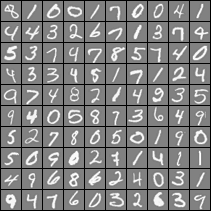

In [24]:
% Chamando função
displayData(selection)

Interessante! Semelhante ao dataset MNIST!

## Regressão Logística

In [28]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.

% Test case for lrCostFunction
fprintf('Testing lrCostFunction() with regularization\n');

Testing lrCostFunction() with regularization


É necessário implementar a função ```lrCostFunction()``` para os cálculos.

In [30]:
% Dados de entrada da função
theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;

Vamos visualizar cada uma das variáveis envolvidas.

In [33]:
theta_t
X_t
y_t
lambda_t

theta_t =

  -2
  -1
   1
   2

X_t =

   1.00000   0.10000   0.60000   1.10000
   1.00000   0.20000   0.70000   1.20000
   1.00000   0.30000   0.80000   1.30000
   1.00000   0.40000   0.90000   1.40000
   1.00000   0.50000   1.00000   1.50000

y_t =

  1
  0
  1
  0
  1

lambda_t =  3


In [38]:
% Entendendo a construção de X_t
[ones(5, 1)]

ans =

   1
   1
   1
   1
   1



In [39]:
% Aplicando reshape
[ones(5, 1) reshape(1:15, 5, 3)]

ans =

    1    1    6   11
    1    2    7   12
    1    3    8   13
    1    4    9   14
    1    5   10   15



In [40]:
[ones(5, 1) reshape(1:15, 5, 3)/10]

ans =

   1.00000   0.10000   0.60000   1.10000
   1.00000   0.20000   0.70000   1.20000
   1.00000   0.30000   0.80000   1.30000
   1.00000   0.40000   0.90000   1.40000
   1.00000   0.50000   1.00000   1.50000



In [41]:
% Definindo função sigmoid para calcular z dentro da função custo
function g = sigmoid(z)
%SIGMOID Compute sigmoid functoon
%   J = SIGMOID(z) computes the sigmoid of z.

g = 1.0 ./ (1.0 + exp(-z));
end

In [44]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations. 
%
% Hint: When computing the gradient of the regularized cost function, 
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta; 
%           temp(1) = 0;   % because we don't add anything for j = 0  
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    z = X * theta;
    h = sigmoid(z);
    
    % Adicionando bias
    theta(1) = 0;
    
    % Calculando J
    unreg_J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h)); % Custo sem regularização
    reg_J = (lambda / (2 * m)) * (theta' * theta); % Custo da regularização

    J = unreg_J + reg_J; % Somando os termos
    
    # Calcula gradiente para theta_0
    grad = (X' * (h - y) + lambda * theta) / m; % Termo (lambda*theta/2) aplicado
    
end

In [47]:
% Chamando função custo com os parâmetros adequados
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

In [52]:
% Comunicando resultados
fprintf('Função custo J: %.3f\n', J)
fprintf('\n')
grad

Função custo J: 2.535

grad =

   0.14656
  -0.54856
   0.72472
   1.39800



Valores estão de acordo com os propostos na solução desta parte do exercício.

## One vs All Classifier

Para implementar esta função, é necessário passar os seguintes argumentos:
    - X
    - y
    - num_labels
    - lambda

Verificando cada um deles

In [55]:
% Informações de X e y
dim_x = size(X)
dim_y = size(y)

dim_x =

   5000    400

dim_y =

   5000      1



In [68]:
% Verificando alguns elementos de y
rand_indices_y = randperm(size(y, 1));
y(rand_indices_y)(1:10, :)

ans =

    9
    1
    4
    4
    6
    1
    5
    9
   10
   10



In [70]:
% Informações de num_labels e lambda
num_labels
lambda

num_labels =  10
error: 'lambda' undefined near line 1 column 1


Lambda ainda não foi definido.

In [71]:
% Definindo lambda
lambda = .1

lambda =  0.10000


In [72]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%












% =========================================================================


end

In [76]:
% Dentro da função temos
m = size(X, 1)
n = size(X, 2)
all_theta = zeros(num_labels, n+1);
size(all_theta)

m =  5000
n =  400
ans =

    10   401



Primeiramente, vamos entender o retorno da função:
    - all_theta

*all_theta* representa a matriz de parâmetros treinados para cada uma das 10 classes. Cada linha dessa matriz corresponde ao parâmetroo de regressão logística treinado para esta determinada classe.

In [78]:
# Percorrendo cada uma das classes
num_labels = 10;
for i = 1:num_labels
    fprintf('%d\n', i)
endfor

1
2
3
4
5
6
7
8
9
10


Para cada uma das classes (lembrando que o 0 foi mapeado em 10), devemos treinar o modelo. Para o melhor ajuste possível, será utilizada a função ```fmincg``` (semelhante a ```fminunc```). Lembrando ```fminunc```:

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X_map, y, lambda)), initial_theta, options);
    
O retorno da função ```fminunc``` contemplava a matriz ```theta``` que, por sua vez, representa a matriz de parâmetros treinados para o modelo (n features). No caso atual, essa matriz é representada por ```all_theta``` que, provavelmente, irá se tratar de uma matriz com dimensões **400x1** para cada classe!

In [79]:
% Configurando opções para fmincg
options = optimset('GradObj', 'on', 'MaxIter', 50)

options =

  scalar structure containing the fields:

    GradObj = on
    MaxIter =  50



Antes de implementar a função ```fmincg``` devemos lembrar que esta será aplicada dentro de um laço ```for``` para cada uma das classes (total de 10). Dessa forma, o parâmetro ```y``` que representa os labels do dataset deverá ser transformado em um vetor de True ou False (1 ou 0) considerando cada uma das classes. Por exemplo:

In [80]:
% Vetor lógico para a classe 5
y==5

ans =

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
 

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


Acima temos uma indexação lógica que retorna **1** toda vez que o label for igual a "5". Caso contrário, retorna **0**. Isso deverá ser aplicado para cada uma das classes dentro do laço for.

In [83]:
% Como a função fmincg retorna apenas theta, temos para uma classe (ex: 5):
initial_theta = zeros(size(X, 2), 1);
[theta_test] = fmincg (@(t)(lrCostFunction(t, X, y==5, lambda)), initial_theta, options)

error: 'fmincg' undefined near line 1 column 15


Verificando *initial_theta*:

In [85]:
initial_theta = zeros(size(X, 2), 1)

initial_theta =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   

In [86]:
# Quais as dimensões de initial_theta (e de theta, futuramente)
size(initial_theta)

ans =

   400     1



De fato! Teremos, ao rodar a função ```fmincg```, uma matriz contendo 400 parâmetros aprendidos pelo modelo que irão definir, dada uma instância de entrada, a qual classe essa pertence.

In [ ]:
% Finalizando função
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logisitc regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell use 
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%

options = optimset('GradObj', 'on', 'MaxIter', 50);
for i=1:num_labels
	initial_theta = zeros(size(X, 2), 1);
	[theta] = fmincg(@(t)(lrCostFunction(t, X,y==i, lambda)), initial_theta, options);
	all_theta(i,:) = theta';
end

** Warning: Cannot interrupt Octave on Windows
